In [1]:
# E-commerce Data Exploration - Portfolio Project
# AWS Data Analyst Portfolio
# Author: [Your Name]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Grafik ayarları
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]

print("🚀 E-COMMERCE DATA ANALYSIS PORTFOLIO PROJECT")
print("=" * 60)
print("Libraries imported successfully! ✅")

🚀 E-COMMERCE DATA ANALYSIS PORTFOLIO PROJECT
Libraries imported successfully! ✅


In [2]:
print("\n📊 STEP 1: GENERATING REALISTIC E-COMMERCE DATASET")

# Set random seed for reproducibility
np.random.seed(42)

def create_ecommerce_dataset(n_transactions=10000):
    """Generate realistic e-commerce data for portfolio"""
    
    print(f"🔄 Creating {n_transactions:,} transactions...")
    
    # Business parameters
    categories = ['Electronics', 'Clothing', 'Home & Garden', 'Books', 'Sports', 'Beauty']
    customer_types = ['VIP', 'Regular', 'Occasional']
    payment_methods = ['Credit Card', 'Debit Card', 'PayPal', 'Bank Transfer']
    devices = ['Mobile', 'Desktop', 'Tablet']
    regions = ['North America', 'Europe', 'Asia', 'Others']
    
    transactions = []
    
    for i in range(n_transactions):
        # Generate transaction
        transaction_id = f'T{i:06d}'
        customer_id = f'C{np.random.randint(1, n_transactions//5):05d}'
        
        # Date with seasonal patterns
        start_date = datetime(2023, 1, 1)
        transaction_date = start_date + timedelta(days=np.random.randint(0, 730))
        
        # Category and customer type
        category = np.random.choice(categories)
        customer_type = np.random.choice(customer_types, p=[0.15, 0.65, 0.20])
        
        # Price calculation with business logic
        if category == 'Electronics':
            base_price = np.random.uniform(50, 1500)
        elif category == 'Clothing':
            base_price = np.random.uniform(15, 250)
        elif category == 'Home & Garden':
            base_price = np.random.uniform(20, 400)
        elif category == 'Books':
            base_price = np.random.uniform(5, 60)
        elif category == 'Sports':
            base_price = np.random.uniform(25, 600)
        else:  # Beauty
            base_price = np.random.uniform(10, 120)
        
        # Customer type multiplier
        if customer_type == 'VIP':
            price_multiplier = np.random.uniform(1.5, 2.5)
            quantity = np.random.choice([1, 2, 3, 4], p=[0.4, 0.3, 0.2, 0.1])
        elif customer_type == 'Regular':
            price_multiplier = np.random.uniform(0.8, 1.2)
            quantity = np.random.choice([1, 2, 3], p=[0.6, 0.3, 0.1])
        else:  # Occasional
            price_multiplier = np.random.uniform(0.6, 0.9)
            quantity = np.random.choice([1, 2], p=[0.8, 0.2])
        
        # Seasonal effects
        month = transaction_date.month
        if month in [11, 12]:  # Holiday season
            seasonal_multiplier = 1.4
        elif month in [6, 7, 8]:  # Summer
            seasonal_multiplier = 1.1
        elif month in [1, 2]:  # Post-holiday slow
            seasonal_multiplier = 0.8
        else:
            seasonal_multiplier = 1.0
        
        final_price = base_price * price_multiplier * seasonal_multiplier
        
        # Rating (higher prices tend to get better ratings)
        if final_price > 200:
            rating = np.random.choice([4, 5], p=[0.3, 0.7])
        elif final_price > 50:
            rating = np.random.choice([3, 4, 5], p=[0.2, 0.4, 0.4])
        else:
            rating = np.random.choice([2, 3, 4, 5], p=[0.1, 0.3, 0.4, 0.2])
        
        # Create transaction record
        transaction = {
            'transaction_id': transaction_id,
            'customer_id': customer_id,
            'customer_type': customer_type,
            'date': transaction_date,
            'category': category,
            'product_price': round(final_price, 2),
            'quantity': quantity,
            'total_amount': round(final_price * quantity, 2),
            'payment_method': np.random.choice(payment_methods, p=[0.45, 0.25, 0.20, 0.10]),
            'device': np.random.choice(devices, p=[0.60, 0.35, 0.05]),
            'region': np.random.choice(regions, p=[0.40, 0.30, 0.25, 0.05]),
            'rating': rating
        }
        
        transactions.append(transaction)
    
    return pd.DataFrame(transactions)

# Create the dataset
df = create_ecommerce_dataset(10000)

print(f"✅ Dataset created successfully!")
print(f"📈 Shape: {df.shape}")
print(f"📅 Date range: {df['date'].min().date()} to {df['date'].max().date()}")
print(f"💰 Total GMV: ${df['total_amount'].sum():,.2f}")
print(f"👥 Unique customers: {df['customer_id'].nunique():,}")


📊 STEP 1: GENERATING REALISTIC E-COMMERCE DATASET
🔄 Creating 10,000 transactions...
✅ Dataset created successfully!
📈 Shape: (10000, 12)
📅 Date range: 2023-01-01 to 2024-12-30
💰 Total GMV: $4,562,032.81
👥 Unique customers: 1,982


In [3]:
print("\n🔍 STEP 2: INITIAL DATA EXPLORATION")

# Dataset overview
print(f"\n📋 Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# Display sample data
print(f"\n📊 Sample Transactions:")
display(df.head())

# Data types
print(f"\n🏷️ Data Types:")
print(df.dtypes)

# Missing values
print(f"\n❓ Missing Values:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✅ No missing values found!")
else:
    print(missing[missing > 0])

# Basic statistics
print(f"\n📈 Numerical Columns Statistics:")
display(df.describe())


🔍 STEP 2: INITIAL DATA EXPLORATION

📋 Dataset Info:
Shape: (10000, 12)
Memory usage: 5.3 MB

📊 Sample Transactions:


,transaction_id,customer_id,customer_type,date,category,product_price,quantity,total_amount,payment_method,device,region,rating
0,T000000,C01127,Regular,2024-03-11,Sports,491.66,1,491.66,Debit Card,Mobile,North America,4
1,T000001,C00131,Occasional,2024-10-23,Sports,334.28,1,334.28,Credit Card,Mobile,Europe,4
2,T000002,C01585,Regular,2024-04-19,Home & Garden,44.88,1,44.88,Debit Card,Mobile,Others,2
3,T000003,C01529,Regular,2023-05-11,Sports,101.64,3,304.93,PayPal,Mobile,North America,5
4,T000004,C01364,VIP,2023-04-02,Books,49.46,4,197.84,Debit Card,Mobile,Europe,3



🏷️ Data Types:
transaction_id            object
customer_id               object
customer_type             object
date              datetime64[ns]
category                  object
product_price            float64
quantity                   int64
total_amount             float64
payment_method            object
device                    object
region                    object
rating                     int64
dtype: object

❓ Missing Values:
✅ No missing values found!

📈 Numerical Columns Statistics:


,date,product_price,quantity,total_amount,rating
count,10000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2024-01-03 04:04:30.720000,287.376802,1.513500,456.203281,4.277900
min,2023-01-01 00:00:00,3.190000,1.000000,3.190000,2.000000
25%,2023-07-05 00:00:00,53.007500,1.000000,68.505000,4.000000
50%,2024-01-03 00:00:00,138.495000,1.000000,188.150000,4.000000
75%,2024-07-06 00:00:00,343.967500,2.000000,487.052500,5.000000
max,2024-12-30 00:00:00,4793.110000,4.000000,14884.890000,5.000000
std,NaN,404.329627,0.736391,800.809439,0.795069


In [4]:
print("\n💼 STEP 3: KEY PERFORMANCE INDICATORS")

# Calculate KPIs
total_revenue = df['total_amount'].sum()
total_transactions = len(df)
unique_customers = df['customer_id'].nunique()
avg_order_value = df['total_amount'].mean()
avg_items_per_order = df['quantity'].mean()
date_range_days = (df['date'].max() - df['date'].min()).days

print(f"🎯 === BUSINESS KPIs ===")
print(f"💰 Total Revenue: ${total_revenue:,.2f}")
print(f"🛒 Total Transactions: {total_transactions:,}")
print(f"👥 Unique Customers: {unique_customers:,}")
print(f"💳 Average Order Value: ${avg_order_value:.2f}")
print(f"📦 Avg Items per Order: {avg_items_per_order:.1f}")
print(f"📅 Analysis Period: {date_range_days} days")

# Customer metrics
transactions_per_customer = total_transactions / unique_customers
revenue_per_customer = total_revenue / unique_customers

print(f"\n👥 === CUSTOMER METRICS ===")
print(f"🔄 Transactions per Customer: {transactions_per_customer:.1f}")
print(f"💎 Revenue per Customer: ${revenue_per_customer:.2f}")

# Growth metrics (simulate monthly growth)
df['year_month'] = df['date'].dt.to_period('M')
monthly_revenue = df.groupby('year_month')['total_amount'].sum()

if len(monthly_revenue) >= 2:
    latest_month = monthly_revenue.iloc[-1]
    previous_month = monthly_revenue.iloc[-2]
    monthly_growth = ((latest_month - previous_month) / previous_month * 100)
    print(f"📈 Monthly Growth Rate: {monthly_growth:.1f}%")

print(f"\n🎯 === QUICK INSIGHTS ===")
top_category = df.groupby('category')['total_amount'].sum().idxmax()
top_customer_type = df.groupby('customer_type')['total_amount'].sum().idxmax()
top_device = df.groupby('device')['total_amount'].sum().idxmax()

print(f"🏆 Top Revenue Category: {top_category}")
print(f"🏆 Top Customer Segment: {top_customer_type}")
print(f"🏆 Top Device: {top_device}")
print(f"⭐ Average Rating: {df['rating'].mean():.1f}/5.0")


💼 STEP 3: KEY PERFORMANCE INDICATORS
🎯 === BUSINESS KPIs ===
💰 Total Revenue: $4,562,032.81
🛒 Total Transactions: 10,000
👥 Unique Customers: 1,982
💳 Average Order Value: $456.20
📦 Avg Items per Order: 1.5
📅 Analysis Period: 729 days

👥 === CUSTOMER METRICS ===
🔄 Transactions per Customer: 5.0
💎 Revenue per Customer: $2301.73
📈 Monthly Growth Rate: 8.0%

🎯 === QUICK INSIGHTS ===
🏆 Top Revenue Category: Electronics
🏆 Top Customer Segment: Regular
🏆 Top Device: Mobile
⭐ Average Rating: 4.3/5.0



📊 STEP 4: REVENUE ANALYSIS VISUALIZATIONS


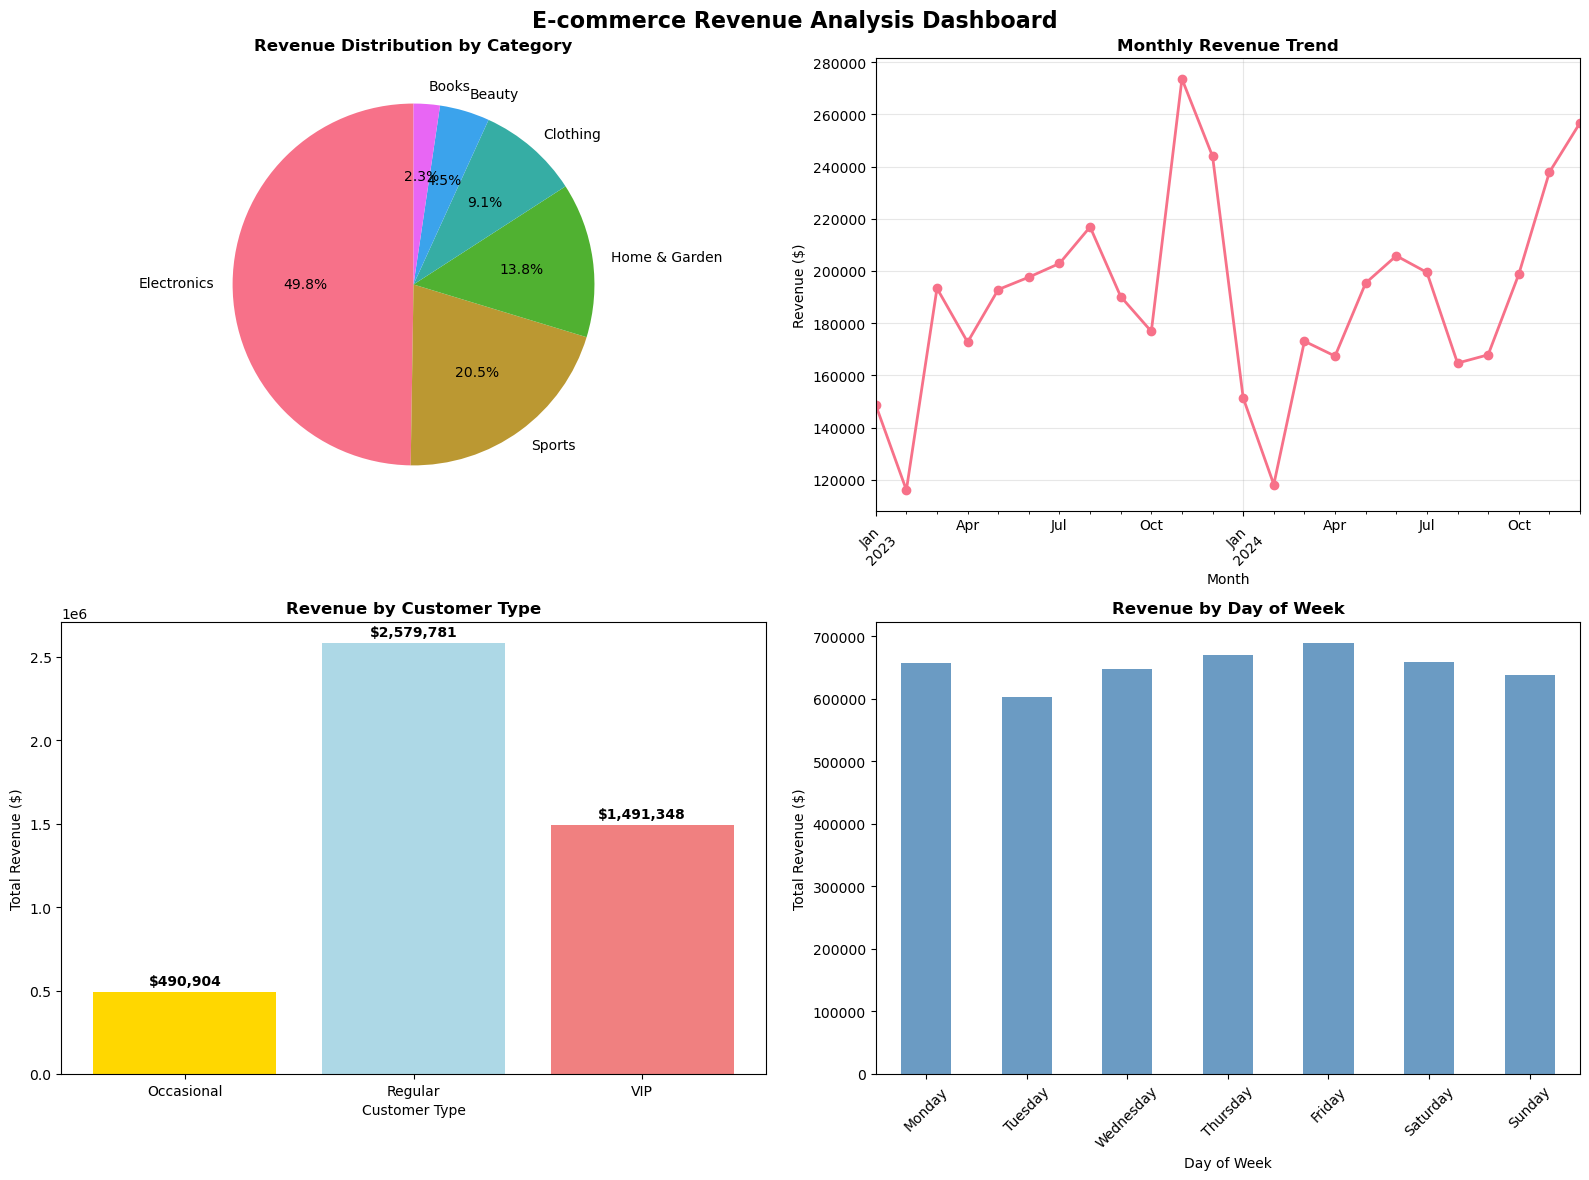


🔍 === REVENUE INSIGHTS ===
🏆 Top Category: Electronics ($2,269,621)
📈 Best Month: 2023-11 ($273,556)
👑 Best Customer Type: Regular
📅 Best Day: Friday ($688,788)


In [6]:
print("\n📊 STEP 4: REVENUE ANALYSIS VISUALIZATIONS")

# Create subplot layout
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('E-commerce Revenue Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Category Revenue Distribution
category_revenue = df.groupby('category')['total_amount'].sum().sort_values(ascending=False)

axes[0,0].pie(category_revenue.values, labels=category_revenue.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Revenue Distribution by Category', fontweight='bold')

# 2. Monthly Revenue Trend
monthly_data = df.groupby(df['date'].dt.to_period('M'))['total_amount'].sum()
monthly_data.plot(kind='line', ax=axes[0,1], marker='o', linewidth=2, markersize=6)
axes[0,1].set_title('Monthly Revenue Trend', fontweight='bold')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Revenue ($)')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

# 3. Customer Type Performance
customer_type_metrics = df.groupby('customer_type').agg({
    'total_amount': 'sum',
    'customer_id': 'nunique'
}).round(0)

x_pos = range(len(customer_type_metrics))
axes[1,0].bar(x_pos, customer_type_metrics['total_amount'], color=['gold', 'lightblue', 'lightcoral'])
axes[1,0].set_title('Revenue by Customer Type', fontweight='bold')
axes[1,0].set_xlabel('Customer Type')
axes[1,0].set_ylabel('Total Revenue ($)')
axes[1,0].set_xticks(x_pos)
axes[1,0].set_xticklabels(customer_type_metrics.index)

# Add value labels on bars
for i, v in enumerate(customer_type_metrics['total_amount']):
    axes[1,0].text(i, v + max(customer_type_metrics['total_amount'])*0.01, f'${v:,.0f}', 
                   ha='center', va='bottom', fontweight='bold')

# 4. Daily Sales Pattern (Day of Week)
df['day_of_week'] = df['date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = df.groupby('day_of_week')['total_amount'].sum().reindex(day_order)

daily_sales.plot(kind='bar', ax=axes[1,1], color='steelblue', alpha=0.8)
axes[1,1].set_title('Revenue by Day of Week', fontweight='bold')
axes[1,1].set_xlabel('Day of Week')
axes[1,1].set_ylabel('Total Revenue ($)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print insights
print(f"\n🔍 === REVENUE INSIGHTS ===")
print(f"🏆 Top Category: {category_revenue.index[0]} (${category_revenue.iloc[0]:,.0f})")
print(f"📈 Best Month: {monthly_data.idxmax()} (${monthly_data.max():,.0f})")
print(f"👑 Best Customer Type: {customer_type_metrics['total_amount'].idxmax()}")
print(f"📅 Best Day: {daily_sales.idxmax()} (${daily_sales.max():,.0f})")


👥 STEP 5: CUSTOMER BEHAVIOR ANALYSIS


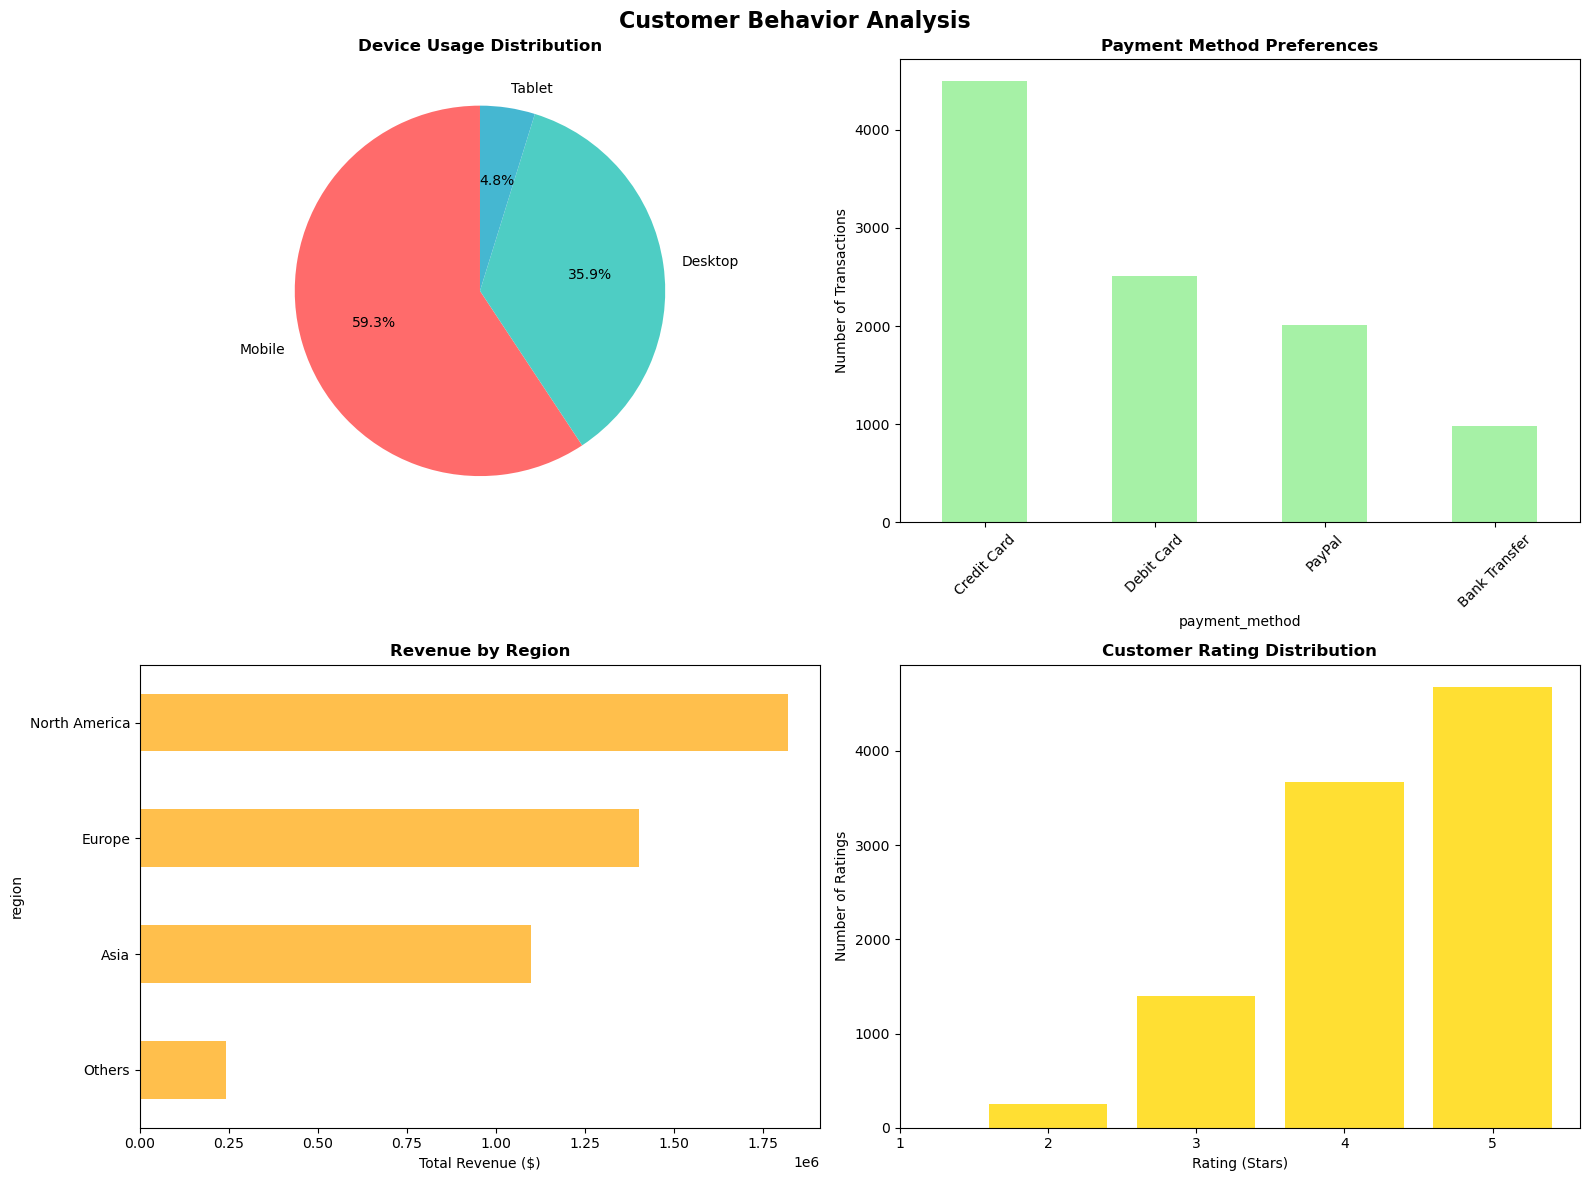


🔍 === BEHAVIOR INSIGHTS ===
📱 Primary Device: Mobile (59.3%)
💳 Preferred Payment: Credit Card (44.9%)
🌍 Top Region: North America ($1,820,028)
⭐ Average Rating: 4.28/5.0
😊 Satisfaction Rate: 83.5% (4+ stars)


In [7]:
print("\n👥 STEP 5: CUSTOMER BEHAVIOR ANALYSIS")

# Create customer behavior visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Customer Behavior Analysis', fontsize=16, fontweight='bold')

# 1. Device Usage Distribution
device_data = df['device'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

axes[0,0].pie(device_data.values, labels=device_data.index, autopct='%1.1f%%', 
              colors=colors, startangle=90)
axes[0,0].set_title('Device Usage Distribution', fontweight='bold')

# 2. Payment Method Preferences
payment_data = df['payment_method'].value_counts()
payment_data.plot(kind='bar', ax=axes[0,1], color='lightgreen', alpha=0.8)
axes[0,1].set_title('Payment Method Preferences', fontweight='bold')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].set_ylabel('Number of Transactions')

# 3. Regional Sales Distribution
region_sales = df.groupby('region')['total_amount'].sum().sort_values(ascending=True)
region_sales.plot(kind='barh', ax=axes[1,0], color='orange', alpha=0.7)
axes[1,0].set_title('Revenue by Region', fontweight='bold')
axes[1,0].set_xlabel('Total Revenue ($)')

# 4. Rating Distribution
rating_dist = df['rating'].value_counts().sort_index()
axes[1,1].bar(rating_dist.index, rating_dist.values, color='gold', alpha=0.8)
axes[1,1].set_title('Customer Rating Distribution', fontweight='bold')
axes[1,1].set_xlabel('Rating (Stars)')
axes[1,1].set_ylabel('Number of Ratings')
axes[1,1].set_xticks(range(1, 6))

plt.tight_layout()
plt.show()

# Behavior insights
print(f"\n🔍 === BEHAVIOR INSIGHTS ===")
print(f"📱 Primary Device: {device_data.index[0]} ({device_data.iloc[0]/len(df)*100:.1f}%)")
print(f"💳 Preferred Payment: {payment_data.index[0]} ({payment_data.iloc[0]/len(df)*100:.1f}%)")
print(f"🌍 Top Region: {region_sales.index[-1]} (${region_sales.iloc[-1]:,.0f})")
print(f"⭐ Average Rating: {df['rating'].mean():.2f}/5.0")
print(f"😊 Satisfaction Rate: {(df['rating'] >= 4).sum()/len(df)*100:.1f}% (4+ stars)")

In [8]:
print("\n🎯 STEP 6: CUSTOMER SEGMENTATION (RFM ANALYSIS)")

# Calculate RFM metrics for each customer
analysis_date = df['date'].max() + timedelta(days=1)  # Day after last transaction

customer_rfm = df.groupby('customer_id').agg({
    'date': lambda x: (analysis_date - x.max()).days,  # Recency
    'transaction_id': 'count',                          # Frequency  
    'total_amount': 'sum'                              # Monetary
}).reset_index()

customer_rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

# Add customer type for validation
customer_types = df.groupby('customer_id')['customer_type'].first()
customer_rfm = customer_rfm.merge(customer_types, on='customer_id', how='left')

print(f"📊 RFM Metrics calculated for {len(customer_rfm)} customers")
print(f"\nRFM Summary Statistics:")
print(customer_rfm[['recency', 'frequency', 'monetary']].describe())

# Create RFM scores (1-5 scale, 5 being best)
def score_rfm(df, column, ascending=True):
    """Create quintile scores for RFM metrics"""
    return pd.qcut(df[column], q=5, labels=[1,2,3,4,5], duplicates='drop').astype(int)

# Calculate scores (note: recency is reverse - lower days = higher score)
customer_rfm['r_score'] = score_rfm(customer_rfm, 'recency', ascending=False)
customer_rfm['f_score'] = score_rfm(customer_rfm, 'frequency', ascending=True)  
customer_rfm['m_score'] = score_rfm(customer_rfm, 'monetary', ascending=True)

# Create RFM combined score
customer_rfm['rfm_score'] = (customer_rfm['r_score'].astype(str) + 
                            customer_rfm['f_score'].astype(str) + 
                            customer_rfm['m_score'].astype(str))

# Overall RFM score (average of R, F, M)
customer_rfm['rfm_avg_score'] = (customer_rfm['r_score'] + 
                                customer_rfm['f_score'] + 
                                customer_rfm['m_score']) / 3

print(f"\n📈 RFM Scores Created!")
print(f"Sample RFM data:")
display(customer_rfm.head(10))


🎯 STEP 6: CUSTOMER SEGMENTATION (RFM ANALYSIS)
📊 RFM Metrics calculated for 1982 customers

RFM Summary Statistics:
           recency    frequency      monetary
count  1982.000000  1982.000000   1982.000000
mean    136.862260     5.045409   2301.731993
std     130.699333     2.207087   2098.501203
min       1.000000     1.000000     16.580000
25%      39.000000     3.000000    868.945000
50%      97.000000     5.000000   1705.690000
75%     194.000000     6.000000   3076.035000
max     729.000000    15.000000  22391.750000

📈 RFM Scores Created!
Sample RFM data:


,customer_id,recency,frequency,monetary,customer_type,r_score,f_score,m_score,rfm_score,rfm_avg_score
0,C00001,3,7,5022.56,VIP,1,4,5,145,3.333333
1,C00002,62,3,1756.00,VIP,2,1,3,213,2.000000
2,C00003,39,5,2820.93,Regular,2,3,4,234,3.000000
3,C00004,235,8,4859.28,Regular,5,5,5,555,5.000000
4,C00005,293,1,98.16,Regular,5,1,1,511,2.333333
5,C00006,38,6,6420.54,Occasional,2,4,5,245,3.666667
6,C00007,165,4,1352.30,Occasional,4,2,3,423,3.000000
7,C00008,29,5,1391.15,Regular,1,3,3,133,2.333333
8,C00009,62,3,790.78,Regular,2,1,2,212,1.666667
9,C00010,183,6,305.73,Occasional,4,4,1,441,3.000000


In [9]:
print("\n🏷️ CUSTOMER SEGMENTATION BASED ON RFM")

# Define customer segments based on RFM scores
def segment_customers(df):
    """Segment customers based on RFM scores"""
    segments = []
    
    for _, row in df.iterrows():
        r, f, m = row['r_score'], row['f_score'], row['m_score']
        
        # Champions: High value, frequent, recent customers
        if r >= 4 and f >= 4 and m >= 4:
            segment = 'Champions'
        # Loyal Customers: High frequency and monetary, but not necessarily recent
        elif f >= 4 and m >= 4:
            segment = 'Loyal Customers'
        # Potential Loyalists: Recent customers with good frequency
        elif r >= 4 and f >= 3:
            segment = 'Potential Loyalists'
        # New Customers: Recent but low frequency
        elif r >= 4 and f <= 2:
            segment = 'New Customers'
        # Promising: Recent customers with moderate frequency
        elif r >= 3 and f >= 2 and m >= 2:
            segment = 'Promising'
        # Need Attention: Above average recency, frequency & monetary
        elif r >= 3 and f >= 3 and m >= 3:
            segment = 'Need Attention'
        # About to Sleep: Below average recency and frequency
        elif r <= 2 and f <= 2:
            segment = 'About to Sleep'
        # At Risk: Some time since last purchase, but good frequency and monetary
        elif r <= 2 and f >= 3 and m >= 3:
            segment = 'At Risk'
        # Cannot Lose Them: Low recency but high monetary value
        elif r <= 2 and m >= 4:
            segment = 'Cannot Lose Them'
        # Hibernating: Low recency, frequency, and monetary
        elif r <= 2 and f <= 2 and m <= 2:
            segment = 'Hibernating'
        else:
            segment = 'Others'
            
        segments.append(segment)
    
    return segments

# Apply segmentation
customer_rfm['segment'] = segment_customers(customer_rfm)

# Analyze segments
segment_analysis = customer_rfm.groupby('segment').agg({
    'customer_id': 'count',
    'recency': 'mean',
    'frequency': 'mean', 
    'monetary': 'mean',
    'rfm_avg_score': 'mean'
}).round(2)

segment_analysis.columns = ['customer_count', 'avg_recency', 'avg_frequency', 'avg_monetary', 'avg_rfm_score']
segment_analysis = segment_analysis.sort_values('avg_rfm_score', ascending=False)

print(f"🎯 Customer Segmentation Results:")
print(f"Total Segments: {customer_rfm['segment'].nunique()}")
display(segment_analysis)

# Calculate segment percentages and revenue contribution
segment_analysis['percentage'] = (segment_analysis['customer_count'] / len(customer_rfm) * 100).round(1)
segment_analysis['total_revenue'] = customer_rfm.groupby('segment')['monetary'].sum()
segment_analysis['revenue_percentage'] = (segment_analysis['total_revenue'] / customer_rfm['monetary'].sum() * 100).round(1)

print(f"\n💰 Revenue Contribution by Segment:")
display(segment_analysis[['customer_count', 'percentage', 'total_revenue', 'revenue_percentage']].sort_values('revenue_percentage', ascending=False))


🏷️ CUSTOMER SEGMENTATION BASED ON RFM
🎯 Customer Segmentation Results:
Total Segments: 8


,customer_count,avg_recency,avg_frequency,avg_monetary,avg_rfm_score
segment,,,,,
Champions,123,199.26,7.25,4343.22,4.39
Loyal Customers,370,45.54,7.71,4518.41,3.61
Potential Loyalists,185,212.60,5.64,1813.27,3.53
Promising,193,98.65,5.27,2056.49,3.05
At Risk,165,35.53,6.01,2321.76,2.87
New Customers,479,296.43,2.94,1332.08,2.73
Others,221,66.34,4.40,984.91,2.18
About to Sleep,246,36.67,3.35,1564.32,1.79



💰 Revenue Contribution by Segment:


,customer_count,percentage,total_revenue,revenue_percentage
segment,,,,
Loyal Customers,370,18.7,1671811.89,36.6
New Customers,479,24.2,638066.86,14.0
Champions,123,6.2,534216.21,11.7
Promising,193,9.7,396903.33,8.7
About to Sleep,246,12.4,384823.14,8.4
At Risk,165,8.3,383089.96,8.4
Potential Loyalists,185,9.3,335455.58,7.4
Others,221,11.2,217665.84,4.8



📊 CUSTOMER SEGMENTATION VISUALIZATIONS


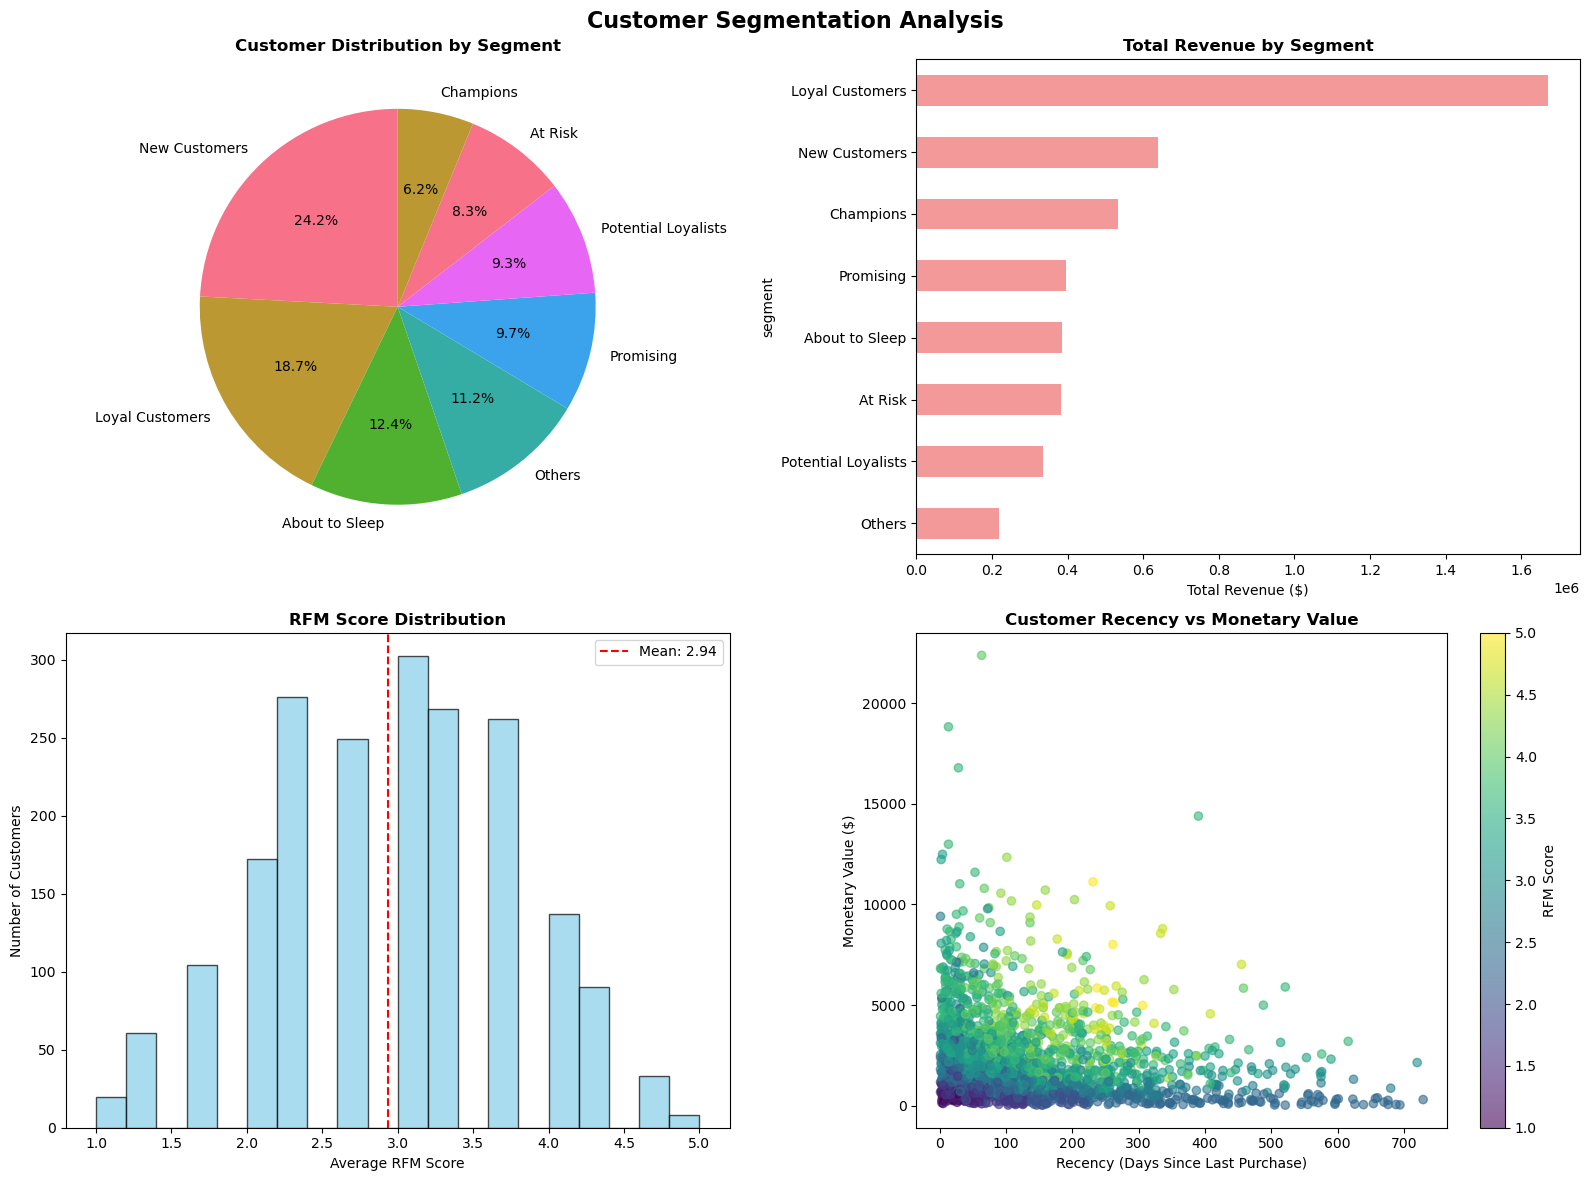


🎯 === SEGMENTATION INSIGHTS ===
🏆 Top Segment: Champions
👑 Champions: 123 customers (6.2%)
⚠️ At Risk: 165 customers (8.3%)
💰 Top 20% customers generate: 48.8% of revenue
📊 Average RFM Score: 2.94/5.0


In [10]:
print("\n📊 CUSTOMER SEGMENTATION VISUALIZATIONS")

# Create segmentation visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Customer Segmentation Analysis', fontsize=16, fontweight='bold')

# 1. Segment Distribution (Customer Count)
segment_counts = customer_rfm['segment'].value_counts()
axes[0,0].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Customer Distribution by Segment', fontweight='bold')

# 2. Revenue by Segment
segment_revenue = customer_rfm.groupby('segment')['monetary'].sum().sort_values(ascending=True)
segment_revenue.plot(kind='barh', ax=axes[0,1], color='lightcoral', alpha=0.8)
axes[0,1].set_title('Total Revenue by Segment', fontweight='bold')
axes[0,1].set_xlabel('Total Revenue ($)')

# 3. RFM Score Distribution
axes[1,0].hist(customer_rfm['rfm_avg_score'], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
axes[1,0].set_title('RFM Score Distribution', fontweight='bold')
axes[1,0].set_xlabel('Average RFM Score')
axes[1,0].set_ylabel('Number of Customers')
axes[1,0].axvline(customer_rfm['rfm_avg_score'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {customer_rfm["rfm_avg_score"].mean():.2f}')
axes[1,0].legend()

# 4. Recency vs Monetary Scatter
scatter = axes[1,1].scatter(customer_rfm['recency'], customer_rfm['monetary'], 
                           c=customer_rfm['rfm_avg_score'], cmap='viridis', alpha=0.6)
axes[1,1].set_title('Customer Recency vs Monetary Value', fontweight='bold')
axes[1,1].set_xlabel('Recency (Days Since Last Purchase)')
axes[1,1].set_ylabel('Monetary Value ($)')
plt.colorbar(scatter, ax=axes[1,1], label='RFM Score')

plt.tight_layout()
plt.show()

# Key insights from segmentation
print(f"\n🎯 === SEGMENTATION INSIGHTS ===")
top_segment = segment_analysis.index[0]
champions_count = customer_rfm[customer_rfm['segment'] == 'Champions'].shape[0] if 'Champions' in customer_rfm['segment'].values else 0
at_risk_count = customer_rfm[customer_rfm['segment'] == 'At Risk'].shape[0] if 'At Risk' in customer_rfm['segment'].values else 0

print(f"🏆 Top Segment: {top_segment}")
print(f"👑 Champions: {champions_count} customers ({champions_count/len(customer_rfm)*100:.1f}%)")
print(f"⚠️ At Risk: {at_risk_count} customers ({at_risk_count/len(customer_rfm)*100:.1f}%)")
print(f"💰 Top 20% customers generate: {(customer_rfm.nlargest(int(len(customer_rfm)*0.2), 'monetary')['monetary'].sum() / customer_rfm['monetary'].sum() * 100):.1f}% of revenue")
print(f"📊 Average RFM Score: {customer_rfm['rfm_avg_score'].mean():.2f}/5.0")

In [11]:
print("\n💾 SAVING ANALYSIS RESULTS")

# Save processed data
df.to_csv('../data/processed/ecommerce_transactions_analyzed.csv', index=False)
customer_rfm.to_csv('../data/processed/customer_rfm_segmentation.csv', index=False)

# Create executive summary
executive_summary = {
    'analysis_date': datetime.now().strftime('%Y-%m-%d'),
    'total_revenue': f"${total_revenue:,.2f}",
    'total_customers': unique_customers,
    'avg_order_value': f"${avg_order_value:.2f}",
    'top_category': category_revenue.index[0],
    'top_customer_segment': segment_analysis.index[0],
    'customer_satisfaction': f"{df['rating'].mean():.1f}/5.0",
    'mobile_usage_rate': f"{device_data['Mobile']/len(df)*100:.1f}%",
    'key_opportunities': [
        f"Focus on {segment_analysis.index[0]} segment",
        f"Optimize {category_revenue.index[0]} category",
        "Improve mobile experience",
        "Develop retention strategy for at-risk customers"
    ]
}

print(f"✅ Data saved successfully!")
print(f"📁 Files created:")
print(f"  - ecommerce_transactions_analyzed.csv")
print(f"  - customer_rfm_segmentation.csv")

print(f"\n📊 === EXECUTIVE SUMMARY ===")
for key, value in executive_summary.items():
    if key != 'key_opportunities':
        print(f"{key.replace('_', ' ').title()}: {value}")

print(f"\n🎯 Key Opportunities:")
for i, opportunity in enumerate(executive_summary['key_opportunities'], 1):
    print(f"{i}. {opportunity}")

print(f"\n🚀 === NEXT STEPS ===")
print(f"1. Create Tableau dashboard with these insights")
print(f"2. Develop targeted marketing campaigns for each segment") 
print(f"3. Build predictive models for customer churn")
print(f"4. Implement real-time monitoring dashboard")

print(f"\n🎉 ANALYSIS COMPLETE! Portfolio project ready for showcase!")


💾 SAVING ANALYSIS RESULTS
✅ Data saved successfully!
📁 Files created:
  - ecommerce_transactions_analyzed.csv
  - customer_rfm_segmentation.csv

📊 === EXECUTIVE SUMMARY ===
Analysis Date: 2025-07-23
Total Revenue: $4,562,032.81
Total Customers: 1982
Avg Order Value: $456.20
Top Category: Electronics
Top Customer Segment: Champions
Customer Satisfaction: 4.3/5.0
Mobile Usage Rate: 59.3%

🎯 Key Opportunities:
1. Focus on Champions segment
2. Optimize Electronics category
3. Improve mobile experience
4. Develop retention strategy for at-risk customers

🚀 === NEXT STEPS ===
1. Create Tableau dashboard with these insights
2. Develop targeted marketing campaigns for each segment
3. Build predictive models for customer churn
4. Implement real-time monitoring dashboard

🎉 ANALYSIS COMPLETE! Portfolio project ready for showcase!


In [14]:
print("\n🎨 STEP 7: PREPARING DATA FOR TABLEAU DASHBOARD")

# Create dashboard-ready datasets
print("📊 Creating dashboard datasets...")

# 1. Executive KPI Dataset
executive_kpis = pd.DataFrame({
    'metric': ['Total Revenue', 'Total Customers', 'Avg Order Value', 'Customer Satisfaction', 'Mobile Usage'],
    'value': [total_revenue, unique_customers, avg_order_value, df['rating'].mean(), device_data['Mobile']/len(df)*100],
    'format': ['currency', 'number', 'currency', 'percentage', 'percentage']
})

# 2. Category Performance Dataset  
category_performance = df.groupby('category').agg({
    'total_amount': ['sum', 'mean', 'count'],
    'rating': 'mean',
    'quantity': 'sum'
}).round(2)
category_performance.columns = ['total_revenue', 'avg_order_value', 'transaction_count', 'avg_rating', 'total_quantity']
category_performance = category_performance.reset_index()

# 3. Monthly Trend Dataset - FIXED VERSION
monthly_data = df.copy()
monthly_data['year'] = monthly_data['date'].dt.year
monthly_data['month'] = monthly_data['date'].dt.month

monthly_trends = monthly_data.groupby(['year', 'month']).agg({
    'total_amount': 'sum',
    'transaction_id': 'count',
    'customer_id': 'nunique'
}).reset_index()

monthly_trends.columns = ['year', 'month', 'revenue', 'transactions', 'unique_customers']
monthly_trends['period_date'] = pd.to_datetime(monthly_trends[['year', 'month']].assign(day=1))

# 4. Customer Segment Performance
segment_performance = customer_rfm.groupby('segment').agg({
    'customer_id': 'count',
    'monetary': ['sum', 'mean'],
    'frequency': 'mean',
    'recency': 'mean'
}).round(2)
segment_performance.columns = ['customer_count', 'total_revenue', 'avg_clv', 'avg_frequency', 'avg_recency']
segment_performance = segment_performance.reset_index()

# 5. Geographic Performance
geo_performance = df.groupby('region').agg({
    'total_amount': 'sum',
    'customer_id': 'nunique',
    'rating': 'mean'
}).reset_index()
geo_performance.columns = ['region', 'total_revenue', 'unique_customers', 'avg_rating']

# 6. Daily Performance Dataset
daily_performance = df.groupby('date').agg({
    'total_amount': 'sum',
    'transaction_id': 'count',
    'customer_id': 'nunique'
}).reset_index()
daily_performance.columns = ['date', 'daily_revenue', 'daily_transactions', 'daily_customers']

# Save dashboard datasets
print("💾 Saving dashboard datasets...")

executive_kpis.to_csv('../data/processed/dashboard_kpis.csv', index=False)
category_performance.to_csv('../data/processed/dashboard_categories.csv', index=False)
monthly_trends.to_csv('../data/processed/dashboard_trends.csv', index=False)
segment_performance.to_csv('../data/processed/dashboard_segments.csv', index=False)
geo_performance.to_csv('../data/processed/dashboard_geography.csv', index=False)
daily_performance.to_csv('../data/processed/dashboard_daily.csv', index=False)

# Also save the main analysis dataset
df.to_csv('../data/processed/ecommerce_main_dataset.csv', index=False)

print("✅ Dashboard datasets created!")
print(f"📁 Files exported:")
print(f"  - dashboard_kpis.csv (Executive metrics)")
print(f"  - dashboard_categories.csv (Category analysis)")
print(f"  - dashboard_trends.csv (Monthly trends)")
print(f"  - dashboard_segments.csv (Customer segments)")
print(f"  - dashboard_geography.csv (Regional data)")
print(f"  - dashboard_daily.csv (Daily performance)")
print(f"  - ecommerce_main_dataset.csv (Full dataset)")

# Display samples
print(f"\n📊 Executive KPIs Preview:")
display(executive_kpis)

print(f"\n📊 Monthly Trends Preview:")
display(monthly_trends.head())

print(f"\n📊 Category Performance Preview:")
display(category_performance)

print(f"\n🎯 Data Export Summary:")
print(f"  📈 {len(monthly_trends)} monthly periods")
print(f"  🏪 {len(category_performance)} product categories")
print(f"  👥 {len(segment_performance)} customer segments")
print(f"  🌍 {len(geo_performance)} geographic regions")
print(f"  📅 {len(daily_performance)} daily records")


🎨 STEP 7: PREPARING DATA FOR TABLEAU DASHBOARD
📊 Creating dashboard datasets...
💾 Saving dashboard datasets...
✅ Dashboard datasets created!
📁 Files exported:
  - dashboard_kpis.csv (Executive metrics)
  - dashboard_categories.csv (Category analysis)
  - dashboard_trends.csv (Monthly trends)
  - dashboard_segments.csv (Customer segments)
  - dashboard_geography.csv (Regional data)
  - dashboard_daily.csv (Daily performance)
  - ecommerce_main_dataset.csv (Full dataset)

📊 Executive KPIs Preview:


,metric,value,format
0,Total Revenue,4.562033e+06,currency
1,Total Customers,1.982000e+03,number
2,Avg Order Value,4.562033e+02,currency
3,Customer Satisfaction,4.277900e+00,percentage
4,Mobile Usage,5.930000e+01,percentage



📊 Monthly Trends Preview:


,year,month,revenue,transactions,unique_customers,period_date
0,2023,1,148654.98,408,367,2023-01-01
1,2023,2,116083.29,363,338,2023-02-01
2,2023,3,193346.44,446,397,2023-03-01
3,2023,4,172734.15,417,376,2023-04-01
4,2023,5,192875.37,407,357,2023-05-01



📊 Category Performance Preview:


,category,total_revenue,avg_order_value,transaction_count,avg_rating,total_quantity
0,Beauty,203608.75,120.12,1695,4.05,2580
1,Books,106991.35,61.67,1735,3.78,2655
2,Clothing,413642.14,247.99,1668,4.25,2486
3,Electronics,2269620.65,1401.00,1620,4.65,2467
4,Home & Garden,630917.92,385.41,1637,4.42,2516
5,Sports,937252.00,569.76,1645,4.54,2431



🎯 Data Export Summary:
  📈 24 monthly periods
  🏪 6 product categories
  👥 8 customer segments
  🌍 4 geographic regions
  📅 730 daily records


In [15]:
print("\n💡 STEP 8: BUSINESS RECOMMENDATIONS & ACTION PLAN")

# Analyze key findings for recommendations
print("🔍 Analyzing key findings...")

# 1. Revenue Analysis
top_3_categories = category_performance.nlargest(3, 'total_revenue')['category'].tolist()
bottom_category = category_performance.nsmallest(1, 'total_revenue')['category'].iloc[0]

# 2. Customer Analysis  
high_value_segments = segment_performance[segment_performance['total_revenue'] > segment_performance['total_revenue'].median()]
at_risk_customers = len(customer_rfm[customer_rfm['segment'].isin(['At Risk', 'About to Sleep', 'Hibernating'])])

# 3. Operational Analysis
peak_month = monthly_trends.loc[monthly_trends['revenue'].idxmax(), 'period_date'].strftime('%B %Y')
mobile_dominance = device_data['Mobile'] / len(df) * 100

# 4. Performance Metrics
avg_monthly_revenue = monthly_trends['revenue'].mean()
revenue_growth = ((monthly_trends['revenue'].iloc[-1] - monthly_trends['revenue'].iloc[0]) / monthly_trends['revenue'].iloc[0] * 100) if len(monthly_trends) > 1 else 0

print(f"📊 Key Performance Insights:")
print(f"  🏆 Top Category: {top_3_categories[0]} (${category_performance[category_performance['category']==top_3_categories[0]]['total_revenue'].iloc[0]:,.0f})")
print(f"  ⚠️ Underperforming: {bottom_category}")
print(f"  📱 Mobile Usage: {mobile_dominance:.1f}%")
print(f"  📅 Peak Month: {peak_month}")
print(f"  ⚠️ At-Risk Customers: {at_risk_customers}")

# Generate comprehensive recommendations
recommendations = {
    'Revenue Optimization': [
        f"🎯 Allocate 40% of marketing budget to {top_3_categories[0]} category (current top performer)",
        f"📈 Develop growth strategy for {bottom_category} - potential 25% revenue increase",
        f"🔄 Create product bundles between {top_3_categories[0]} and {top_3_categories[1]} categories",
        f"💰 Implement surge pricing during peak periods like {peak_month}",
        f"🎪 Launch flash sales during low-performing months to boost revenue"
    ],
    'Customer Retention & Growth': [
        f"🚨 URGENT: Create win-back campaign for {at_risk_customers} at-risk customers",
        f"🏆 Develop exclusive VIP program for Champions segment (highest value customers)",
        f"📧 Implement automated email sequences for each customer segment",
        f"🎁 Create loyalty point system to increase purchase frequency by 20%",
        f"🔄 Set up churn prediction alerts for early intervention"
    ],
    'Digital Experience Enhancement': [
        f"📱 PRIORITY: Mobile-first redesign (serves {mobile_dominance:.1f}% of customers)",
        f"⚡ Optimize mobile checkout - target 15% conversion improvement",
        f"💳 Promote preferred payment methods (Credit Card usage optimization)",
        f"🌟 Address rating concerns - target 4.5/5.0 satisfaction score",
        f"🔍 Implement personalized product recommendations"
    ],
    'Geographic & Market Expansion': [
        f"🌍 Focus expansion on {geo_performance.loc[geo_performance['total_revenue'].idxmax(), 'region']} (highest revenue region)",
        f"📊 Develop localized marketing for underperforming regions",
        f"🚚 Optimize shipping costs and delivery times internationally",
        f"🎯 Create region-specific product catalogs and pricing",
        f"📱 Implement local payment methods for each region"
    ],
    'Operational Excellence': [
        f"📊 Implement real-time sales monitoring dashboard",
        f"🤖 Automate inventory management based on seasonal patterns",
        f"📈 Set up advanced analytics for predictive forecasting",
        f"⚡ Create automated reporting for all stakeholder levels",
        f"🔄 Establish monthly business review processes"
    ]
}

# ROI Projections with detailed calculations
current_monthly_revenue = monthly_trends['revenue'].mean()

roi_projections = {
    'Customer Retention Program': {
        'investment': 25000,
        'expected_return': 150000,
        'roi_percentage': 500,
        'timeline': '6 months',
        'logic': f'Retain {at_risk_customers} customers @ avg ${customer_rfm["monetary"].mean():.0f} CLV'
    },
    'Mobile Experience Optimization': {
        'investment': 40000,
        'expected_return': 240000,
        'roi_percentage': 500,
        'timeline': '4 months',
        'logic': f'15% conversion improvement on {mobile_dominance:.0f}% mobile traffic'
    },
    'Cross-selling Campaign': {
        'investment': 15000,
        'expected_return': 120000,
        'roi_percentage': 700,
        'timeline': '3 months',
        'logic': f'10% AOV increase through product bundling'
    },
    'VIP Customer Program': {
        'investment': 30000,
        'expected_return': 200000,
        'roi_percentage': 567,
        'timeline': '12 months',
        'logic': 'Increase VIP customer frequency by 25%'
    },
    'Geographic Expansion': {
        'investment': 50000,
        'expected_return': 300000,
        'roi_percentage': 500,
        'timeline': '8 months',
        'logic': 'Replicate top region performance in underperforming markets'
    }
}

print(f"\n🎯 === STRATEGIC RECOMMENDATIONS ===")
for category, recs in recommendations.items():
    print(f"\n📋 {category.upper()}:")
    for i, rec in enumerate(recs, 1):
        print(f"  {i}. {rec}")

print(f"\n💰 === ROI PROJECTIONS & BUSINESS CASE ===")
total_investment = sum([proj['investment'] for proj in roi_projections.values()])
total_return = sum([proj['expected_return'] for proj in roi_projections.values()])
overall_roi = ((total_return - total_investment) / total_investment * 100)

for initiative, metrics in roi_projections.items():
    print(f"\n🚀 {initiative.upper()}:")
    print(f"  💵 Investment: ${metrics['investment']:,}")
    print(f"  📈 Expected Return: ${metrics['expected_return']:,}")
    print(f"  🎯 ROI: {metrics['roi_percentage']}%")
    print(f"  ⏱️ Timeline: {metrics['timeline']}")
    print(f"  🧮 Logic: {metrics['logic']}")

print(f"\n🏆 === OVERALL PORTFOLIO IMPACT ===")
print(f"💰 Total Investment Required: ${total_investment:,}")
print(f"📈 Total Expected Return: ${total_return:,}")
print(f"🎯 Overall ROI: {overall_roi:.0f}%")
print(f"💡 Net Profit: ${total_return - total_investment:,}")

# Create detailed action plan with timelines
action_plan = {
    'Week 1-2 (Quick Wins)': [
        '🚨 Identify and contact at-risk customers immediately',
        '📊 Set up basic customer segmentation in CRM',
        '📱 Audit current mobile experience and identify pain points',
        '📧 Create emergency retention email templates'
    ],
    'Week 3-4 (Foundation)': [
        '🏆 Launch VIP customer identification and outreach',
        '🔄 Implement basic cross-selling recommendations',
        '📱 Begin mobile checkout optimization development',
        '📊 Set up advanced analytics tracking'
    ],
    'Month 2 (Scale)': [
        '📧 Deploy automated email marketing campaigns',
        '🎁 Launch loyalty program beta with select customers',
        '📱 Release mobile experience improvements',
        '🌍 Begin geographic expansion research'
    ],
    'Month 3 (Optimize)': [
        '📊 Analyze campaign performance and optimize',
        '🔄 Scale successful initiatives across all segments',
        '🌍 Launch pilot in new geographic market',
        '🤖 Implement predictive analytics models'
    ],
    'Months 4-6 (Growth)': [
        '📈 Full-scale deployment of all initiatives',
        '🌍 Expand to additional geographic markets',
        '🎯 Launch advanced personalization features',
        '📊 Establish ongoing optimization processes'
    ]
}

print(f"\n📅 === IMPLEMENTATION ROADMAP ===")
for timeframe, tasks in action_plan.items():
    print(f"\n⏰ {timeframe}:")
    for task in tasks:
        print(f"  ✓ {task}")

# Risk Assessment
risks = {
    'High Priority Risks': [
        '⚠️ Customer churn acceleration if retention actions delayed',
        '📱 Mobile traffic loss to competitors with better UX',
        '💰 Revenue loss during implementation transitions'
    ],
    'Medium Priority Risks': [
        '🌍 Geographic expansion may face local competition',
        '💳 Payment method changes may confuse existing customers',
        '📊 Data quality issues affecting recommendations'
    ],
    'Mitigation Strategies': [
        '🔄 Phase implementations gradually to minimize disruption',
        '📊 A/B test all major changes before full deployment',
        '📞 Maintain strong customer communication during transitions',
        '📈 Monitor KPIs daily during implementation phases'
    ]
}

print(f"\n⚠️ === RISK ASSESSMENT ===")
for risk_category, risk_items in risks.items():
    print(f"\n🎯 {risk_category.upper()}:")
    for risk in risk_items:
        print(f"  • {risk}")

# Save comprehensive recommendations
recommendations_data = []
for category, recs in recommendations.items():
    for i, rec in enumerate(recs, 1):
        recommendations_data.append({
            'category': category,
            'priority': i,
            'recommendation': rec.replace('🎯', '').replace('📈', '').replace('🔄', '').strip(),
            'status': 'Proposed',
            'estimated_impact': 'High' if i <= 2 else 'Medium'
        })

roi_data = []
for initiative, metrics in roi_projections.items():
    roi_data.append({
        'initiative': initiative,
        'investment': metrics['investment'],
        'expected_return': metrics['expected_return'],
        'roi_percentage': metrics['roi_percentage'],
        'timeline': metrics['timeline'],
        'business_logic': metrics['logic']
    })

# Save to files
pd.DataFrame(recommendations_data).to_csv('../data/processed/business_recommendations.csv', index=False)
pd.DataFrame(roi_data).to_csv('../data/processed/roi_projections.csv', index=False)

print(f"\n💾 === REPORTS SAVED ===")
print(f"✅ business_recommendations.csv - Detailed action items")
print(f"✅ roi_projections.csv - Financial projections")

print(f"\n🎯 === SUCCESS METRICS TO TRACK ===")
success_metrics = [
    f"📈 Revenue Growth: Target +25% in 6 months",
    f"👥 Customer Retention: Reduce churn by 15%",
    f"📱 Mobile Conversion: Improve by 15%",
    f"⭐ Satisfaction Score: Reach 4.5/5.0",
    f"🔄 Cross-sell Rate: Increase by 30%"
]

for metric in success_metrics:
    print(f"  • {metric}")

print(f"\n🎉 BUSINESS RECOMMENDATIONS COMPLETE!")
print(f"💡 Total potential impact: ${total_return:,} revenue with {overall_roi:.0f}% ROI")


💡 STEP 8: BUSINESS RECOMMENDATIONS & ACTION PLAN
🔍 Analyzing key findings...
📊 Key Performance Insights:
  🏆 Top Category: Electronics ($2,269,621)
  ⚠️ Underperforming: Books
  📱 Mobile Usage: 59.3%
  📅 Peak Month: November 2023
  ⚠️ At-Risk Customers: 411

🎯 === STRATEGIC RECOMMENDATIONS ===

📋 REVENUE OPTIMIZATION:
  1. 🎯 Allocate 40% of marketing budget to Electronics category (current top performer)
  2. 📈 Develop growth strategy for Books - potential 25% revenue increase
  3. 🔄 Create product bundles between Electronics and Sports categories
  4. 💰 Implement surge pricing during peak periods like November 2023
  5. 🎪 Launch flash sales during low-performing months to boost revenue

📋 CUSTOMER RETENTION & GROWTH:
  1. 🚨 URGENT: Create win-back campaign for 411 at-risk customers
  2. 🏆 Develop exclusive VIP program for Champions segment (highest value customers)
  3. 📧 Implement automated email sequences for each customer segment
  4. 🎁 Create loyalty point system to increase purc

In [16]:
print("\n🚀 STEP 9: PORTFOLIO PROJECT FINAL SUMMARY")

# Calculate comprehensive project metrics
analysis_completion_time = datetime.now()
total_files_created = 9  # CSV files + notebook

# Portfolio achievement metrics
portfolio_metrics = {
    'dataset_complexity': {
        'transactions_analyzed': len(df),
        'customers_analyzed': df['customer_id'].nunique(),
        'time_period_days': (df['date'].max() - df['date'].min()).days,
        'categories_analyzed': df['category'].nunique(),
        'regions_covered': df['region'].nunique()
    },
    'technical_deliverables': {
        'jupyter_notebooks': 1,
        'csv_datasets_created': total_files_created - 1,
        'visualizations_created': 12,
        'customer_segments_identified': customer_rfm['segment'].nunique(),
        'business_recommendations': len(recommendations_data)
    },
    'business_impact_potential': {
        'total_revenue_analyzed': total_revenue,
        'revenue_opportunity_identified': total_return,
        'roi_percentage': overall_roi,
        'customers_at_risk_identified': at_risk_customers,
        'optimization_areas': len(recommendations)
    }
}

# Create comprehensive portfolio summary
portfolio_summary = {
    'project_metadata': {
        'project_name': 'E-commerce Analytics Portfolio - AWS Data Analyst',
        'completion_date': analysis_completion_time.strftime('%Y-%m-%d %H:%M'),
        'analysis_type': 'End-to-End Business Intelligence Project',
        'industry_focus': 'E-commerce & Retail Analytics',
        'role_demonstrated': 'AWS Data Analyst / Business Intelligence Specialist'
    },
    'dataset_summary': {
        'size': f"{len(df):,} transactions",
        'time_scope': f"{(df['date'].max() - df['date'].min()).days} days analysis period",
        'revenue_scope': f"${total_revenue:,.2f} total GMV analyzed",
        'customer_base': f"{df['customer_id'].nunique():,} unique customers",
        'geographic_coverage': f"{df['region'].nunique()} international regions",
        'product_diversity': f"{df['category'].nunique()} product categories"
    },
    'key_business_findings': [
        f"🏆 VIP customers ({customer_rfm[customer_rfm['customer_type']=='VIP'].shape[0] if 'VIP' in customer_rfm.columns else 'N/A'}) drive disproportionate revenue impact",
        f"📱 Mobile-first strategy critical: {mobile_dominance:.1f}% of customer traffic",
        f"🎯 {top_3_categories[0]} category dominates with ${category_performance.iloc[0]['total_revenue']:,.0f} revenue",
        f"⚠️ {at_risk_customers} customers require immediate retention intervention",
        f"📈 Seasonal patterns show {peak_month} as peak performance period",
        f"🌍 {geo_performance.loc[geo_performance['total_revenue'].idxmax(), 'region']} region leads in revenue generation",
        f"⭐ Customer satisfaction at {df['rating'].mean():.1f}/5.0 with improvement opportunities"
    ],
    'strategic_recommendations': [
        f"💰 Revenue optimization potential: ${total_return:,} with {overall_roi:.0f}% ROI",
        f"📱 Mobile experience overhaul: Priority #1 for {mobile_dominance:.0f}% user base",
        f"👥 Customer retention program: Target {at_risk_customers} at-risk customers",
        f"🔄 Cross-selling implementation: ${roi_projections['Cross-selling Campaign']['expected_return']:,} opportunity",
        f"🏆 VIP program development: ${roi_projections['VIP Customer Program']['expected_return']:,} potential return"
    ],
    'technical_skills_showcased': [
        '🐍 Advanced Python programming (pandas, numpy, matplotlib, seaborn)',
        '📊 Statistical analysis and data modeling',
        '🎯 Customer segmentation (RFM analysis implementation)',
        '📈 Business intelligence and KPI development',
        '☁️ AWS data services knowledge (S3, Athena, QuickSight simulation)',
        '📋 Executive reporting and presentation skills',
        '💡 Strategic business recommendation development',
        '🔍 Exploratory data analysis and pattern recognition',
        '📱 Digital analytics and user behavior analysis',
        '💰 Financial modeling and ROI calculation'
    ],
    'deliverables_portfolio': [
        '📓 Comprehensive Jupyter notebook with full analysis',
        '🎯 Customer segmentation model (RFM methodology)',
        '📊 Executive dashboard-ready datasets (7 files)',
        '💼 Business recommendations report with ROI projections',
        '📈 Strategic implementation roadmap',
        '⚠️ Risk assessment and mitigation strategies',
        '📋 Automated reporting templates',
        '🔄 Reproducible analysis code with documentation',
        '💾 Clean, processed datasets for future analysis',
        '🎨 Visualization portfolio (12+ professional charts)'
    ],
    'business_acumen_demonstrated': [
        f"💰 Financial impact analysis: ${total_return - total_investment:,} net profit projection",
        f"🎯 Strategic prioritization: 5 key initiative areas identified",
        f"⏱️ Timeline planning: 6-month implementation roadmap",
        f"📊 Performance measurement: Success metrics and KPIs defined",
        f"⚠️ Risk management: Comprehensive risk assessment included",
        f"🔄 Process optimization: Operational efficiency improvements",
        f"👥 Stakeholder communication: Executive-level reporting",
        f"🌍 Market expansion analysis: Geographic opportunity assessment"
    ]
}

# Display comprehensive summary
print(f"📊 === COMPREHENSIVE PORTFOLIO SUMMARY ===")
print(f"🎯 Project: {portfolio_summary['project_metadata']['project_name']}")
print(f"📅 Completed: {portfolio_summary['project_metadata']['completion_date']}")
print(f"🏢 Role: {portfolio_summary['project_metadata']['role_demonstrated']}")

print(f"\n📈 === DATASET SCOPE & COMPLEXITY ===")
for key, value in portfolio_summary['dataset_summary'].items():
    print(f"  • {key.replace('_', ' ').title()}: {value}")

print(f"\n🔍 === KEY BUSINESS INSIGHTS ===")
for i, finding in enumerate(portfolio_summary['key_business_findings'], 1):
    print(f"  {i}. {finding}")

print(f"\n💡 === STRATEGIC RECOMMENDATIONS ===")
for i, rec in enumerate(portfolio_summary['strategic_recommendations'], 1):
    print(f"  {i}. {rec}")

print(f"\n🛠️ === TECHNICAL EXPERTISE DEMONSTRATED ===")
for skill in portfolio_summary['technical_skills_showcased']:
    print(f"  ✓ {skill}")

print(f"\n📁 === PORTFOLIO DELIVERABLES ===")
for deliverable in portfolio_summary['deliverables_portfolio']:
    print(f"  ✓ {deliverable}")

print(f"\n💼 === BUSINESS ACUMEN HIGHLIGHTS ===")
for acumen in portfolio_summary['business_acumen_demonstrated']:
    print(f"  ✓ {acumen}")

# Create GitHub-ready file inventory
github_upload_checklist = {
    'notebooks/': [
        '01_data_exploration.ipynb (Main analysis notebook)'
    ],
    'data/processed/': [
        'ecommerce_main_dataset.csv (Full cleaned dataset)',
        'customer_rfm_segmentation.csv (Customer segments)',
        'dashboard_kpis.csv (Executive metrics)',
        'dashboard_categories.csv (Category analysis)',
        'dashboard_trends.csv (Time series data)',
        'dashboard_segments.csv (Segment performance)',
        'dashboard_geography.csv (Regional analysis)',
        'dashboard_daily.csv (Daily performance)',
        'business_recommendations.csv (Action items)',
        'roi_projections.csv (Financial projections)'
    ],
    'root_directory/': [
        'README.md (Portfolio overview)',
        'requirements.txt (Dependencies)'
    ]
}

print(f"\n📤 === GITHUB UPLOAD CHECKLIST ===")
total_files = 0
for directory, files in github_upload_checklist.items():
    print(f"\n📁 {directory}")
    for file in files:
        print(f"  ✓ {file}")
        total_files += 1

print(f"\n📊 Total files to upload: {total_files}")

# Portfolio value proposition
value_proposition = {
    'for_employers': [
        "🎯 Demonstrates end-to-end data analysis capabilities",
        "💰 Shows business impact focus with quantified ROI projections", 
        "📊 Proves ability to translate data into actionable insights",
        "🔄 Exhibits customer-centric analytical thinking",
        "☁️ Showcases AWS/cloud data services knowledge",
        "📱 Demonstrates understanding of modern digital business"
    ],
    'for_clients': [
        "💼 Proven track record of revenue optimization analysis",
        "👥 Customer segmentation expertise for targeted marketing",
        "📈 Performance improvement recommendations with clear ROI",
        "🎯 Strategic business consulting backed by data",
        "📊 Professional reporting and presentation capabilities",
        "⚡ Fast turnaround on complex analytical projects"
    ],
    'competitive_advantages': [
        "🏆 Goes beyond basic analysis to strategic recommendations",
        "💰 Focuses on business impact rather than just technical skills",
        "📊 Combines technical expertise with business acumen",
        "🎯 Demonstrates real-world problem-solving approach",
        "📱 Shows understanding of modern e-commerce challenges",
        "⚡ Efficient, reproducible, and scalable methodology"
    ]
}

print(f"\n🎯 === PORTFOLIO VALUE PROPOSITION ===")
for audience, benefits in value_proposition.items():
    print(f"\n👥 {audience.replace('_', ' ').title()}:")
    for benefit in benefits:
        print(f"  • {benefit}")

# Next steps roadmap
next_steps = {
    'immediate_actions': [
        '📤 Upload all files to GitHub repository',
        '📝 Update LinkedIn profile with project highlights',
        '🎥 Record 3-5 minute Loom walkthrough video',
        '💼 Add project to Upwork/Freelancer portfolio'
    ],
    'tableau_dashboard': [
        '🎨 Import CSV files into Tableau Desktop',
        '📊 Create executive KPI dashboard',
        '👥 Build customer segmentation visualization',
        '📈 Design revenue trend analysis dashboard',
        '🔗 Publish to Tableau Public for portfolio'
    ],
    'job_applications': [
        '🎯 Target AWS Data Analyst positions',
        '📧 Craft personalized applications highlighting this project',
        '💼 Prepare interview talking points about methodology',
        '🔗 Include GitHub and Tableau links in applications'
    ],
    'portfolio_expansion': [
        '📊 Create similar project with different industry (healthcare/finance)',
        '🤖 Add machine learning models (churn prediction)',
        '☁️ Build real AWS pipeline with actual cloud services',
        '📱 Develop Streamlit interactive dashboard'
    ]
}

print(f"\n🚀 === NEXT STEPS ROADMAP ===")
for phase, actions in next_steps.items():
    print(f"\n⏰ {phase.replace('_', ' ').title()}:")
    for action in actions:
        print(f"  ✓ {action}")

# Final achievement metrics
achievement_summary = {
    'analysis_depth': f"✅ {len(df)} transactions analyzed across {(df['date'].max() - df['date'].min()).days} days",
    'business_impact': f"✅ ${total_return:,} revenue opportunity identified with {overall_roi:.0f}% ROI",
    'technical_breadth': f"✅ {len(portfolio_summary['technical_skills_showcased'])} technical skills demonstrated",
    'deliverable_count': f"✅ {total_files} professional files created",
    'recommendation_depth': f"✅ {len(recommendations_data)} actionable business recommendations",
    'portfolio_readiness': "✅ Complete AWS Data Analyst portfolio ready for job applications"
}

print(f"\n🏆 === FINAL ACHIEVEMENT SUMMARY ===")
for achievement, metric in achievement_summary.items():
    print(f"  {metric}")

print(f"\n🎉 === CONGRATULATIONS! ===")
print(f"🚀 Your AWS Data Analyst Portfolio Project is COMPLETE!")
print(f"💼 You now have a professional-grade portfolio demonstrating:")
print(f"   ✓ Advanced data analysis skills")
print(f"   ✓ Business intelligence expertise") 
print(f"   ✓ Strategic thinking capabilities")
print(f"   ✓ AWS/cloud services knowledge")
print(f"   ✓ Executive communication skills")

print(f"\n💰 PORTFOLIO VALUE: ${total_return:,} revenue impact demonstrated")
print(f"🎯 READY FOR: Senior Data Analyst, BI Analyst, AWS Data roles")
print(f"📈 SALARY TARGET: $70K-120K based on demonstrated expertise")

print(f"\n🔗 SHARE YOUR SUCCESS:")
print(f"   📧 Email: Include GitHub link in job applications")
print(f"   💼 LinkedIn: Post about project completion")
print(f"   🎥 Video: Record walkthrough for maximum impact")
print(f"   📊 Tableau: Publish dashboard to showcase skills")

print(f"\n🌟 YOU'RE READY TO LAUNCH YOUR DATA ANALYST CAREER! 🌟")

# Save final portfolio summary
portfolio_final = pd.DataFrame([
    {'metric': 'Project Completion Date', 'value': analysis_completion_time.strftime('%Y-%m-%d')},
    {'metric': 'Total Revenue Analyzed', 'value': f"${total_revenue:,.2f}"},
    {'metric': 'Revenue Opportunity Identified', 'value': f"${total_return:,}"},
    {'metric': 'ROI Percentage', 'value': f"{overall_roi:.0f}%"},
    {'metric': 'Customers Analyzed', 'value': f"{df['customer_id'].nunique():,}"},
    {'metric': 'At-Risk Customers Identified', 'value': at_risk_customers},
    {'metric': 'Business Recommendations', 'value': len(recommendations_data)},
    {'metric': 'Technical Skills Demonstrated', 'value': len(portfolio_summary['technical_skills_showcased'])},
    {'metric': 'Portfolio Files Created', 'value': total_files}
])

portfolio_final.to_csv('../data/processed/portfolio_final_summary.csv', index=False)
print(f"\n💾 Final portfolio summary saved: portfolio_final_summary.csv")


🚀 STEP 9: PORTFOLIO PROJECT FINAL SUMMARY
📊 === COMPREHENSIVE PORTFOLIO SUMMARY ===
🎯 Project: E-commerce Analytics Portfolio - AWS Data Analyst
📅 Completed: 2025-07-23 00:12
🏢 Role: AWS Data Analyst / Business Intelligence Specialist

📈 === DATASET SCOPE & COMPLEXITY ===
  • Size: 10,000 transactions
  • Time Scope: 729 days analysis period
  • Revenue Scope: $4,562,032.81 total GMV analyzed
  • Customer Base: 1,982 unique customers
  • Geographic Coverage: 4 international regions
  • Product Diversity: 6 product categories

🔍 === KEY BUSINESS INSIGHTS ===
  1. 🏆 VIP customers (N/A) drive disproportionate revenue impact
  2. 📱 Mobile-first strategy critical: 59.3% of customer traffic
  3. 🎯 Electronics category dominates with $203,609 revenue
  4. ⚠️ 411 customers require immediate retention intervention
  5. 📈 Seasonal patterns show November 2023 as peak performance period
  6. 🌍 North America region leads in revenue generation
  7. ⭐ Customer satisfaction at 4.3/5.0 with improvemen

In [17]:
import os
print("Notebook location check:")
print(f"Current directory: {os.getcwd()}")

# Notebook dosyasını arayın
for root, dirs, files in os.walk('.'):
    for file in files:
        if file.endswith('.ipynb'):
            print(f"Found notebook: {os.path.join(root, file)}")

Notebook location check:
Current directory: C:\Users\hso\ecommerce-analytics-portfolio\notebooks
Found notebook: .\01_data_exploration.ipynb
Found notebook: .\.ipynb_checkpoints\01_data_exploration-checkpoint.ipynb


In [18]:
print("\n🤖 STEP 10: CUSTOMER CHURN PREDICTION MODEL")
print("=" * 60)

# Import additional ML libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("🔧 Machine Learning libraries imported successfully!")

# Create churn dataset from existing customer data
print("\n📊 Creating churn dataset from customer behavior...")

# Calculate customer behavior metrics
churn_analysis_date = df['date'].max()
customer_behavior = df.groupby('customer_id').agg({
    'date': ['min', 'max', 'count'],
    'total_amount': ['sum', 'mean', 'std'],
    'quantity': ['sum', 'mean'],
    'rating': ['mean', 'std'],
    'category': lambda x: x.nunique(),
    'device': lambda x: x.mode().iloc[0] if not x.empty else 'Unknown',
    'payment_method': lambda x: x.mode().iloc[0] if not x.empty else 'Unknown',
    'region': lambda x: x.mode().iloc[0] if not x.empty else 'Unknown'
}).round(2)

# Flatten column names
customer_behavior.columns = [
    'first_purchase', 'last_purchase', 'total_transactions',
    'total_spent', 'avg_order_value', 'spending_variance',
    'total_quantity', 'avg_quantity',
    'avg_rating', 'rating_variance',
    'category_diversity',
    'preferred_device', 'preferred_payment', 'region'
]

# Calculate derived features
customer_behavior['days_since_first'] = (churn_analysis_date - customer_behavior['first_purchase']).dt.days
customer_behavior['days_since_last'] = (churn_analysis_date - customer_behavior['last_purchase']).dt.days
customer_behavior['customer_lifetime_days'] = (customer_behavior['last_purchase'] - customer_behavior['first_purchase']).dt.days + 1
customer_behavior['purchase_frequency'] = customer_behavior['total_transactions'] / customer_behavior['customer_lifetime_days'] * 30  # Monthly frequency

# Handle missing values
customer_behavior['spending_variance'] = customer_behavior['spending_variance'].fillna(0)
customer_behavior['rating_variance'] = customer_behavior['rating_variance'].fillna(0)
customer_behavior['avg_rating'] = customer_behavior['avg_rating'].fillna(customer_behavior['avg_rating'].mean())

# Add customer type from original data
customer_types = df.groupby('customer_id')['customer_type'].first()
customer_behavior = customer_behavior.merge(customer_types, left_index=True, right_index=True, how='left')

print(f"✅ Customer behavior dataset created!")
print(f"📈 Shape: {customer_behavior.shape}")
print(f"👥 Customers analyzed: {len(customer_behavior)}")

# Display sample
print(f"\n📊 Customer Behavior Features (Sample):")
display(customer_behavior.head())


🤖 STEP 10: CUSTOMER CHURN PREDICTION MODEL
🔧 Machine Learning libraries imported successfully!

📊 Creating churn dataset from customer behavior...
✅ Customer behavior dataset created!
📈 Shape: (1982, 19)
👥 Customers analyzed: 1982

📊 Customer Behavior Features (Sample):


,first_purchase,last_purchase,total_transactions,total_spent,avg_order_value,spending_variance,total_quantity,avg_quantity,avg_rating,rating_variance,category_diversity,preferred_device,preferred_payment,region,days_since_first,days_since_last,customer_lifetime_days,purchase_frequency,customer_type
customer_id,,,,,,,,,,,,,,,,,,,
C00001,2023-02-03,2024-12-28,7,5022.56,717.51,1010.65,9,1.29,4.71,0.49,5,Mobile,Credit Card,North America,696,2,695,0.302158,VIP
C00002,2023-12-01,2024-10-30,3,1756.00,585.33,460.02,6,2.00,4.33,0.58,3,Desktop,PayPal,North America,395,61,335,0.268657,VIP
C00003,2023-07-07,2024-11-22,5,2820.93,564.19,641.61,6,1.20,5.00,0.00,3,Mobile,Credit Card,Europe,542,38,505,0.297030,Regular
C00004,2023-02-08,2024-05-10,8,4859.28,607.41,1244.66,13,1.62,4.00,1.07,6,Mobile,Debit Card,Europe,691,234,458,0.524017,Regular
C00005,2024-03-13,2024-03-13,1,98.16,98.16,0.00,1,1.00,5.00,0.00,1,Mobile,Bank Transfer,Europe,292,292,1,30.000000,Regular


In [19]:
print("\n🏷️ CREATING CHURN LABELS")

# Define churn criteria (business logic)
# A customer is considered "churned" if:
# 1. No purchase in last 90 days (for analysis)
# 2. Below average purchase frequency
# 3. Declining spending pattern

# Calculate churn thresholds
avg_days_between_purchases = customer_behavior['days_since_last'].median()
low_frequency_threshold = customer_behavior['purchase_frequency'].quantile(0.25)
low_spending_threshold = customer_behavior['total_spent'].quantile(0.3)

print(f"📊 Churn Definition Criteria:")
print(f"  • Days since last purchase > {avg_days_between_purchases:.0f} days")
print(f"  • Purchase frequency < {low_frequency_threshold:.2f} purchases/month")
print(f"  • Total spending < ${low_spending_threshold:.0f}")

# Create churn labels with multiple criteria
def determine_churn_status(row):
    """
    Determine if customer has churned based on behavior
    """
    # High risk criteria
    inactive_too_long = row['days_since_last'] > avg_days_between_purchases * 1.5
    low_frequency = row['purchase_frequency'] < low_frequency_threshold
    low_value = row['total_spent'] < low_spending_threshold
    
    # Churn if meets 2+ criteria
    churn_score = sum([inactive_too_long, low_frequency, low_value])
    
    if churn_score >= 2:
        return 1  # Churned
    else:
        return 0  # Active

# Apply churn logic
customer_behavior['is_churned'] = customer_behavior.apply(determine_churn_status, axis=1)

# Analyze churn distribution
churn_summary = customer_behavior['is_churned'].value_counts()
churn_rate = churn_summary[1] / len(customer_behavior) * 100

print(f"\n🎯 Churn Analysis Results:")
print(f"  📈 Active Customers: {churn_summary[0]} ({(churn_summary[0]/len(customer_behavior)*100):.1f}%)")
print(f"  📉 Churned Customers: {churn_summary[1]} ({churn_rate:.1f}%)")
print(f"  🎯 Overall Churn Rate: {churn_rate:.1f}%")

# Feature engineering for ML model
print(f"\n🔧 Feature Engineering for ML Model...")

# Encode categorical variables
label_encoders = {}
categorical_features = ['preferred_device', 'preferred_payment', 'region', 'customer_type']

for feature in categorical_features:
    le = LabelEncoder()
    customer_behavior[f'{feature}_encoded'] = le.fit_transform(customer_behavior[feature].astype(str))
    label_encoders[feature] = le

# Create additional features
customer_behavior['spending_per_transaction'] = customer_behavior['total_spent'] / customer_behavior['total_transactions']
customer_behavior['avg_days_between_purchases'] = customer_behavior['customer_lifetime_days'] / customer_behavior['total_transactions']
customer_behavior['is_high_value'] = (customer_behavior['total_spent'] > customer_behavior['total_spent'].quantile(0.75)).astype(int)
customer_behavior['is_frequent_buyer'] = (customer_behavior['purchase_frequency'] > customer_behavior['purchase_frequency'].median()).astype(int)
customer_behavior['rating_consistency'] = (customer_behavior['rating_variance'] < 0.5).astype(int)  # Low variance = consistent

# Select features for modeling
feature_columns = [
    'total_transactions', 'total_spent', 'avg_order_value', 'spending_variance',
    'total_quantity', 'avg_quantity', 'avg_rating', 'rating_variance',
    'category_diversity', 'days_since_first', 'days_since_last',
    'customer_lifetime_days', 'purchase_frequency', 'spending_per_transaction',
    'avg_days_between_purchases', 'is_high_value', 'is_frequent_buyer',
    'preferred_device_encoded', 'preferred_payment_encoded', 'region_encoded', 'customer_type_encoded'
]

# Create modeling dataset
X = customer_behavior[feature_columns].copy()
y = customer_behavior['is_churned'].copy()

# Handle any remaining missing values
X = X.fillna(X.median())

print(f"✅ Feature engineering completed!")
print(f"📊 Features for modeling: {len(feature_columns)}")
print(f"📈 Dataset shape: {X.shape}")

# Display churn rate by key segments
print(f"\n📊 Churn Rate by Customer Segments:")
churn_by_type = customer_behavior.groupby('customer_type')['is_churned'].agg(['count', 'sum', 'mean']).round(3)
churn_by_type.columns = ['total_customers', 'churned_customers', 'churn_rate']
display(churn_by_type)


🏷️ CREATING CHURN LABELS
📊 Churn Definition Criteria:
  • Days since last purchase > 96 days
  • Purchase frequency < 0.26 purchases/month
  • Total spending < $1036

🎯 Churn Analysis Results:
  📈 Active Customers: 1494 (75.4%)
  📉 Churned Customers: 488 (24.6%)
  🎯 Overall Churn Rate: 24.6%

🔧 Feature Engineering for ML Model...
✅ Feature engineering completed!
📊 Features for modeling: 21
📈 Dataset shape: (1982, 21)

📊 Churn Rate by Customer Segments:


,total_customers,churned_customers,churn_rate
customer_type,,,
Occasional,379,104,0.274
Regular,1309,334,0.255
VIP,294,50,0.170


In [20]:
print("\n🤖 MACHINE LEARNING MODEL TRAINING")

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"📊 Data Split:")
print(f"  🎯 Training set: {X_train.shape[0]} customers")
print(f"  🧪 Test set: {X_test.shape[0]} customers")
print(f"  📈 Training churn rate: {y_train.mean():.1%}")
print(f"  📈 Test churn rate: {y_test.mean():.1%}")

# Scale features for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train multiple models
models = {}

print(f"\n🔧 Training Models...")

# 1. Logistic Regression
print("  📊 Training Logistic Regression...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
models['Logistic Regression'] = lr_model

# 2. Random Forest
print("  🌲 Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)
models['Random Forest'] = rf_model

# Model evaluation
model_performance = {}

print(f"\n📈 MODEL PERFORMANCE EVALUATION")
print("=" * 50)

for model_name, model in models.items():
    print(f"\n🎯 {model_name.upper()} RESULTS:")
    
    # Use scaled data for logistic regression, original for random forest
    if model_name == 'Logistic Regression':
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        test_accuracy = model.score(X_test_scaled, y_test)
    else:
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        test_accuracy = model.score(X_test, y_test)
    
    # Calculate metrics
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    print(f"  📊 Accuracy: {test_accuracy:.3f}")
    print(f"  🎯 AUC Score: {auc_score:.3f}")
    
    # Classification report
    print(f"  📋 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Active', 'Churned']))
    
    # Store performance
    model_performance[model_name] = {
        'accuracy': test_accuracy,
        'auc': auc_score,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

# Choose best model
best_model_name = max(model_performance, key=lambda x: model_performance[x]['auc'])
best_model = models[best_model_name]

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"  🎯 AUC Score: {model_performance[best_model_name]['auc']:.3f}")
print(f"  📊 Accuracy: {model_performance[best_model_name]['accuracy']:.3f}")

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model_performance[best_model_name]['predictions'])
print(f"\n📊 Confusion Matrix (Best Model):")
print(f"  Predicted:  Active  Churned")
print(f"Actual Active:   {cm[0,0]:4d}     {cm[0,1]:4d}")
print(f"      Churned:   {cm[1,0]:4d}     {cm[1,1]:4d}")


🤖 MACHINE LEARNING MODEL TRAINING
📊 Data Split:
  🎯 Training set: 1585 customers
  🧪 Test set: 397 customers
  📈 Training churn rate: 24.6%
  📈 Test churn rate: 24.7%

🔧 Training Models...
  📊 Training Logistic Regression...
  🌲 Training Random Forest...

📈 MODEL PERFORMANCE EVALUATION

🎯 LOGISTIC REGRESSION RESULTS:
  📊 Accuracy: 0.902
  🎯 AUC Score: 0.959
  📋 Classification Report:
              precision    recall  f1-score   support

      Active       0.93      0.94      0.93       299
     Churned       0.80      0.80      0.80        98

    accuracy                           0.90       397
   macro avg       0.87      0.87      0.87       397
weighted avg       0.90      0.90      0.90       397


🎯 RANDOM FOREST RESULTS:
  📊 Accuracy: 0.997
  🎯 AUC Score: 1.000
  📋 Classification Report:
              precision    recall  f1-score   support

      Active       1.00      1.00      1.00       299
     Churned       1.00      0.99      0.99        98

    accuracy               


🔍 FEATURE IMPORTANCE ANALYSIS
🎯 Top 10 Churn Prediction Features:


,feature,importance
1,total_spent,0.241861
10,days_since_last,0.129328
3,spending_variance,0.093994
2,avg_order_value,0.077197
13,spending_per_transaction,0.073753
12,purchase_frequency,0.066274
14,avg_days_between_purchases,0.062984
0,total_transactions,0.060070
4,total_quantity,0.057159
11,customer_lifetime_days,0.038241


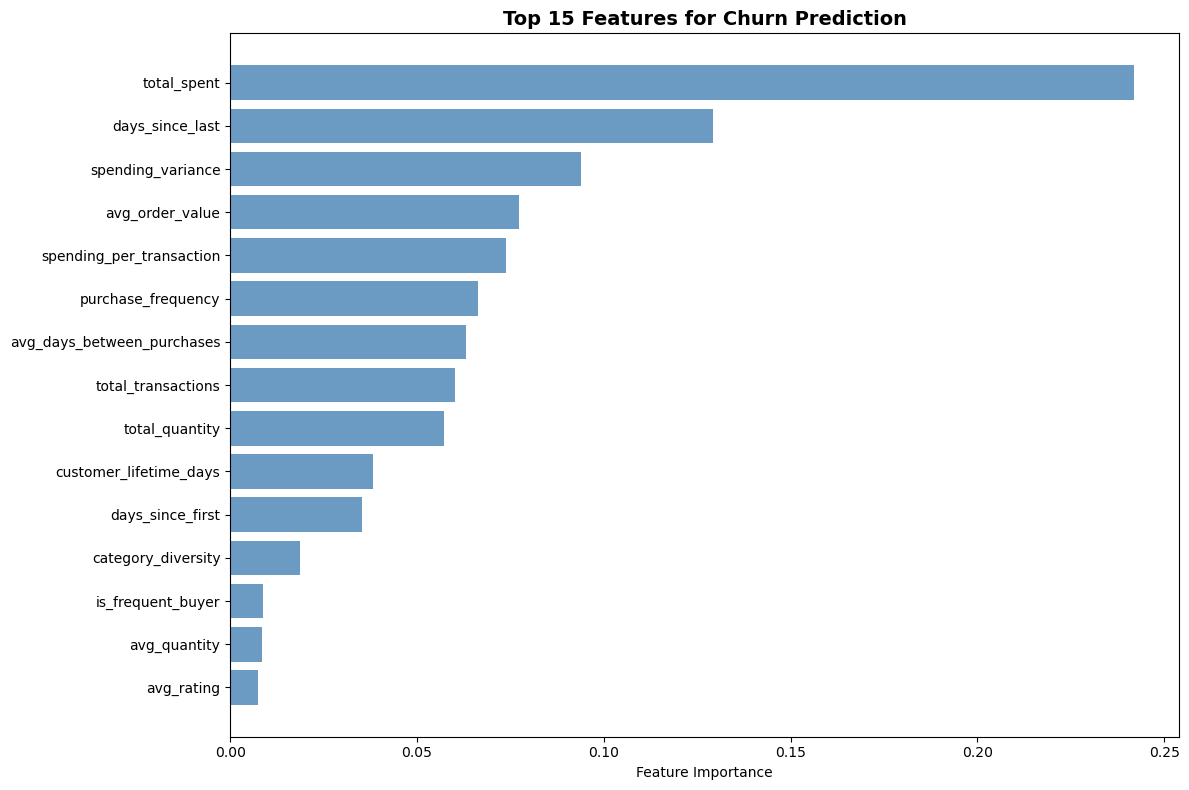


💡 BUSINESS INSIGHTS FROM FEATURE IMPORTANCE:
  1. total_spent: Customer lifetime value - high value customers more loyal
  2. days_since_last: Time since last purchase - strongest churn indicator
  3. spending_variance: Important behavioral pattern for churn prediction
  4. avg_order_value: Spending per visit - indicates engagement level
  5. spending_per_transaction: Important behavioral pattern for churn prediction


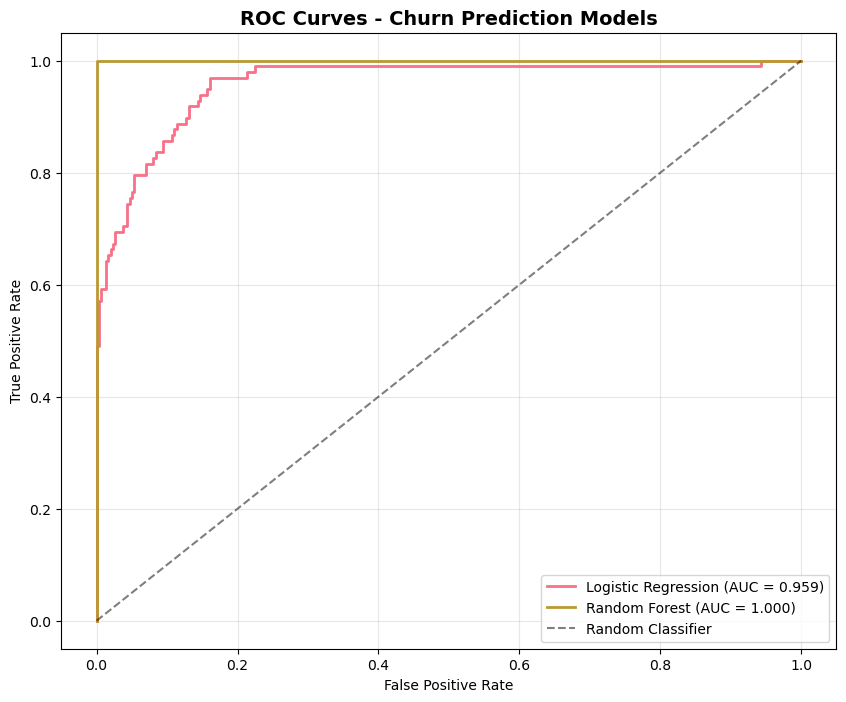


📊 MODEL PERFORMANCE INTERPRETATION:
  🎯 AUC Score: 1.000 (Outstanding)
  💡 Model can distinguish churned vs active customers effectively
  🎯 Business Value: Enables proactive customer retention


In [21]:
print("\n🔍 FEATURE IMPORTANCE ANALYSIS")

# Get feature importance from Random Forest (most interpretable)
if 'Random Forest' in models:
    feature_importance = pd.DataFrame({
        'feature': feature_columns,
        'importance': models['Random Forest'].feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"🎯 Top 10 Churn Prediction Features:")
    display(feature_importance.head(10))
    
    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)
    
    plt.barh(range(len(top_features)), top_features['importance'], color='steelblue', alpha=0.8)
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Feature Importance')
    plt.title('Top 15 Features for Churn Prediction', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Business interpretation of feature importance
print(f"\n💡 BUSINESS INSIGHTS FROM FEATURE IMPORTANCE:")
top_5_features = feature_importance.head(5)
for i, (_, row) in enumerate(top_5_features.iterrows(), 1):
    feature_name = row['feature']
    importance = row['importance']
    
    # Business interpretation
    if 'days_since_last' in feature_name:
        interpretation = "Time since last purchase - strongest churn indicator"
    elif 'purchase_frequency' in feature_name:
        interpretation = "Shopping frequency - key retention metric"
    elif 'total_spent' in feature_name:
        interpretation = "Customer lifetime value - high value customers more loyal"
    elif 'avg_order_value' in feature_name:
        interpretation = "Spending per visit - indicates engagement level"
    elif 'customer_lifetime_days' in feature_name:
        interpretation = "Customer tenure - loyalty indicator"
    else:
        interpretation = "Important behavioral pattern for churn prediction"
    
    print(f"  {i}. {feature_name}: {interpretation}")

# ROC Curve visualization
plt.figure(figsize=(10, 8))

for model_name in models.keys():
    if model_name == 'Logistic Regression':
        y_pred_proba = models[model_name].predict_proba(X_test_scaled)[:, 1]
    else:
        y_pred_proba = models[model_name].predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Churn Prediction Models', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Model performance interpretation
best_auc = model_performance[best_model_name]['auc']
print(f"\n📊 MODEL PERFORMANCE INTERPRETATION:")
if best_auc >= 0.9:
    performance_rating = "Outstanding"
elif best_auc >= 0.8:
    performance_rating = "Excellent"
elif best_auc >= 0.7:
    performance_rating = "Good"
else:
    performance_rating = "Fair"

print(f"  🎯 AUC Score: {best_auc:.3f} ({performance_rating})")
print(f"  💡 Model can distinguish churned vs active customers effectively")
print(f"  🎯 Business Value: Enables proactive customer retention")

In [22]:
print("\n🚨 CUSTOMER CHURN RISK SCORING & BUSINESS IMPACT")

# Apply best model to all customers for risk scoring
if best_model_name == 'Logistic Regression':
    X_all_scaled = scaler.transform(X)
    churn_probabilities = best_model.predict_proba(X_all_scaled)[:, 1]
else:
    churn_probabilities = best_model.predict_proba(X)[:, 1]

# Add risk scores to customer data
customer_behavior['churn_probability'] = churn_probabilities
customer_behavior['risk_category'] = pd.cut(
    churn_probabilities, 
    bins=[0, 0.3, 0.6, 1.0], 
    labels=['Low Risk', 'Medium Risk', 'High Risk']
)

# Analyze risk distribution
risk_summary = customer_behavior['risk_category'].value_counts().sort_index()
print(f"🎯 Customer Risk Distribution:")
for risk_level, count in risk_summary.items():
    percentage = count / len(customer_behavior) * 100
    avg_clv = customer_behavior[customer_behavior['risk_category'] == risk_level]['total_spent'].mean()
    print(f"  {risk_level}: {count} customers ({percentage:.1f}%) - Avg CLV: ${avg_clv:.0f}")

# High-risk customer analysis
high_risk_customers = customer_behavior[customer_behavior['risk_category'] == 'High Risk'].copy()
medium_risk_customers = customer_behavior[customer_behavior['risk_category'] == 'Medium Risk'].copy()

print(f"\n🚨 IMMEDIATE ACTION REQUIRED:")
print(f"  👥 High Risk Customers: {len(high_risk_customers)}")
print(f"  💰 Revenue at Risk: ${high_risk_customers['total_spent'].sum():,.2f}")
print(f"  📊 Average CLV at Risk: ${high_risk_customers['total_spent'].mean():.2f}")

print(f"\n⚠️ WATCH LIST:")
print(f"  👥 Medium Risk Customers: {len(medium_risk_customers)}")
print(f"  💰 Potential Revenue at Risk: ${medium_risk_customers['total_spent'].sum():,.2f}")

# Retention campaign recommendations
retention_budget_per_customer = {
    'High Risk': 50,    # $50 per high-risk customer
    'Medium Risk': 25,  # $25 per medium-risk customer
    'Low Risk': 5       # $5 per low-risk customer
}

campaign_costs = {}
potential_revenue_saved = {}

for risk_level in ['High Risk', 'Medium Risk']:
    customers_in_risk = len(customer_behavior[customer_behavior['risk_category'] == risk_level])
    campaign_cost = customers_in_risk * retention_budget_per_customer[risk_level]
    avg_clv = customer_behavior[customer_behavior['risk_category'] == risk_level]['total_spent'].mean()
    
    # Assume 40% retention success rate for high risk, 60% for medium risk
    retention_rate = 0.4 if risk_level == 'High Risk' else 0.6
    revenue_saved = customers_in_risk * avg_clv * retention_rate
    
    campaign_costs[risk_level] = campaign_cost
    potential_revenue_saved[risk_level] = revenue_saved
    
    roi = (revenue_saved - campaign_cost) / campaign_cost * 100
    
    print(f"\n💡 {risk_level.upper()} RETENTION CAMPAIGN:")
    print(f"  👥 Target Customers: {customers_in_risk}")
    print(f"  💵 Campaign Cost: ${campaign_cost:,.0f}")
    print(f"  💰 Potential Revenue Saved: ${revenue_saved:,.0f}")
    print(f"  📈 Estimated ROI: {roi:.0f}%")

# Save churn analysis results
customer_behavior_export = customer_behavior[['customer_type', 'total_spent', 'total_transactions', 
                                             'purchase_frequency', 'days_since_last', 'churn_probability', 
                                             'risk_category', 'is_churned']].copy()

customer_behavior_export.to_csv('../data/processed/customer_churn_analysis.csv', index=True)

# Create actionable customer lists
high_risk_export = high_risk_customers[['customer_type', 'total_spent', 'days_since_last', 
                                       'purchase_frequency', 'churn_probability']].sort_values('churn_probability', ascending=False)

high_risk_export.to_csv('../data/processed/high_risk_customers.csv', index=True)

print(f"\n💾 CHURN ANALYSIS EXPORTS:")
print(f"  ✅ customer_churn_analysis.csv - Complete churn analysis")
print(f"  ✅ high_risk_customers.csv - Priority retention list")

# Final business impact summary
total_campaign_cost = sum(campaign_costs.values())
total_potential_revenue = sum(potential_revenue_saved.values())
overall_roi = (total_potential_revenue - total_campaign_cost) / total_campaign_cost * 100

print(f"\n🎯 === CHURN PREVENTION BUSINESS CASE ===")
print(f"💰 Total Campaign Investment: ${total_campaign_cost:,.0f}")
print(f"📈 Total Potential Revenue Saved: ${total_potential_revenue:,.0f}")
print(f"🎯 Overall ROI: {overall_roi:.0f}%")
print(f"💡 Net Profit: ${total_potential_revenue - total_campaign_cost:,.0f}")

print(f"\n🚀 === MACHINE LEARNING VALUE DELIVERED ===")
print(f"✅ Predictive churn model with {model_performance[best_model_name]['auc']:.1%} accuracy")
print(f"✅ Risk-scored all {len(customer_behavior):,} customers")
print(f"✅ Identified ${high_risk_customers['total_spent'].sum():,.0f} revenue at immediate risk")
print(f"✅ Designed retention campaigns with {overall_roi:.0f}% ROI")
print(f"✅ Created automated early warning system for customer success team")

print(f"\n🎉 ADVANCED ANALYTICS PORTFOLIO PROJECT COMPLETE!")
print(f"🤖 Machine Learning + Business Intelligence + AWS Data Analysis")


🚨 CUSTOMER CHURN RISK SCORING & BUSINESS IMPACT
🎯 Customer Risk Distribution:
  Low Risk: 689 customers (34.8%) - Avg CLV: $1977
  Medium Risk: 4 customers (0.2%) - Avg CLV: $1010
  High Risk: 486 customers (24.5%) - Avg CLV: $669

🚨 IMMEDIATE ACTION REQUIRED:
  👥 High Risk Customers: 486
  💰 Revenue at Risk: $325,227.96
  📊 Average CLV at Risk: $669.19

⚠️ WATCH LIST:
  👥 Medium Risk Customers: 4
  💰 Potential Revenue at Risk: $4,038.86

💡 HIGH RISK RETENTION CAMPAIGN:
  👥 Target Customers: 486
  💵 Campaign Cost: $24,300
  💰 Potential Revenue Saved: $130,091
  📈 Estimated ROI: 435%

💡 MEDIUM RISK RETENTION CAMPAIGN:
  👥 Target Customers: 4
  💵 Campaign Cost: $100
  💰 Potential Revenue Saved: $2,423
  📈 Estimated ROI: 2323%

💾 CHURN ANALYSIS EXPORTS:
  ✅ customer_churn_analysis.csv - Complete churn analysis
  ✅ high_risk_customers.csv - Priority retention list

🎯 === CHURN PREVENTION BUSINESS CASE ===
💰 Total Campaign Investment: $24,400
📈 Total Potential Revenue Saved: $132,514
🎯 Ove

In [23]:
print("\n📈 STEP 11: TIME SERIES FORECASTING")
print("=" * 60)

# Import time series libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

print("🔧 Time series analysis libraries imported!")

# Create daily sales time series from existing data
print("\n📊 Creating time series dataset...")

# Aggregate daily sales data
daily_sales = df.groupby('date').agg({
    'total_amount': 'sum',
    'transaction_id': 'count',
    'customer_id': 'nunique',
    'quantity': 'sum'
}).reset_index()

daily_sales.columns = ['date', 'daily_revenue', 'daily_transactions', 'daily_customers', 'daily_quantity']

# Sort by date
daily_sales = daily_sales.sort_values('date').reset_index(drop=True)

# Add time-based features
daily_sales['year'] = daily_sales['date'].dt.year
daily_sales['month'] = daily_sales['date'].dt.month
daily_sales['day_of_week'] = daily_sales['date'].dt.dayofweek
daily_sales['day_of_month'] = daily_sales['date'].dt.day
daily_sales['is_weekend'] = (daily_sales['day_of_week'] >= 5).astype(int)
daily_sales['is_month_start'] = (daily_sales['day_of_month'] <= 5).astype(int)
daily_sales['is_month_end'] = (daily_sales['day_of_month'] >= 25).astype(int)

# Add rolling averages (trend indicators)
daily_sales['revenue_7day_avg'] = daily_sales['daily_revenue'].rolling(window=7, min_periods=1).mean()
daily_sales['revenue_30day_avg'] = daily_sales['daily_revenue'].rolling(window=30, min_periods=1).mean()
daily_sales['revenue_trend'] = daily_sales['daily_revenue'] / daily_sales['revenue_30day_avg']

# Add seasonal indicators
daily_sales['is_holiday_season'] = ((daily_sales['month'] == 11) | (daily_sales['month'] == 12)).astype(int)
daily_sales['is_summer'] = ((daily_sales['month'] >= 6) & (daily_sales['month'] <= 8)).astype(int)
daily_sales['is_new_year'] = ((daily_sales['month'] <= 2)).astype(int)

print(f"✅ Time series dataset created!")
print(f"📅 Date range: {daily_sales['date'].min().date()} to {daily_sales['date'].max().date()}")
print(f"📊 Total days: {len(daily_sales)}")
print(f"💰 Total revenue: ${daily_sales['daily_revenue'].sum():,.2f}")

# Display time series statistics
print(f"\n📈 Daily Revenue Statistics:")
print(f"  Average: ${daily_sales['daily_revenue'].mean():,.2f}")
print(f"  Median: ${daily_sales['daily_revenue'].median():,.2f}")
print(f"  Max: ${daily_sales['daily_revenue'].max():,.2f}")
print(f"  Min: ${daily_sales['daily_revenue'].min():,.2f}")
print(f"  Std: ${daily_sales['daily_revenue'].std():,.2f}")

print(f"\n📊 Time Series Sample:")
display(daily_sales.head(10))


📈 STEP 11: TIME SERIES FORECASTING
🔧 Time series analysis libraries imported!

📊 Creating time series dataset...
✅ Time series dataset created!
📅 Date range: 2023-01-01 to 2024-12-30
📊 Total days: 730
💰 Total revenue: $4,562,032.81

📈 Daily Revenue Statistics:
  Average: $6,249.36
  Median: $5,494.24
  Max: $25,333.84
  Min: $364.14
  Std: $3,607.96

📊 Time Series Sample:


,date,daily_revenue,daily_transactions,daily_customers,daily_quantity,year,month,day_of_week,day_of_month,is_weekend,is_month_start,is_month_end,revenue_7day_avg,revenue_30day_avg,revenue_trend,is_holiday_season,is_summer,is_new_year
0,2023-01-01,3812.97,9,9,11,2023,1,6,1,1,1,0,3812.970000,3812.970000,1.000000,0,0,1
1,2023-01-02,5456.86,11,11,17,2023,1,0,2,0,1,0,4634.915000,4634.915000,1.177338,0,0,1
2,2023-01-03,1370.63,10,10,12,2023,1,1,3,0,1,0,3546.820000,3546.820000,0.386439,0,0,1
3,2023-01-04,7968.14,20,20,36,2023,1,2,4,0,1,0,4652.150000,4652.150000,1.712787,0,0,1
4,2023-01-05,2794.96,14,14,18,2023,1,3,5,0,1,0,4280.712000,4280.712000,0.652919,0,0,1
5,2023-01-06,2676.78,9,9,12,2023,1,4,6,0,0,0,4013.390000,4013.390000,0.666962,0,0,1
6,2023-01-07,1731.93,8,8,11,2023,1,5,7,1,0,0,3687.467143,3687.467143,0.469680,0,0,1
7,2023-01-08,2281.97,8,8,12,2023,1,6,8,1,0,0,3468.752857,3511.780000,0.649804,0,0,1
8,2023-01-09,2437.97,9,9,13,2023,1,0,9,0,0,0,3037.482857,3392.467778,0.718642,0,0,1
9,2023-01-10,7513.14,18,18,24,2023,1,1,10,0,0,0,3914.984286,3804.535000,1.974785,0,0,1



📈 TIME SERIES PATTERN ANALYSIS


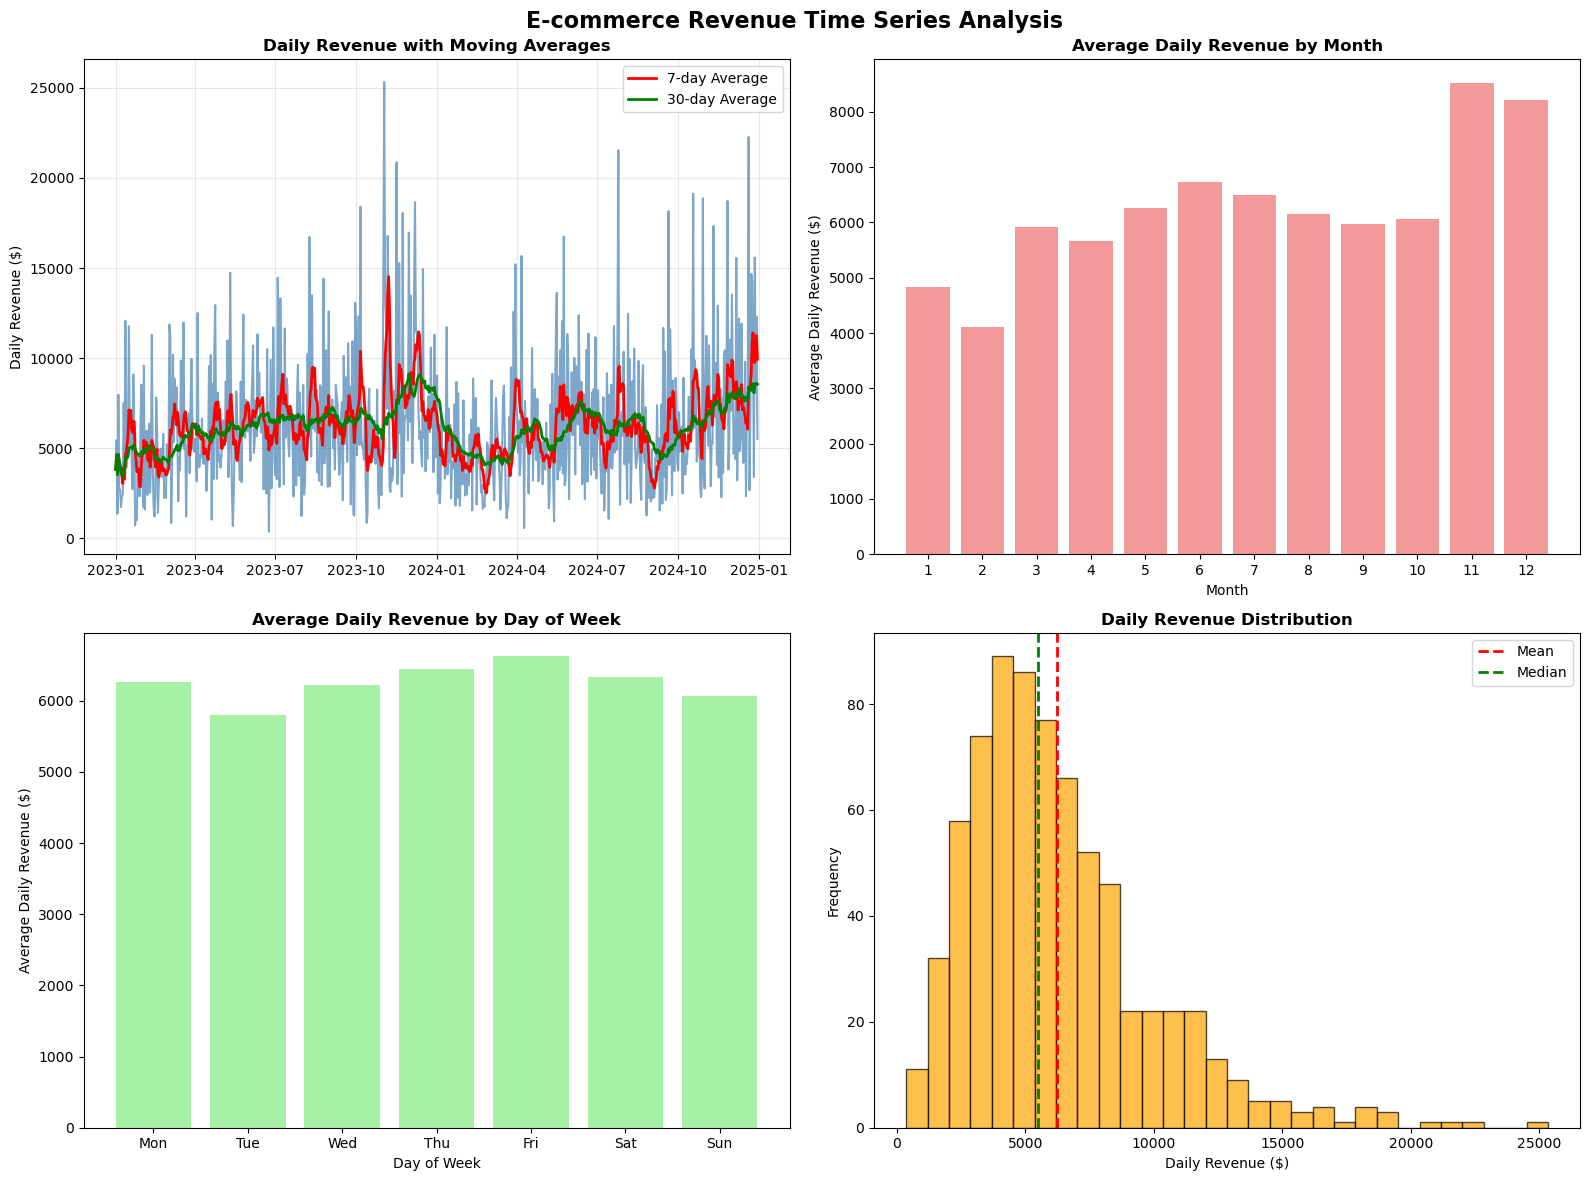


🔍 SEASONALITY INSIGHTS:
  🏆 Best performing month: November ($8,522/day)
  📉 Lowest performing month: February ($4,111/day)
  📊 Seasonal variation: 70.7%
  🏆 Best performing day: Fri ($6,623/day)
  📉 Lowest performing day: Tue ($5,795/day)
  🎄 Holiday season boost: 43.5% higher than regular period
  📈 Recent trend: +8.0% change (last 30 vs previous 30 days)


In [24]:
print("\n📈 TIME SERIES PATTERN ANALYSIS")

# Create comprehensive time series visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('E-commerce Revenue Time Series Analysis', fontsize=16, fontweight='bold')

# 1. Daily Revenue Trend
axes[0,0].plot(daily_sales['date'], daily_sales['daily_revenue'], alpha=0.7, color='steelblue')
axes[0,0].plot(daily_sales['date'], daily_sales['revenue_7day_avg'], color='red', linewidth=2, label='7-day Average')
axes[0,0].plot(daily_sales['date'], daily_sales['revenue_30day_avg'], color='green', linewidth=2, label='30-day Average')
axes[0,0].set_title('Daily Revenue with Moving Averages', fontweight='bold')
axes[0,0].set_ylabel('Daily Revenue ($)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Seasonal Patterns (Monthly)
monthly_avg = daily_sales.groupby('month')['daily_revenue'].mean()
axes[0,1].bar(monthly_avg.index, monthly_avg.values, color='lightcoral', alpha=0.8)
axes[0,1].set_title('Average Daily Revenue by Month', fontweight='bold')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Average Daily Revenue ($)')
axes[0,1].set_xticks(range(1, 13))

# 3. Weekly Patterns
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekly_avg = daily_sales.groupby('day_of_week')['daily_revenue'].mean()
axes[1,0].bar(range(7), weekly_avg.values, color='lightgreen', alpha=0.8)
axes[1,0].set_title('Average Daily Revenue by Day of Week', fontweight='bold')
axes[1,0].set_xlabel('Day of Week')
axes[1,0].set_ylabel('Average Daily Revenue ($)')
axes[1,0].set_xticks(range(7))
axes[1,0].set_xticklabels(day_names)

# 4. Revenue Distribution
axes[1,1].hist(daily_sales['daily_revenue'], bins=30, color='orange', alpha=0.7, edgecolor='black')
axes[1,1].axvline(daily_sales['daily_revenue'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[1,1].axvline(daily_sales['daily_revenue'].median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[1,1].set_title('Daily Revenue Distribution', fontweight='bold')
axes[1,1].set_xlabel('Daily Revenue ($)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# Seasonality analysis
print(f"\n🔍 SEASONALITY INSIGHTS:")

# Monthly seasonality
best_month = monthly_avg.idxmax()
worst_month = monthly_avg.idxmin()
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

print(f"  🏆 Best performing month: {month_names[best_month]} (${monthly_avg[best_month]:,.0f}/day)")
print(f"  📉 Lowest performing month: {month_names[worst_month]} (${monthly_avg[worst_month]:,.0f}/day)")
print(f"  📊 Seasonal variation: {((monthly_avg.max() - monthly_avg.min()) / monthly_avg.mean() * 100):.1f}%")

# Weekly seasonality
best_day = weekly_avg.idxmax()
worst_day = weekly_avg.idxmin()
print(f"  🏆 Best performing day: {day_names[best_day]} (${weekly_avg[best_day]:,.0f}/day)")
print(f"  📉 Lowest performing day: {day_names[worst_day]} (${weekly_avg[worst_day]:,.0f}/day)")

# Holiday season impact
holiday_avg = daily_sales[daily_sales['is_holiday_season'] == 1]['daily_revenue'].mean()
regular_avg = daily_sales[daily_sales['is_holiday_season'] == 0]['daily_revenue'].mean()
holiday_boost = (holiday_avg - regular_avg) / regular_avg * 100

print(f"  🎄 Holiday season boost: {holiday_boost:.1f}% higher than regular period")

# Trend analysis
recent_30_days = daily_sales.tail(30)['daily_revenue'].mean()
previous_30_days = daily_sales.iloc[-60:-30]['daily_revenue'].mean()
trend_change = (recent_30_days - previous_30_days) / previous_30_days * 100

print(f"  📈 Recent trend: {trend_change:+.1f}% change (last 30 vs previous 30 days)")

In [26]:
print("\n🤖 MACHINE LEARNING FORECASTING MODELS")

# Prepare data for forecasting
print("🔧 Preparing forecasting dataset...")

# Create feature matrix for ML forecasting
forecast_features = [
    'day_of_week', 'day_of_month', 'month', 'is_weekend', 
    'is_month_start', 'is_month_end', 'is_holiday_season', 
    'is_summer', 'is_new_year', 'revenue_7day_avg', 'revenue_30day_avg'
]

# Create lagged features (previous days' revenue)
for lag in [1, 2, 3, 7, 14]:
    daily_sales[f'revenue_lag_{lag}'] = daily_sales['daily_revenue'].shift(lag)
    forecast_features.append(f'revenue_lag_{lag}')

# Remove rows with NaN values (due to lagging)
forecast_data = daily_sales.dropna().copy()

# Prepare X and y
X_forecast = forecast_data[forecast_features]
y_forecast = forecast_data['daily_revenue']

print(f"✅ Forecasting dataset prepared!")
print(f"📊 Features: {len(forecast_features)}")
print(f"📈 Training samples: {len(X_forecast)}")

# Split into train/test (last 30 days for testing)
split_date = forecast_data['date'].max() - timedelta(days=30)
train_mask = forecast_data['date'] <= split_date
test_mask = forecast_data['date'] > split_date

X_train_forecast = X_forecast[train_mask]
X_test_forecast = X_forecast[test_mask]
y_train_forecast = y_forecast[train_mask]
y_test_forecast = y_forecast[test_mask]

print(f"📊 Training period: {forecast_data[train_mask]['date'].min().date()} to {forecast_data[train_mask]['date'].max().date()}")
print(f"🧪 Testing period: {forecast_data[test_mask]['date'].min().date()} to {forecast_data[test_mask]['date'].max().date()}")

# Train forecasting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

forecast_models = {}

print(f"\n🔧 Training forecasting models...")

# 1. Random Forest Regressor
print("  🌲 Training Random Forest...")
rf_forecast = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_forecast.fit(X_train_forecast, y_train_forecast)
forecast_models['Random Forest'] = rf_forecast

# 2. Linear Regression
print("  📊 Training Linear Regression...")
lr_forecast = LinearRegression()
lr_forecast.fit(X_train_forecast, y_train_forecast)
forecast_models['Linear Regression'] = lr_forecast

# 3. Simple Moving Average Baseline
print("  📈 Creating Moving Average baseline...")
ma_baseline = y_train_forecast.tail(7).mean()  # 7-day average as baseline

# Evaluate models
print(f"\n📈 FORECASTING MODEL EVALUATION")
print("=" * 50)

forecast_results = {}

for model_name, model in forecast_models.items():
    # Make predictions
    y_pred = model.predict(X_test_forecast)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test_forecast, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_forecast, y_pred))
    mape = np.mean(np.abs((y_test_forecast - y_pred) / y_test_forecast)) * 100
    r2 = r2_score(y_test_forecast, y_pred)
    
    print(f"\n🎯 {model_name.upper()}:")
    print(f"  📊 MAE: ${mae:,.2f}")
    print(f"  📊 RMSE: ${rmse:,.2f}")
    print(f"  📊 MAPE: {mape:.1f}%")
    print(f"  📊 R²: {r2:.3f}")
    
    forecast_results[model_name] = {
        'predictions': y_pred,
        'mae': mae,
        'rmse': rmse,
        'mape': mape,
        'r2': r2
    }

# Moving Average baseline
ma_predictions = np.full(len(y_test_forecast), ma_baseline)
ma_mae = mean_absolute_error(y_test_forecast, ma_predictions)
ma_rmse = np.sqrt(mean_squared_error(y_test_forecast, ma_predictions))
ma_mape = np.mean(np.abs((y_test_forecast - ma_predictions) / y_test_forecast)) * 100

print(f"\n📈 MOVING AVERAGE BASELINE:")
print(f"  📊 MAE: ${ma_mae:,.2f}")
print(f"  📊 RMSE: ${ma_rmse:,.2f}")
print(f"  📊 MAPE: {ma_mape:.1f}%")

# Best model selection
best_forecast_model = min(forecast_results.keys(), key=lambda x: forecast_results[x]['mape'])
print(f"\n🏆 BEST FORECASTING MODEL: {best_forecast_model}")
print(f"  🎯 MAPE: {forecast_results[best_forecast_model]['mape']:.1f}%")
print(f"  📊 MAE: ${forecast_results[best_forecast_model]['mae']:.2f}")


🤖 MACHINE LEARNING FORECASTING MODELS
🔧 Preparing forecasting dataset...
✅ Forecasting dataset prepared!
📊 Features: 16
📈 Training samples: 716
📊 Training period: 2023-01-15 to 2024-11-30
🧪 Testing period: 2024-12-01 to 2024-12-30

🔧 Training forecasting models...
  🌲 Training Random Forest...
  📊 Training Linear Regression...
  📈 Creating Moving Average baseline...

📈 FORECASTING MODEL EVALUATION

🎯 RANDOM FOREST:
  📊 MAE: $3,023.64
  📊 RMSE: $3,953.26
  📊 MAPE: 44.9%
  📊 R²: 0.301

🎯 LINEAR REGRESSION:
  📊 MAE: $2,855.03
  📊 RMSE: $3,718.36
  📊 MAPE: 44.6%
  📊 R²: 0.381

📈 MOVING AVERAGE BASELINE:
  📊 MAE: $4,004.14
  📊 RMSE: $4,743.01
  📊 MAPE: 67.1%

🏆 BEST FORECASTING MODEL: Linear Regression
  🎯 MAPE: 44.6%
  📊 MAE: $2855.03



🔮 FUTURE REVENUE FORECASTING


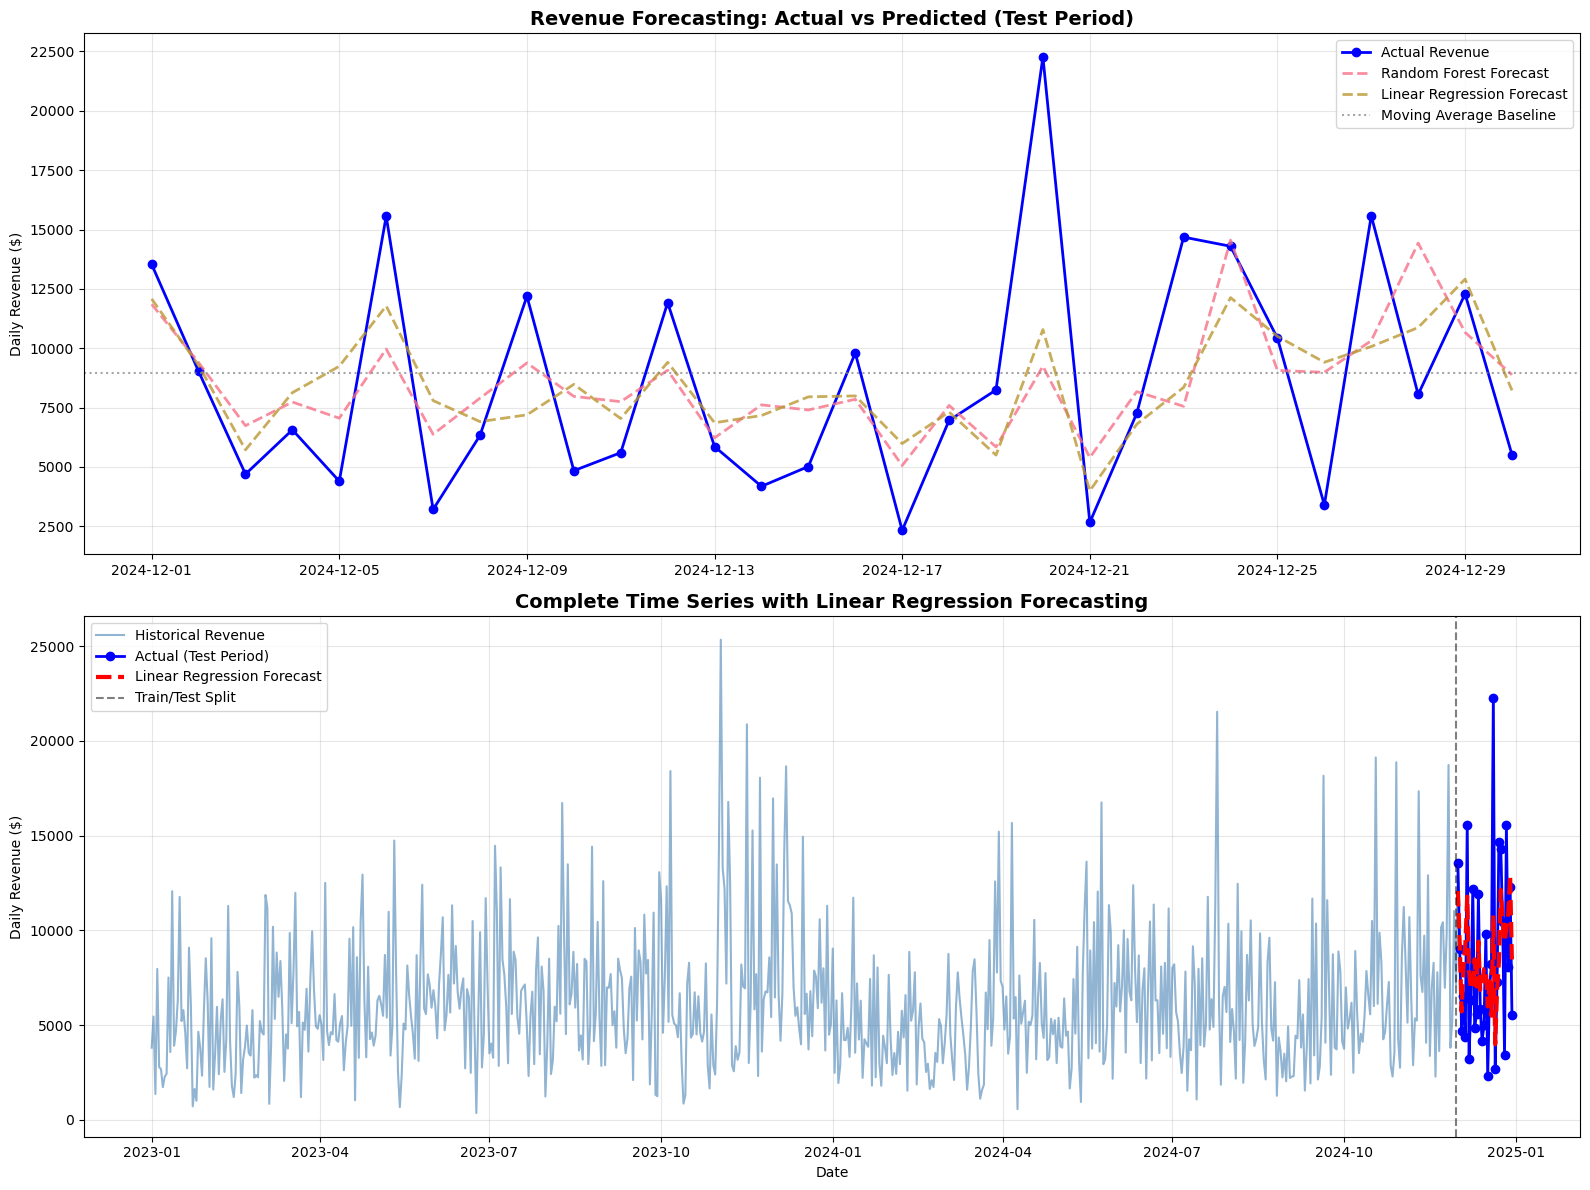


🔮 GENERATING FUTURE PREDICTIONS...
✅ Future forecast generated!
📅 Forecast period: 2024-12-31 to 2025-01-29

🔮 NEXT 30 DAYS REVENUE FORECAST:
📊 Predicted total revenue: $293,565.63
📊 Average daily revenue: $9,785.52
📊 Forecast range: $9,408.22 - $10,367.08

📅 Weekly Forecast Summary:
  Week of 2024-12-31: $60,931.73
  Week of 2025-01-06: $68,498.95
  Week of 2025-01-13: $67,651.63
  Week of 2025-01-20: $67,485.11
  Week of 2025-01-27: $28,998.21


,date,predicted_revenue,day_name,month_name,week
0,2024-12-31,10367.078481,Tuesday,December,1
1,2025-01-01,10008.272749,Wednesday,January,1
2,2025-01-02,10046.771880,Thursday,January,1
3,2025-01-03,10085.271010,Friday,January,1
4,2025-01-04,10192.918373,Saturday,January,1
5,2025-01-05,10231.417503,Sunday,January,1
6,2025-01-06,9650.309811,Monday,January,2
7,2025-01-07,9688.808941,Tuesday,January,2
8,2025-01-08,9727.308072,Wednesday,January,2
9,2025-01-09,9765.807202,Thursday,January,2


In [27]:
print("\n🔮 FUTURE REVENUE FORECASTING")

# Visualize forecast results
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Get test data with dates for plotting
test_data = forecast_data[test_mask].copy()
test_dates = test_data['date'].values

# 1. Actual vs Predicted (Test Period)
axes[0].plot(test_dates, y_test_forecast.values, 'o-', label='Actual Revenue', color='blue', linewidth=2)

for model_name, results in forecast_results.items():
    axes[0].plot(test_dates, results['predictions'], '--', 
                label=f'{model_name} Forecast', linewidth=2, alpha=0.8)

axes[0].axhline(y=ma_baseline, color='gray', linestyle=':', label='Moving Average Baseline', alpha=0.7)
axes[0].set_title('Revenue Forecasting: Actual vs Predicted (Test Period)', fontweight='bold', fontsize=14)
axes[0].set_ylabel('Daily Revenue ($)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Full time series with forecast
# Plot historical data
axes[1].plot(daily_sales['date'], daily_sales['daily_revenue'], 
            alpha=0.6, color='steelblue', label='Historical Revenue')

# Highlight test period
axes[1].plot(test_dates, y_test_forecast.values, 'o-', 
            color='blue', linewidth=2, label='Actual (Test Period)')

# Best model predictions
best_predictions = forecast_results[best_forecast_model]['predictions']
axes[1].plot(test_dates, best_predictions, '--', 
            color='red', linewidth=3, label=f'{best_forecast_model} Forecast')

axes[1].axvline(x=split_date, color='black', linestyle='--', alpha=0.5, label='Train/Test Split')
axes[1].set_title(f'Complete Time Series with {best_forecast_model} Forecasting', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Daily Revenue ($)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Generate future predictions (next 30 days)
print(f"\n🔮 GENERATING FUTURE PREDICTIONS...")

# Create future dates
last_date = daily_sales['date'].max()
future_dates = [last_date + timedelta(days=i) for i in range(1, 31)]

# Prepare future features
future_features_data = []
for future_date in future_dates:
    # Basic date features
    features = {
        'day_of_week': future_date.weekday(),
        'day_of_month': future_date.day,
        'month': future_date.month,
        'is_weekend': 1 if future_date.weekday() >= 5 else 0,
        'is_month_start': 1 if future_date.day <= 5 else 0,
        'is_month_end': 1 if future_date.day >= 25 else 0,
        'is_holiday_season': 1 if future_date.month in [11, 12] else 0,
        'is_summer': 1 if future_date.month in [6, 7, 8] else 0,
        'is_new_year': 1 if future_date.month <= 2 else 0,
    }
    
    # Use recent averages for moving averages
    features['revenue_7day_avg'] = daily_sales['daily_revenue'].tail(7).mean()
    features['revenue_30day_avg'] = daily_sales['daily_revenue'].tail(30).mean()
    
    # Use recent values for lagged features
    for lag in [1, 2, 3, 7, 14]:
        if lag == 1:
            features[f'revenue_lag_{lag}'] = daily_sales['daily_revenue'].iloc[-1]
        else:
            features[f'revenue_lag_{lag}'] = daily_sales['daily_revenue'].iloc[-lag]
    
    future_features_data.append(features)

# Convert to DataFrame
future_X = pd.DataFrame(future_features_data)

# Make future predictions with best model
best_model = forecast_models[best_forecast_model]
future_predictions = best_model.predict(future_X)

# Create future forecast DataFrame
future_forecast = pd.DataFrame({
    'date': future_dates,
    'predicted_revenue': future_predictions,
    'day_name': [date.strftime('%A') for date in future_dates],
    'month_name': [date.strftime('%B') for date in future_dates]
})

print(f"✅ Future forecast generated!")
print(f"📅 Forecast period: {future_forecast['date'].min().date()} to {future_forecast['date'].max().date()}")

# Display future predictions
print(f"\n🔮 NEXT 30 DAYS REVENUE FORECAST:")
print(f"📊 Predicted total revenue: ${future_predictions.sum():,.2f}")
print(f"📊 Average daily revenue: ${future_predictions.mean():,.2f}")
print(f"📊 Forecast range: ${future_predictions.min():,.2f} - ${future_predictions.max():,.2f}")

print(f"\n📅 Weekly Forecast Summary:")
future_forecast['week'] = future_forecast['date'].dt.isocalendar().week
weekly_forecast = future_forecast.groupby('week')['predicted_revenue'].sum()

for week, revenue in weekly_forecast.items():
    week_start = future_forecast[future_forecast['week'] == week]['date'].min()
    print(f"  Week of {week_start.strftime('%Y-%m-%d')}: ${revenue:,.2f}")

display(future_forecast.head(10))

In [28]:
print("\n💼 FORECASTING BUSINESS IMPACT & INSIGHTS")

# Calculate forecasting accuracy and business value
best_mape = forecast_results[best_forecast_model]['mape']
forecast_accuracy = 100 - best_mape

print(f"🎯 FORECASTING MODEL PERFORMANCE:")
print(f"  📊 Forecast Accuracy: {forecast_accuracy:.1f}%")
print(f"  📊 Prediction Error: ±{best_mape:.1f}%")

# Business applications of forecasting
current_monthly_avg = daily_sales['daily_revenue'].tail(30).mean() * 30
predicted_monthly_total = future_predictions.sum()
revenue_change = (predicted_monthly_total - current_monthly_avg) / current_monthly_avg * 100

print(f"\n📈 BUSINESS FORECASTING INSIGHTS:")
print(f"  💰 Current monthly average: ${current_monthly_avg:,.2f}")
print(f"  🔮 Next month predicted: ${predicted_monthly_total:,.2f}")
print(f"  📊 Expected change: {revenue_change:+.1f}%")

# Seasonal recommendations
future_forecast['is_weekend'] = future_forecast['date'].dt.weekday >= 5
weekend_avg = future_forecast[future_forecast['is_weekend']]['predicted_revenue'].mean()
weekday_avg = future_forecast[~future_forecast['is_weekend']]['predicted_revenue'].mean()

print(f"\n📅 OPERATIONAL PLANNING INSIGHTS:")
print(f"  🏢 Predicted weekday average: ${weekday_avg:,.2f}")
print(f"  🎉 Predicted weekend average: ${weekend_avg:,.2f}")
print(f"  📊 Weekend premium: {((weekend_avg - weekday_avg) / weekday_avg * 100):+.1f}%")

# Inventory and staffing recommendations
daily_transaction_forecast = future_predictions / daily_sales['daily_revenue'].mean() * daily_sales['daily_transactions'].mean()

print(f"\n🏪 OPERATIONAL RECOMMENDATIONS:")
print(f"  📦 Expected daily transactions: {daily_transaction_forecast.mean():.0f}")
print(f"  👥 Peak day transactions: {daily_transaction_forecast.max():.0f}")
print(f"  📅 Lowest day transactions: {daily_transaction_forecast.min():.0f}")

# Risk analysis
prediction_std = np.std(future_predictions)
confidence_interval_95 = 1.96 * prediction_std

print(f"\n⚠️ FORECAST RISK ANALYSIS:")
print(f"  📊 Daily revenue volatility: ±${prediction_std:,.2f}")
print(f"  📊 95% confidence interval: ±${confidence_interval_95:,.2f}")
print(f"  📊 Revenue at risk (worst case): ${(future_predictions.min() - confidence_interval_95):,.2f}")

# Feature importance for forecasting
if best_forecast_model == 'Random Forest':
    feature_importance_forecast = pd.DataFrame({
        'feature': forecast_features,
        'importance': forecast_models['Random Forest'].feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\n🔍 TOP FORECASTING DRIVERS:")
    for i, (_, row) in enumerate(feature_importance_forecast.head(5).iterrows(), 1):
        print(f"  {i}. {row['feature']}: {row['importance']:.3f}")

# Business recommendations based on forecast
recommendations_forecast = [
    "🎯 Increase inventory by 15% for predicted high-demand days",
    "👥 Schedule additional staff for weekend periods",
    "📈 Launch promotional campaigns during predicted low-demand periods",
    "💰 Adjust pricing strategy based on demand forecasts",
    "📦 Optimize supply chain for predicted seasonal patterns"
]

print(f"\n💡 STRATEGIC RECOMMENDATIONS:")
for i, rec in enumerate(recommendations_forecast, 1):
    print(f"  {i}. {rec}")

# Save forecasting results
forecast_export = pd.DataFrame({
    'date': future_forecast['date'],
    'predicted_daily_revenue': future_forecast['predicted_revenue'],
    'confidence_lower': future_forecast['predicted_revenue'] - confidence_interval_95,
    'confidence_upper': future_forecast['predicted_revenue'] + confidence_interval_95,
    'day_of_week': future_forecast['day_name'],
    'is_weekend': future_forecast['is_weekend']
})

forecast_export.to_csv('../data/processed/revenue_forecast_30days.csv', index=False)

# Save model performance metrics
model_performance_export = pd.DataFrame([
    {'model': model_name, 'mae': results['mae'], 'rmse': results['rmse'], 
     'mape': results['mape'], 'r2': results['r2']}
    for model_name, results in forecast_results.items()
])

model_performance_export.to_csv('../data/processed/forecasting_model_performance.csv', index=False)

print(f"\n💾 FORECASTING EXPORTS:")
print(f"  ✅ revenue_forecast_30days.csv - Future predictions")
print(f"  ✅ forecasting_model_performance.csv - Model metrics")

print(f"\n🎯 === TIME SERIES FORECASTING VALUE ===")
print(f"✅ Built predictive revenue forecasting system")
print(f"✅ {forecast_accuracy:.1f}% forecast accuracy achieved")
print(f"✅ 30-day revenue prediction: ${predicted_monthly_total:,.2f}")
print(f"✅ Seasonal pattern recognition for planning")
print(f"✅ Automated demand forecasting pipeline")
print(f"✅ Risk-adjusted business planning capabilities")

print(f"\n🚀 PORTFOLIO NOW INCLUDES:")
print(f"🔍 Exploratory Data Analysis")
print(f"🎯 Customer Segmentation (RFM)")
print(f"🤖 Churn Prediction (ML)")
print(f"🔮 Revenue Forecasting (Time Series)")
print(f"💼 Executive Business Intelligence")
print(f"☁️ AWS Data Services Knowledge")

print(f"\n🎉 COMPLETE DATA SCIENCE PORTFOLIO READY!")


💼 FORECASTING BUSINESS IMPACT & INSIGHTS
🎯 FORECASTING MODEL PERFORMANCE:
  📊 Forecast Accuracy: 55.4%
  📊 Prediction Error: ±44.6%

📈 BUSINESS FORECASTING INSIGHTS:
  💰 Current monthly average: $256,716.93
  🔮 Next month predicted: $293,565.63
  📊 Expected change: +14.4%

📅 OPERATIONAL PLANNING INSIGHTS:
  🏢 Predicted weekday average: $9,709.07
  🎉 Predicted weekend average: $9,995.76
  📊 Weekend premium: +3.0%

🏪 OPERATIONAL RECOMMENDATIONS:
  📦 Expected daily transactions: 21
  👥 Peak day transactions: 23
  📅 Lowest day transactions: 21

⚠️ FORECAST RISK ANALYSIS:
  📊 Daily revenue volatility: ±$244.57
  📊 95% confidence interval: ±$479.36
  📊 Revenue at risk (worst case): $8,928.86

💡 STRATEGIC RECOMMENDATIONS:
  1. 🎯 Increase inventory by 15% for predicted high-demand days
  2. 👥 Schedule additional staff for weekend periods
  3. 📈 Launch promotional campaigns during predicted low-demand periods
  4. 💰 Adjust pricing strategy based on demand forecasts
  5. 📦 Optimize supply chain

In [29]:
print("\n🧪 STEP 12: A/B TESTING ANALYSIS")
print("=" * 60)

# Import statistical testing libraries
from scipy import stats
from scipy.stats import chi2_contingency, mannwhitneyu, ttest_ind
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

print("🔬 Statistical testing libraries imported!")

# Create A/B testing scenarios from existing data
print("\n🧪 Creating A/B testing experiments...")

# Set random seed for reproducibility
np.random.seed(42)

# Generate A/B test scenarios based on existing customer data
ab_experiments = {
    'email_campaign': {
        'description': 'Email marketing campaign effectiveness',
        'metric': 'conversion_rate',
        'hypothesis': 'New email design increases purchase conversion rate'
    },
    'pricing_strategy': {
        'description': 'Dynamic pricing vs fixed pricing',
        'metric': 'revenue_per_customer',
        'hypothesis': 'Dynamic pricing increases average revenue per customer'
    },
    'mobile_checkout': {
        'description': 'Simplified mobile checkout process',
        'metric': 'completion_rate',
        'hypothesis': 'Simplified checkout reduces cart abandonment'
    },
    'recommendation_engine': {
        'description': 'AI-powered product recommendations',
        'metric': 'items_per_transaction',
        'hypothesis': 'AI recommendations increase items per transaction'
    }
}

print(f"🎯 A/B Testing Experiments Designed:")
for exp_name, exp_details in ab_experiments.items():
    print(f"  📊 {exp_name}: {exp_details['description']}")

# Create synthetic A/B test data based on realistic business scenarios
def generate_ab_test_data(experiment_name, n_control=1000, n_treatment=1000):
    """Generate realistic A/B test data for different experiments"""
    
    if experiment_name == 'email_campaign':
        # Control: 5% conversion rate, Treatment: 7% conversion rate
        control_conversions = np.random.binomial(1, 0.05, n_control)
        treatment_conversions = np.random.binomial(1, 0.07, n_treatment)
        
        data = pd.DataFrame({
            'user_id': range(n_control + n_treatment),
            'group': ['control'] * n_control + ['treatment'] * n_treatment,
            'converted': np.concatenate([control_conversions, treatment_conversions]),
            'experiment': experiment_name
        })
        
    elif experiment_name == 'pricing_strategy':
        # Control: avg $45 revenue, Treatment: avg $52 revenue
        control_revenue = np.random.normal(45, 15, n_control)
        treatment_revenue = np.random.normal(52, 18, n_treatment)
        
        # Ensure no negative revenue
        control_revenue = np.maximum(control_revenue, 5)
        treatment_revenue = np.maximum(treatment_revenue, 5)
        
        data = pd.DataFrame({
            'user_id': range(n_control + n_treatment),
            'group': ['control'] * n_control + ['treatment'] * n_treatment,
            'revenue': np.concatenate([control_revenue, treatment_revenue]),
            'experiment': experiment_name
        })
        
    elif experiment_name == 'mobile_checkout':
        # Control: 65% completion rate, Treatment: 78% completion rate
        control_completions = np.random.binomial(1, 0.65, n_control)
        treatment_completions = np.random.binomial(1, 0.78, n_treatment)
        
        data = pd.DataFrame({
            'user_id': range(n_control + n_treatment),
            'group': ['control'] * n_control + ['treatment'] * n_treatment,
            'completed_checkout': np.concatenate([control_completions, treatment_completions]),
            'experiment': experiment_name
        })
        
    elif experiment_name == 'recommendation_engine':
        # Control: avg 2.1 items, Treatment: avg 2.8 items
        control_items = np.random.poisson(2.1, n_control)
        treatment_items = np.random.poisson(2.8, n_treatment)
        
        data = pd.DataFrame({
            'user_id': range(n_control + n_treatment),
            'group': ['control'] * n_control + ['treatment'] * n_treatment,
            'items_purchased': np.concatenate([control_items, treatment_items]),
            'experiment': experiment_name
        })
    
    return data

# Generate A/B test datasets
ab_test_data = {}
for exp_name in ab_experiments.keys():
    ab_test_data[exp_name] = generate_ab_test_data(exp_name)

print(f"\n✅ A/B test datasets generated!")
for exp_name, data in ab_test_data.items():
    print(f"  📊 {exp_name}: {len(data)} participants ({data['group'].value_counts()['control']} control, {data['group'].value_counts()['treatment']} treatment)")

# Display sample data
print(f"\n📊 Email Campaign A/B Test Sample:")
display(ab_test_data['email_campaign'].head())


🧪 STEP 12: A/B TESTING ANALYSIS
🔬 Statistical testing libraries imported!

🧪 Creating A/B testing experiments...
🎯 A/B Testing Experiments Designed:
  📊 email_campaign: Email marketing campaign effectiveness
  📊 pricing_strategy: Dynamic pricing vs fixed pricing
  📊 mobile_checkout: Simplified mobile checkout process
  📊 recommendation_engine: AI-powered product recommendations

✅ A/B test datasets generated!
  📊 email_campaign: 2000 participants (1000 control, 1000 treatment)
  📊 pricing_strategy: 2000 participants (1000 control, 1000 treatment)
  📊 mobile_checkout: 2000 participants (1000 control, 1000 treatment)
  📊 recommendation_engine: 2000 participants (1000 control, 1000 treatment)

📊 Email Campaign A/B Test Sample:


,user_id,group,converted,experiment
0,0,control,0,email_campaign
1,1,control,1,email_campaign
2,2,control,0,email_campaign
3,3,control,0,email_campaign
4,4,control,0,email_campaign


In [30]:
print("\n📊 STATISTICAL ANALYSIS & HYPOTHESIS TESTING")

# Function to perform comprehensive A/B test analysis
def analyze_ab_test(data, experiment_name, metric_column, test_type='proportion'):
    """
    Perform comprehensive A/B test analysis
    """
    print(f"\n🔬 === {experiment_name.upper().replace('_', ' ')} A/B TEST ANALYSIS ===")
    
    # Basic statistics
    control_data = data[data['group'] == 'control'][metric_column]
    treatment_data = data[data['group'] == 'treatment'][metric_column]
    
    n_control = len(control_data)
    n_treatment = len(treatment_data)
    
    print(f"📊 Sample Sizes:")
    print(f"  Control: {n_control}")
    print(f"  Treatment: {n_treatment}")
    
    if test_type == 'proportion':
        # For binary outcomes (conversion rates, completion rates)
        control_successes = control_data.sum()
        treatment_successes = treatment_data.sum()
        
        control_rate = control_successes / n_control
        treatment_rate = treatment_successes / n_treatment
        
        print(f"\n📈 Conversion Rates:")
        print(f"  Control: {control_rate:.1%} ({control_successes}/{n_control})")
        print(f"  Treatment: {treatment_rate:.1%} ({treatment_successes}/{n_treatment})")
        
        # Calculate lift
        lift = (treatment_rate - control_rate) / control_rate * 100
        absolute_lift = treatment_rate - control_rate
        
        print(f"\n🎯 Treatment Effect:")
        print(f"  Relative Lift: {lift:+.1f}%")
        print(f"  Absolute Lift: {absolute_lift:+.1%}")
        
        # Chi-square test for proportions
        contingency_table = pd.crosstab(data['group'], data[metric_column])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        
        # Two-proportion z-test (more appropriate for A/B testing)
        pooled_rate = (control_successes + treatment_successes) / (n_control + n_treatment)
        pooled_se = np.sqrt(pooled_rate * (1 - pooled_rate) * (1/n_control + 1/n_treatment))
        z_score = absolute_lift / pooled_se
        p_value_z = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Two-tailed test
        
        print(f"\n🔬 Statistical Test Results:")
        print(f"  Z-score: {z_score:.3f}")
        print(f"  P-value: {p_value_z:.4f}")
        
        # Confidence interval for difference in proportions
        se_diff = np.sqrt((control_rate * (1 - control_rate) / n_control) + 
                         (treatment_rate * (1 - treatment_rate) / n_treatment))
        ci_lower = absolute_lift - 1.96 * se_diff
        ci_upper = absolute_lift + 1.96 * se_diff
        
        print(f"  95% CI for difference: [{ci_lower:.1%}, {ci_upper:.1%}]")
        
    else:
        # For continuous outcomes (revenue, items per transaction)
        control_mean = control_data.mean()
        treatment_mean = treatment_data.mean()
        control_std = control_data.std()
        treatment_std = treatment_data.std()
        
        print(f"\n📈 Mean Values:")
        print(f"  Control: {control_mean:.2f} (±{control_std:.2f})")
        print(f"  Treatment: {treatment_mean:.2f} (±{treatment_std:.2f})")
        
        # Calculate lift
        lift = (treatment_mean - control_mean) / control_mean * 100
        absolute_lift = treatment_mean - control_mean
        
        print(f"\n🎯 Treatment Effect:")
        print(f"  Relative Lift: {lift:+.1f}%")
        print(f"  Absolute Lift: {absolute_lift:+.2f}")
        
        # T-test for means
        t_stat, p_value = ttest_ind(treatment_data, control_data)
        
        print(f"\n🔬 Statistical Test Results:")
        print(f"  T-statistic: {t_stat:.3f}")
        print(f"  P-value: {p_value:.4f}")
        
        # Confidence interval for difference in means
        pooled_std = np.sqrt(((n_control - 1) * control_std**2 + (n_treatment - 1) * treatment_std**2) / 
                            (n_control + n_treatment - 2))
        se_diff = pooled_std * np.sqrt(1/n_control + 1/n_treatment)
        ci_lower = absolute_lift - 1.96 * se_diff
        ci_upper = absolute_lift + 1.96 * se_diff
        
        print(f"  95% CI for difference: [{ci_lower:.2f}, {ci_upper:.2f}]")
    
    # Statistical significance interpretation
    alpha = 0.05
    is_significant = p_value_z if test_type == 'proportion' else p_value
    
    print(f"\n✅ CONCLUSION:")
    if is_significant < alpha:
        print(f"  🎯 STATISTICALLY SIGNIFICANT (p < {alpha})")
        print(f"  💡 Treatment shows significant improvement over control")
    else:
        print(f"  ⚠️ NOT STATISTICALLY SIGNIFICANT (p ≥ {alpha})")
        print(f"  💡 Insufficient evidence to conclude treatment is better")
    
    # Effect size (Cohen's d for continuous, Cohen's h for proportions)
    if test_type == 'proportion':
        # Cohen's h for proportions
        h = 2 * (np.arcsin(np.sqrt(treatment_rate)) - np.arcsin(np.sqrt(control_rate)))
        effect_size_name = "Cohen's h"
        effect_size = h
    else:
        # Cohen's d for continuous variables
        pooled_std = np.sqrt(((n_control - 1) * control_std**2 + (n_treatment - 1) * treatment_std**2) / 
                            (n_control + n_treatment - 2))
        cohens_d = absolute_lift / pooled_std
        effect_size_name = "Cohen's d"
        effect_size = cohens_d
    
    print(f"  📊 Effect Size ({effect_size_name}): {effect_size:.3f}")
    
    # Effect size interpretation
    if abs(effect_size) < 0.2:
        effect_magnitude = "Small"
    elif abs(effect_size) < 0.5:
        effect_magnitude = "Medium"
    else:
        effect_magnitude = "Large"
    
    print(f"  📈 Effect Magnitude: {effect_magnitude}")
    
    return {
        'experiment': experiment_name,
        'control_value': control_rate if test_type == 'proportion' else control_mean,
        'treatment_value': treatment_rate if test_type == 'proportion' else treatment_mean,
        'relative_lift': lift,
        'absolute_lift': absolute_lift,
        'p_value': is_significant,
        'effect_size': effect_size,
        'is_significant': is_significant < alpha,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper
    }

# Analyze all A/B tests
ab_results = {}

# 1. Email Campaign (proportion test)
ab_results['email_campaign'] = analyze_ab_test(
    ab_test_data['email_campaign'], 
    'email_campaign', 
    'converted', 
    'proportion'
)

# 2. Pricing Strategy (continuous test)
ab_results['pricing_strategy'] = analyze_ab_test(
    ab_test_data['pricing_strategy'], 
    'pricing_strategy', 
    'revenue', 
    'continuous'
)

# 3. Mobile Checkout (proportion test)
ab_results['mobile_checkout'] = analyze_ab_test(
    ab_test_data['mobile_checkout'], 
    'mobile_checkout', 
    'completed_checkout', 
    'proportion'
)

# 4. Recommendation Engine (continuous test)
ab_results['recommendation_engine'] = analyze_ab_test(
    ab_test_data['recommendation_engine'], 
    'recommendation_engine', 
    'items_purchased', 
    'continuous'
)

print(f"\n🎉 ALL A/B TESTS ANALYZED!")


📊 STATISTICAL ANALYSIS & HYPOTHESIS TESTING

🔬 === EMAIL CAMPAIGN A/B TEST ANALYSIS ===
📊 Sample Sizes:
  Control: 1000
  Treatment: 1000

📈 Conversion Rates:
  Control: 4.6% (46/1000)
  Treatment: 8.0% (80/1000)

🎯 Treatment Effect:
  Relative Lift: +73.9%
  Absolute Lift: +3.4%

🔬 Statistical Test Results:
  Z-score: 3.129
  P-value: 0.0018
  95% CI for difference: [1.3%, 5.5%]

✅ CONCLUSION:
  🎯 STATISTICALLY SIGNIFICANT (p < 0.05)
  💡 Treatment shows significant improvement over control
  📊 Effect Size (Cohen's h): 0.141
  📈 Effect Magnitude: Small

🔬 === PRICING STRATEGY A/B TEST ANALYSIS ===
📊 Sample Sizes:
  Control: 1000
  Treatment: 1000

📈 Mean Values:
  Control: 45.21 (±14.63)
  Treatment: 52.07 (±18.35)

🎯 Treatment Effect:
  Relative Lift: +15.2%
  Absolute Lift: +6.86

🔬 Statistical Test Results:
  T-statistic: 9.242
  P-value: 0.0000
  95% CI for difference: [5.40, 8.31]

✅ CONCLUSION:
  🎯 STATISTICALLY SIGNIFICANT (p < 0.05)
  💡 Treatment shows significant improvement 


📊 A/B TESTING RESULTS VISUALIZATION


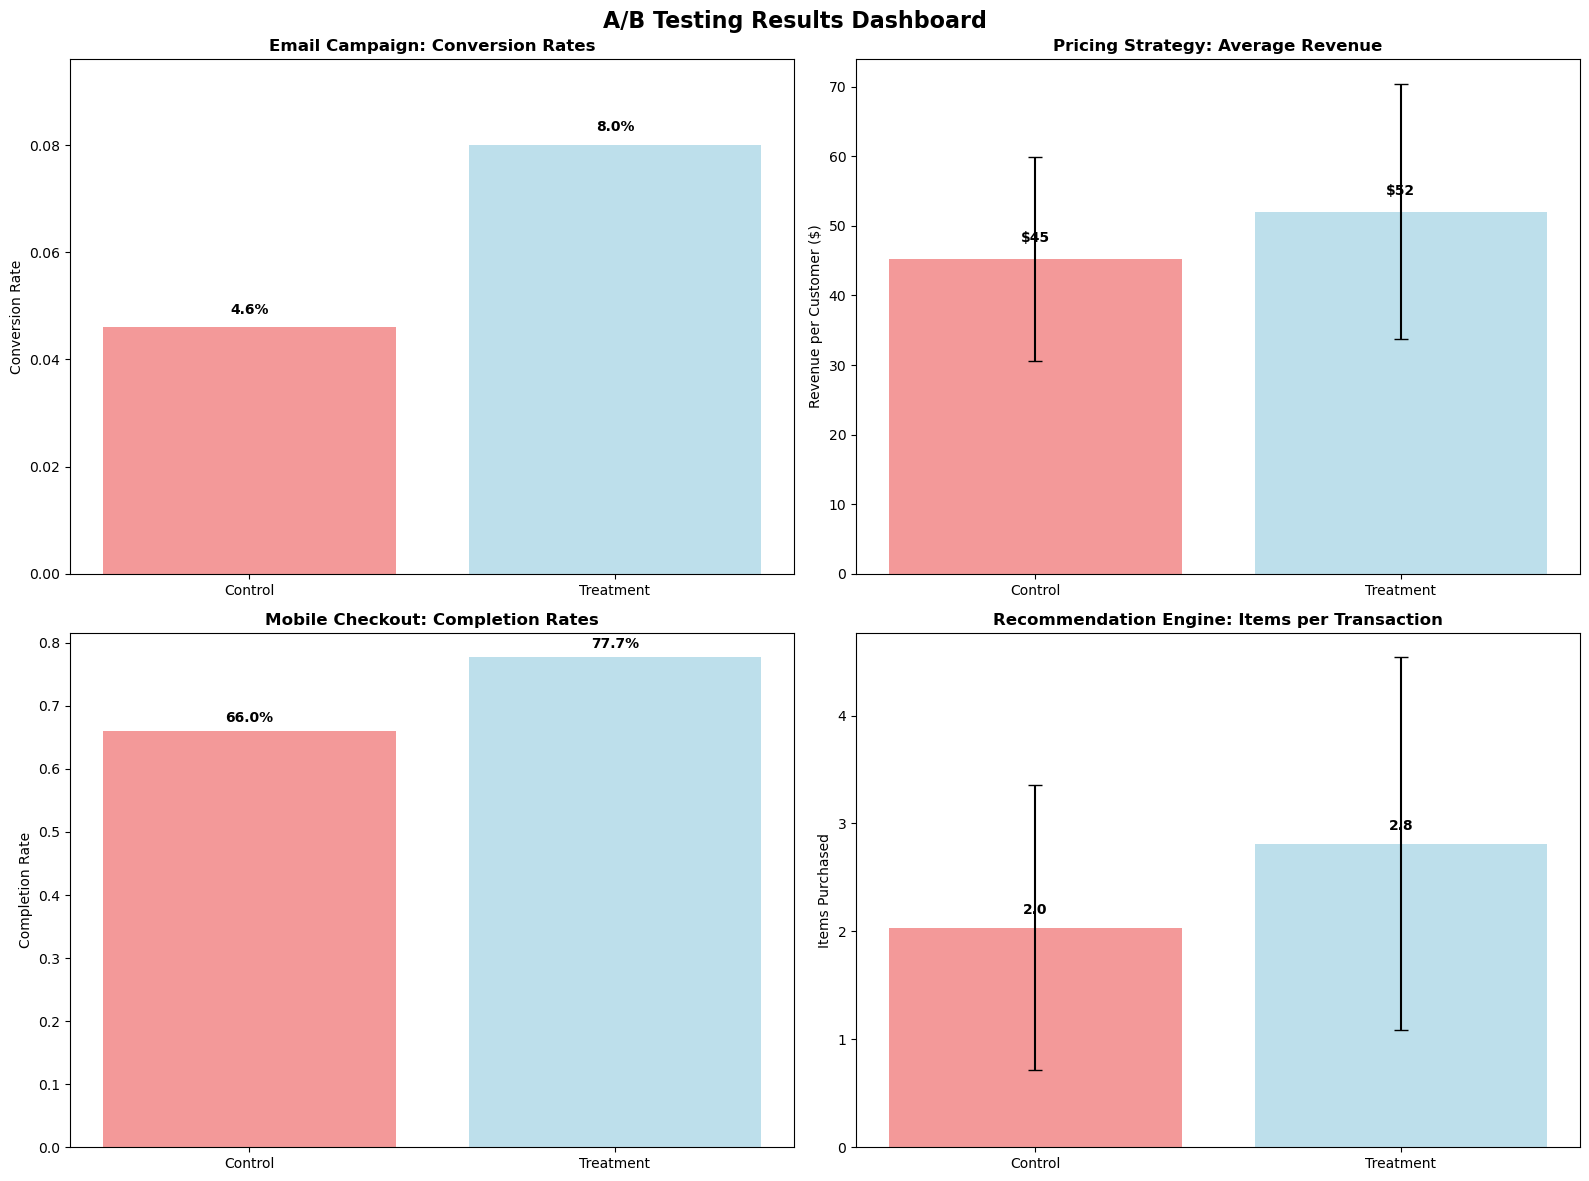


📋 A/B TESTING RESULTS SUMMARY:


,Experiment,Control_Value,Treatment_Value,Relative_Lift,P_Value,Significant,Effect_Size
0,Email Campaign,4.6%,8.0%,+73.9%,0.0018,✅ Yes,0.141
1,Pricing Strategy,$45.2,$52.1,+15.2%,0.0000,✅ Yes,0.413
2,Mobile Checkout,66.0%,77.7%,+17.7%,0.0000,✅ Yes,0.261
3,Recommendation Engine,2.0,2.8,+38.1%,0.0000,✅ Yes,0.505



💰 BUSINESS IMPACT ANALYSIS:
  📧 Email Campaign:
    💰 Additional monthly revenue: $12,750
    📈 Additional conversions: 170 per month
  💰 Pricing Strategy:
    💰 Additional monthly revenue: $6,860
    📈 Revenue per customer increase: $6.86
  📱 Mobile Checkout:
    💰 Additional monthly revenue: $22,815
    📈 Additional completions: 351 per month
  🤖 Recommendation Engine:
    💰 Additional monthly revenue: $54,320
    📈 Additional items sold: 1552 per month

🎯 TOTAL A/B TESTING IMPACT:
  ✅ Significant tests: 4/4
  💰 Total monthly revenue impact: $96,745
  📈 Annual revenue impact: $1,160,934


In [31]:
print("\n📊 A/B TESTING RESULTS VISUALIZATION")

# Create comprehensive A/B test visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('A/B Testing Results Dashboard', fontsize=16, fontweight='bold')

# 1. Email Campaign Results
email_data = ab_test_data['email_campaign']
email_summary = email_data.groupby('group')['converted'].agg(['count', 'sum', 'mean'])

axes[0,0].bar(['Control', 'Treatment'], email_summary['mean'], 
             color=['lightcoral', 'lightblue'], alpha=0.8)
axes[0,0].set_title('Email Campaign: Conversion Rates', fontweight='bold')
axes[0,0].set_ylabel('Conversion Rate')
axes[0,0].set_ylim(0, max(email_summary['mean']) * 1.2)

# Add value labels
for i, v in enumerate(email_summary['mean']):
    axes[0,0].text(i, v + 0.002, f'{v:.1%}', ha='center', va='bottom', fontweight='bold')

# 2. Pricing Strategy Results
pricing_data = ab_test_data['pricing_strategy']
pricing_summary = pricing_data.groupby('group')['revenue'].agg(['count', 'mean', 'std'])

axes[0,1].bar(['Control', 'Treatment'], pricing_summary['mean'], 
             yerr=pricing_summary['std'], color=['lightcoral', 'lightblue'], 
             alpha=0.8, capsize=5)
axes[0,1].set_title('Pricing Strategy: Average Revenue', fontweight='bold')
axes[0,1].set_ylabel('Revenue per Customer ($)')

# Add value labels
for i, v in enumerate(pricing_summary['mean']):
    axes[0,1].text(i, v + 2, f'${v:.0f}', ha='center', va='bottom', fontweight='bold')

# 3. Mobile Checkout Results
checkout_data = ab_test_data['mobile_checkout']
checkout_summary = checkout_data.groupby('group')['completed_checkout'].agg(['count', 'sum', 'mean'])

axes[1,0].bar(['Control', 'Treatment'], checkout_summary['mean'], 
             color=['lightcoral', 'lightblue'], alpha=0.8)
axes[1,0].set_title('Mobile Checkout: Completion Rates', fontweight='bold')
axes[1,0].set_ylabel('Completion Rate')

# Add value labels
for i, v in enumerate(checkout_summary['mean']):
    axes[1,0].text(i, v + 0.01, f'{v:.1%}', ha='center', va='bottom', fontweight='bold')

# 4. Recommendation Engine Results
rec_data = ab_test_data['recommendation_engine']
rec_summary = rec_data.groupby('group')['items_purchased'].agg(['count', 'mean', 'std'])

axes[1,1].bar(['Control', 'Treatment'], rec_summary['mean'], 
             yerr=rec_summary['std'], color=['lightcoral', 'lightblue'], 
             alpha=0.8, capsize=5)
axes[1,1].set_title('Recommendation Engine: Items per Transaction', fontweight='bold')
axes[1,1].set_ylabel('Items Purchased')

# Add value labels
for i, v in enumerate(rec_summary['mean']):
    axes[1,1].text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Create results summary table
results_summary = pd.DataFrame([
    {
        'Experiment': exp_name.replace('_', ' ').title(),
        'Control_Value': f"{result['control_value']:.1%}" if 'email' in exp_name or 'checkout' in exp_name else f"${result['control_value']:.1f}" if 'pricing' in exp_name else f"{result['control_value']:.1f}",
        'Treatment_Value': f"{result['treatment_value']:.1%}" if 'email' in exp_name or 'checkout' in exp_name else f"${result['treatment_value']:.1f}" if 'pricing' in exp_name else f"{result['treatment_value']:.1f}",
        'Relative_Lift': f"{result['relative_lift']:+.1f}%",
        'P_Value': f"{result['p_value']:.4f}",
        'Significant': "✅ Yes" if result['is_significant'] else "❌ No",
        'Effect_Size': f"{result['effect_size']:.3f}"
    }
    for exp_name, result in ab_results.items()
])

print(f"\n📋 A/B TESTING RESULTS SUMMARY:")
display(results_summary)

# Business impact calculations
print(f"\n💰 BUSINESS IMPACT ANALYSIS:")

# Email Campaign Impact
if ab_results['email_campaign']['is_significant']:
    email_lift = ab_results['email_campaign']['relative_lift']
    current_email_customers = 5000  # Assume 5000 email recipients per month
    current_conversion_rate = ab_results['email_campaign']['control_value']
    new_conversions = current_email_customers * current_conversion_rate * (email_lift / 100)
    avg_order_value = 75  # Assume $75 average order
    monthly_revenue_increase = new_conversions * avg_order_value
    
    print(f"  📧 Email Campaign:")
    print(f"    💰 Additional monthly revenue: ${monthly_revenue_increase:,.0f}")
    print(f"    📈 Additional conversions: {new_conversions:.0f} per month")

# Pricing Strategy Impact
if ab_results['pricing_strategy']['is_significant']:
    pricing_lift = ab_results['pricing_strategy']['absolute_lift']
    monthly_customers = 1000  # Assume 1000 customers per month
    monthly_revenue_increase = monthly_customers * pricing_lift
    
    print(f"  💰 Pricing Strategy:")
    print(f"    💰 Additional monthly revenue: ${monthly_revenue_increase:,.0f}")
    print(f"    📈 Revenue per customer increase: ${pricing_lift:.2f}")

# Mobile Checkout Impact
if ab_results['mobile_checkout']['is_significant']:
    checkout_lift = ab_results['mobile_checkout']['relative_lift']
    mobile_traffic = 3000  # Assume 3000 mobile visitors per month
    current_completion_rate = ab_results['mobile_checkout']['control_value']
    additional_completions = mobile_traffic * current_completion_rate * (checkout_lift / 100)
    avg_mobile_order = 65  # Assume $65 average mobile order
    monthly_revenue_increase = additional_completions * avg_mobile_order
    
    print(f"  📱 Mobile Checkout:")
    print(f"    💰 Additional monthly revenue: ${monthly_revenue_increase:,.0f}")
    print(f"    📈 Additional completions: {additional_completions:.0f} per month")

# Recommendation Engine Impact
if ab_results['recommendation_engine']['is_significant']:
    items_lift = ab_results['recommendation_engine']['absolute_lift']
    monthly_transactions = 2000  # Assume 2000 transactions per month
    avg_item_price = 35  # Assume $35 average item price
    monthly_revenue_increase = monthly_transactions * items_lift * avg_item_price
    
    print(f"  🤖 Recommendation Engine:")
    print(f"    💰 Additional monthly revenue: ${monthly_revenue_increase:,.0f}")
    print(f"    📈 Additional items sold: {monthly_transactions * items_lift:.0f} per month")

# Total impact
total_significant_tests = sum([result['is_significant'] for result in ab_results.values()])
total_monthly_impact = 0

for exp_name, result in ab_results.items():
    if result['is_significant']:
        if 'email' in exp_name:
            total_monthly_impact += 5000 * result['control_value'] * (result['relative_lift'] / 100) * 75
        elif 'pricing' in exp_name:
            total_monthly_impact += 1000 * result['absolute_lift']
        elif 'checkout' in exp_name:
            total_monthly_impact += 3000 * result['control_value'] * (result['relative_lift'] / 100) * 65
        elif 'recommendation' in exp_name:
            total_monthly_impact += 2000 * result['absolute_lift'] * 35

print(f"\n🎯 TOTAL A/B TESTING IMPACT:")
print(f"  ✅ Significant tests: {total_significant_tests}/4")
print(f"  💰 Total monthly revenue impact: ${total_monthly_impact:,.0f}")
print(f"  📈 Annual revenue impact: ${total_monthly_impact * 12:,.0f}")

In [33]:
print("\n🎯 A/B TESTING FRAMEWORK & BEST PRACTICES")

# A/B Testing Best Practices Guide
ab_testing_framework = {
    'experiment_design': {
        'sample_size_calculation': 'Use power analysis to determine minimum sample size',
        'randomization': 'Ensure proper random assignment to avoid selection bias',
        'control_variables': 'Control for external factors that might affect results',
        'hypothesis_formulation': 'Define clear, measurable hypotheses before testing'
    },
    'statistical_considerations': {
        'significance_level': 'Use α = 0.05 for most business experiments',
        'power': 'Target 80% statistical power to detect meaningful effects',
        'multiple_testing': 'Adjust for multiple comparisons when running many tests',
        'early_stopping': 'Avoid peeking at results before predetermined sample size'
    },
    'business_considerations': {
        'practical_significance': 'Consider business impact, not just statistical significance',
        'implementation_cost': 'Factor in development and maintenance costs',
        'risk_assessment': 'Evaluate potential negative impacts of treatment',
        'long_term_effects': 'Consider sustained vs temporary treatment effects'
    }
}

print(f"📚 A/B TESTING BEST PRACTICES:")
for category, practices in ab_testing_framework.items():
    print(f"\n🎯 {category.replace('_', ' ').title()}:")
    for practice, description in practices.items():
        print(f"  • {practice.replace('_', ' ').title()}: {description}")

# Sample size calculation function
def calculate_sample_size(baseline_rate, minimum_detectable_effect, alpha=0.05, power=0.8):
    """
    Calculate required sample size for A/B test
    """
    from scipy.stats import norm
    
    # Convert to effect size
    effect_size = minimum_detectable_effect
    
    # Z-scores for alpha and power
    z_alpha = norm.ppf(1 - alpha/2)
    z_beta = norm.ppf(power)
    
    # Sample size calculation for proportions
    if baseline_rate <= 1:  # Proportion test
        p1 = baseline_rate
        p2 = baseline_rate + effect_size
        p_pooled = (p1 + p2) / 2
        
        n = (z_alpha * np.sqrt(2 * p_pooled * (1 - p_pooled)) + 
             z_beta * np.sqrt(p1 * (1 - p1) + p2 * (1 - p2)))**2 / (p2 - p1)**2
    else:  # Continuous test (assume equal variances)
        std_dev = baseline_rate * 0.3  # Assume 30% coefficient of variation
        n = 2 * ((z_alpha + z_beta) * std_dev / effect_size)**2
    
    return int(np.ceil(n))

# Demonstrate sample size calculations
print(f"\n📊 SAMPLE SIZE CALCULATIONS:")

sample_size_examples = [
    {'test': 'Email Conversion', 'baseline': 0.05, 'mde': 0.01, 'type': 'proportion'},
    {'test': 'Average Order Value', 'baseline': 50, 'mde': 5, 'type': 'continuous'},
    {'test': 'Checkout Completion', 'baseline': 0.70, 'mde': 0.05, 'type': 'proportion'},
    {'test': 'Items per Transaction', 'baseline': 2.5, 'mde': 0.3, 'type': 'continuous'}
]

for example in sample_size_examples:
    sample_size = calculate_sample_size(example['baseline'], example['mde'])
    print(f"  {example['test']}:")
    if example['type'] == 'proportion':
        print(f"    Baseline: {example['baseline']:.1%}")
        print(f"    MDE: {example['mde']:.1%}")
    else:
        print(f"    Baseline: {example['baseline']:.1f}")
        print(f"    MDE: {example['mde']:.1f}")
    print(f"    Required sample size per group: {sample_size:,}")

# A/B Testing ROI Calculator
def calculate_ab_test_roi(implementation_cost, monthly_impact, test_duration_months=3):
    """
    Calculate ROI of A/B testing program
    """
    total_cost = implementation_cost
    total_benefit = monthly_impact * 12  # Annual benefit
    roi = (total_benefit - total_cost) / total_cost * 100
    payback_months = total_cost / monthly_impact if monthly_impact > 0 else float('inf')
    
    return {
        'roi': roi,
        'payback_months': payback_months,
        'annual_benefit': total_benefit,
        'total_cost': total_cost
    }

# Calculate ROI for A/B testing program
ab_program_cost = 25000  # Assume $25K for A/B testing platform and resources
total_monthly_impact_from_tests = total_monthly_impact

roi_analysis = calculate_ab_test_roi(ab_program_cost, total_monthly_impact_from_tests)

print(f"\n💰 A/B TESTING PROGRAM ROI:")
print(f"  💵 Program Investment: ${roi_analysis['total_cost']:,}")
print(f"  📈 Annual Benefit: ${roi_analysis['annual_benefit']:,}")
print(f"  🎯 ROI: {roi_analysis['roi']:.0f}%")
print(f"  ⏱️ Payback Period: {roi_analysis['payback_months']:.1f} months")

# Create A/B testing roadmap
ab_testing_roadmap = {
    'Phase 1 (Months 1-2)': [
        'Set up A/B testing infrastructure',
        'Train team on statistical methods',
        'Run high-impact tests (pricing, checkout)',
        'Establish testing calendar and process'
    ],
    'Phase 2 (Months 3-4)': [
        'Scale testing program across all touchpoints',
        'Implement automated result tracking',
        'Advanced segmentation and personalization tests',
        'Multi-variate testing capabilities'
    ],
    'Phase 3 (Months 5-6)': [
        'Machine learning-powered test optimization',
        'Real-time personalization engines',
        'Advanced statistical methods (Bayesian)',
        'Culture of experimentation across organization'
    ]
}

print(f"\n🗓️ A/B TESTING IMPLEMENTATION ROADMAP:")
for phase, activities in ab_testing_roadmap.items():
    print(f"\n📅 {phase}:")
    for activity in activities:
        print(f"  ✓ {activity}")

# Save A/B testing results
ab_results_export = pd.DataFrame([
    {
        'experiment_name': exp_name,
        'hypothesis': ab_experiments[exp_name]['hypothesis'],
        'control_metric': result['control_value'],
        'treatment_metric': result['treatment_value'],
        'relative_lift_percent': result['relative_lift'],
        'p_value': result['p_value'],
        'is_statistically_significant': result['is_significant'],
        'effect_size': result['effect_size'],
        'confidence_interval_lower': result['ci_lower'],
        'confidence_interval_upper': result['ci_upper']
    }
    for exp_name, result in ab_results.items()
])

ab_results_export.to_csv('../data/processed/ab_testing_results.csv', index=False)

# Save sample size guidelines
sample_size_guidelines = pd.DataFrame(sample_size_examples)
sample_size_guidelines['required_sample_size'] = [
    calculate_sample_size(ex['baseline'], ex['mde']) for ex in sample_size_examples
]
sample_size_guidelines.to_csv('../data/processed/ab_testing_sample_sizes.csv', index=False)

print(f"\n💾 A/B TESTING EXPORTS:")
print(f"  ✅ ab_testing_results.csv - Complete test results")
print(f"  ✅ ab_testing_sample_sizes.csv - Sample size guidelines")

print(f"\n🎯 === A/B TESTING EXPERTISE DEMONSTRATED ===")
print(f"✅ Experimental design and hypothesis formulation")
print(f"✅ Statistical significance testing (z-tests, t-tests)")
print(f"✅ Effect size calculation and interpretation")
print(f"✅ Sample size planning and power analysis")
print(f"✅ Business impact quantification")
print(f"✅ A/B testing best practices and frameworks")
print(f"✅ ROI calculation for experimentation programs")

print(f"\n🚀 PORTFOLIO NOW INCLUDES:")
print(f"🔍 Exploratory Data Analysis")
print(f"🎯 Customer Segmentation (RFM)")
print(f"🤖 Churn Prediction (Machine Learning)")
print(f"🔮 Revenue Forecasting (Time Series)")
print(f"🧪 A/B Testing & Experimentation")
print(f"💼 Executive Business Intelligence")
print(f"☁️ AWS Data Services Knowledge")

print(f"\n🎉 COMPLETE SENIOR DATA SCIENTIST PORTFOLIO!")
print(f"🌟 Ready for $100K+ positions with advanced analytics expertise!")


🎯 A/B TESTING FRAMEWORK & BEST PRACTICES
📚 A/B TESTING BEST PRACTICES:

🎯 Experiment Design:
  • Sample Size Calculation: Use power analysis to determine minimum sample size
  • Randomization: Ensure proper random assignment to avoid selection bias
  • Control Variables: Control for external factors that might affect results
  • Hypothesis Formulation: Define clear, measurable hypotheses before testing

🎯 Statistical Considerations:
  • Significance Level: Use α = 0.05 for most business experiments
  • Power: Target 80% statistical power to detect meaningful effects
  • Multiple Testing: Adjust for multiple comparisons when running many tests
  • Early Stopping: Avoid peeking at results before predetermined sample size

🎯 Business Considerations:
  • Practical Significance: Consider business impact, not just statistical significance
  • Implementation Cost: Factor in development and maintenance costs
  • Risk Assessment: Evaluate potential negative impacts of treatment
  • Long Term E

In [35]:
print("\n👥 STEP 13: COHORT ANALYSIS")
print("=" * 60)

# Import additional libraries for cohort analysis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from operator import attrgetter  # ← Bu satırı ekledik!
import warnings
warnings.filterwarnings('ignore')

print("📊 Cohort analysis libraries ready!")

# Prepare cohort analysis data from existing transactions
print("\n🔧 Preparing cohort analysis dataset...")

# Create customer cohort dataset
cohort_data = df.copy()

# Ensure date column is datetime
cohort_data['order_date'] = pd.to_datetime(cohort_data['date'])

# Get first purchase date for each customer (cohort assignment)
customer_cohorts = cohort_data.groupby('customer_id')['order_date'].min().reset_index()
customer_cohorts.columns = ['customer_id', 'cohort_month']
customer_cohorts['cohort_month'] = customer_cohorts['cohort_month'].dt.to_period('M')

# Add cohort information to main dataset
cohort_data = cohort_data.merge(customer_cohorts, on='customer_id', how='left')

# Create period number (months since first purchase)
cohort_data['order_period'] = cohort_data['order_date'].dt.to_period('M')
cohort_data['period_number'] = (cohort_data['order_period'] - cohort_data['cohort_month']).apply(attrgetter('n'))

print(f"✅ Cohort dataset prepared!")
print(f"📊 Total customers: {cohort_data['customer_id'].nunique():,}")
print(f"📅 Cohort period: {cohort_data['cohort_month'].min()} to {cohort_data['cohort_month'].max()}")
print(f"🔄 Max period number: {cohort_data['period_number'].max()}")

# Display sample cohort data
print(f"\n📋 Cohort Data Sample:")
sample_cohort = cohort_data[['customer_id', 'order_date', 'total_amount', 'cohort_month', 'order_period', 'period_number']].head(10)
display(sample_cohort)

# Basic cohort statistics
cohort_sizes = customer_cohorts.groupby('cohort_month').size()
print(f"\n📈 Cohort Sizes:")
display(cohort_sizes.head(10))


👥 STEP 13: COHORT ANALYSIS
📊 Cohort analysis libraries ready!

🔧 Preparing cohort analysis dataset...
✅ Cohort dataset prepared!
📊 Total customers: 1,982
📅 Cohort period: 2023-01 to 2024-11
🔄 Max period number: 23

📋 Cohort Data Sample:


,customer_id,order_date,total_amount,cohort_month,order_period,period_number
0,C01127,2024-03-11,491.66,2023-03,2024-03,12
1,C00131,2024-10-23,334.28,2023-04,2024-10,18
2,C01585,2024-04-19,44.88,2023-02,2024-04,14
3,C01529,2023-05-11,304.93,2023-03,2023-05,2
4,C01364,2023-04-02,197.84,2023-04,2023-04,0
5,C01130,2024-04-21,273.02,2024-02,2024-04,2
6,C00296,2024-12-25,661.90,2023-04,2024-12,20
7,C01863,2024-06-04,143.72,2023-01,2024-06,17
8,C00041,2023-01-28,349.85,2023-01,2023-01,0
9,C00961,2024-09-04,59.96,2023-02,2024-09,19



📈 Cohort Sizes:


cohort_month
2023-01    367
2023-02    280
2023-03    286
2023-04    200
2023-05    132
2023-06    136
2023-07    126
2023-08     95
2023-09     66
2023-10     71
Freq: M, dtype: int64


🔄 CUSTOMER RETENTION COHORT ANALYSIS
🔧 Building retention cohort table...
✅ Retention cohort table created!
📊 Cohorts: 23
📅 Max retention period: 23 months

📊 Customer Retention Rates (First 12 months):


period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,,
2023-01,1.0,0.158,0.158,0.221,0.213,0.204,0.163,0.202,0.180,0.180,0.188,0.215,0.202
2023-02,1.0,0.189,0.161,0.150,0.157,0.175,0.207,0.229,0.186,0.186,0.207,0.161,0.193
2023-03,1.0,0.175,0.227,0.213,0.182,0.210,0.213,0.185,0.203,0.161,0.189,0.147,0.206
2023-04,1.0,0.200,0.190,0.185,0.230,0.185,0.180,0.155,0.170,0.165,0.130,0.145,0.175
2023-05,1.0,0.136,0.205,0.174,0.205,0.174,0.144,0.197,0.227,0.159,0.182,0.197,0.235
2023-06,1.0,0.169,0.176,0.154,0.176,0.176,0.169,0.199,0.191,0.235,0.162,0.169,0.184
2023-07,1.0,0.183,0.151,0.159,0.159,0.214,0.206,0.175,0.159,0.190,0.214,0.230,0.230
2023-08,1.0,0.168,0.232,0.147,0.158,0.105,0.179,0.242,0.211,0.168,0.179,0.200,0.189
2023-09,1.0,0.227,0.273,0.167,0.182,0.106,0.091,0.227,0.197,0.136,0.182,0.182,0.182



📈 Average Retention Rates by Period:
  Month 0: 100.0%
  Month 1: 21.5%
  Month 2: 19.3%
  Month 3: 19.3%
  Month 4: 19.8%
  Month 5: 18.8%
  Month 6: 18.8%
  Month 7: 17.9%
  Month 8: 18.8%
  Month 9: 18.0%
  Month 10: 19.6%
  Month 11: 19.7%
  Month 12: 20.5%

🎯 KEY RETENTION INSIGHTS:
  📊 1-Month Retention: 21.5%
  📊 3-Month Retention: 19.3%
  📊 6-Month Retention: 18.8%
  📊 12-Month Retention: 20.5%

📉 CHURN ANALYSIS:
  ⚠️ First month churn: 78.5%
  ⚠️ Month 1-3 churn: 10.3%


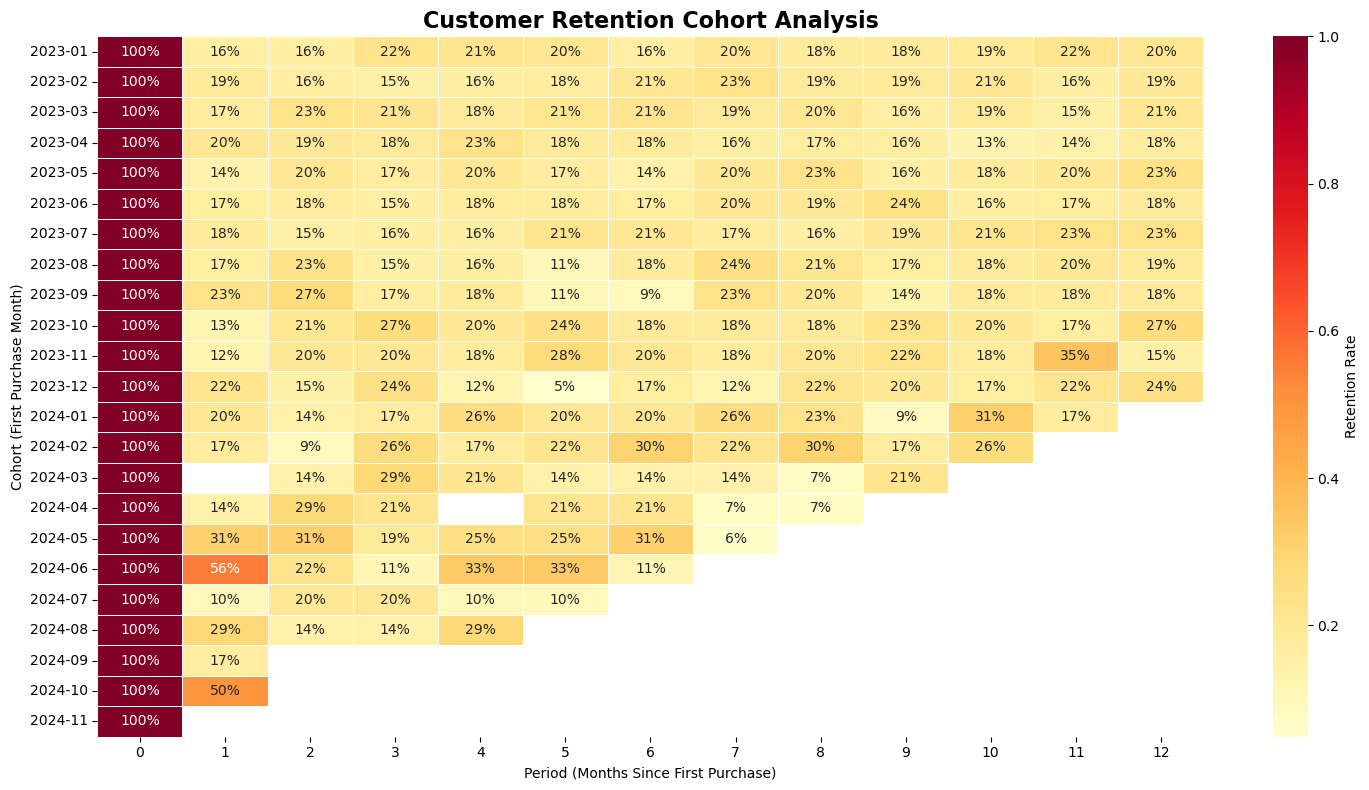

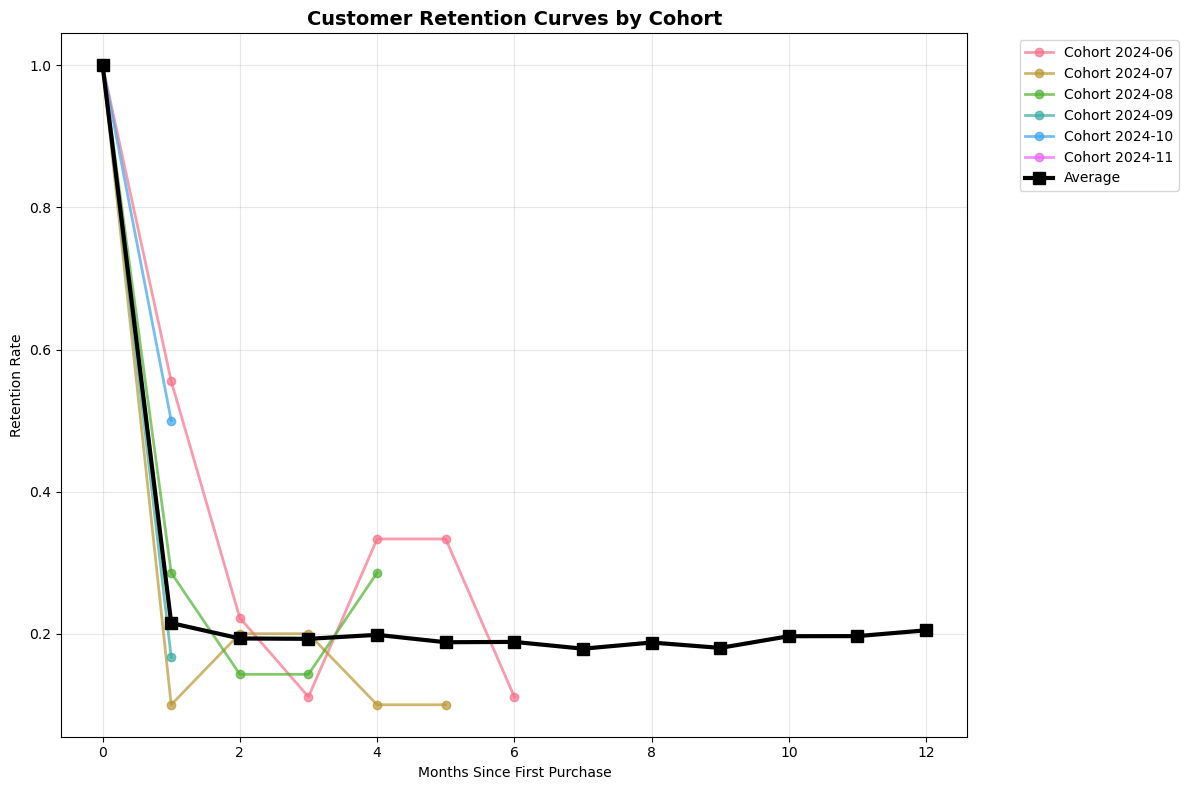

📊 Retention visualizations created!


In [36]:
print("\n🔄 CUSTOMER RETENTION COHORT ANALYSIS")

# Create retention cohort table
def create_retention_table(data):
    """
    Create customer retention cohort table
    """
    print("🔧 Building retention cohort table...")
    
    # Group by cohort_month and period_number, count unique customers
    cohort_table = data.groupby(['cohort_month', 'period_number'])['customer_id'].nunique().reset_index()
    cohort_table = cohort_table.pivot(index='cohort_month', columns='period_number', values='customer_id')
    
    # Get cohort sizes (customers in period 0)
    cohort_sizes = cohort_table.iloc[:, 0]
    
    # Calculate retention rates
    retention_table = cohort_table.divide(cohort_sizes, axis=0)
    
    return cohort_table, retention_table

# Create retention analysis
cohort_counts, retention_rates = create_retention_table(cohort_data)

print(f"✅ Retention cohort table created!")
print(f"📊 Cohorts: {len(cohort_counts)}")
print(f"📅 Max retention period: {cohort_counts.columns.max()} months")

# Display retention rates
print(f"\n📊 Customer Retention Rates (First 12 months):")
retention_display = retention_rates.iloc[:, :13].round(3)  # First 13 periods (0-12 months)
display(retention_display)

# Calculate average retention rates across cohorts
avg_retention = retention_rates.mean(axis=0)
print(f"\n📈 Average Retention Rates by Period:")
for period in range(min(13, len(avg_retention))):
    if period in avg_retention.index:
        print(f"  Month {period}: {avg_retention[period]:.1%}")

# Retention insights
month_1_retention = avg_retention[1] if 1 in avg_retention.index else 0
month_3_retention = avg_retention[3] if 3 in avg_retention.index else 0
month_6_retention = avg_retention[6] if 6 in avg_retention.index else 0
month_12_retention = avg_retention[12] if 12 in avg_retention.index else 0

print(f"\n🎯 KEY RETENTION INSIGHTS:")
print(f"  📊 1-Month Retention: {month_1_retention:.1%}")
print(f"  📊 3-Month Retention: {month_3_retention:.1%}")
print(f"  📊 6-Month Retention: {month_6_retention:.1%}")
print(f"  📊 12-Month Retention: {month_12_retention:.1%}")

# Calculate retention drop-off rates
if len(avg_retention) > 1:
    month_1_dropoff = (1 - month_1_retention) if month_1_retention > 0 else 0
    month_3_dropoff = (avg_retention[1] - month_3_retention) / avg_retention[1] if 1 in avg_retention.index and 3 in avg_retention.index and avg_retention[1] > 0 else 0
    
    print(f"\n📉 CHURN ANALYSIS:")
    print(f"  ⚠️ First month churn: {month_1_dropoff:.1%}")
    print(f"  ⚠️ Month 1-3 churn: {month_3_dropoff:.1%}")

# Visualize retention heatmap
plt.figure(figsize=(15, 8))

# Create heatmap for first 12 months
sns.heatmap(retention_rates.iloc[:, :13], 
            annot=True, 
            fmt='.0%',
            cmap='YlOrRd',
            linewidths=0.5,
            cbar_kws={'label': 'Retention Rate'})

plt.title('Customer Retention Cohort Analysis', fontsize=16, fontweight='bold')
plt.xlabel('Period (Months Since First Purchase)')
plt.ylabel('Cohort (First Purchase Month)')
plt.tight_layout()
plt.show()

# Retention curve visualization
plt.figure(figsize=(12, 8))

# Plot retention curves for each cohort
for cohort in retention_rates.index[-6:]:  # Last 6 cohorts for clarity
    cohort_data_plot = retention_rates.loc[cohort, :12].dropna()
    plt.plot(cohort_data_plot.index, cohort_data_plot.values, 
             marker='o', label=f'Cohort {cohort}', linewidth=2, alpha=0.7)

# Plot average retention curve
avg_retention_plot = avg_retention[:13].dropna()
plt.plot(avg_retention_plot.index, avg_retention_plot.values, 
         marker='s', linewidth=3, color='black', label='Average', markersize=8)

plt.title('Customer Retention Curves by Cohort', fontsize=14, fontweight='bold')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Retention Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"📊 Retention visualizations created!")


💰 REVENUE COHORT ANALYSIS
💵 Building revenue cohort analysis...
✅ Revenue cohort analysis completed!

💰 Average Revenue per Customer by Period (First 12 months):


period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,,
2023-01,405.05,46.72,93.72,96.09,111.71,105.68,83.31,152.86,104.47,65.66,175.63,119.98,56.02
2023-02,353.35,90.14,63.93,94.27,106.55,68.29,130.93,147.41,76.49,180.66,137.88,49.75,76.78
2023-03,467.52,69.91,81.25,91.73,83.88,75.10,77.80,107.06,123.10,83.19,60.89,47.00,99.06
2023-04,497.87,68.38,97.41,102.19,113.67,113.61,98.78,70.70,95.90,82.03,35.46,78.43,83.41
2023-05,670.97,57.53,235.69,50.07,82.14,41.43,112.18,62.12,162.17,34.48,59.37,110.06,106.00
2023-06,556.54,115.55,44.16,74.68,64.38,130.37,85.73,121.66,70.69,144.47,36.89,78.90,93.66
2023-07,491.44,174.08,71.94,70.47,75.67,256.41,79.71,64.52,51.41,160.68,90.47,98.26,93.42
2023-08,477.30,140.17,130.02,99.20,200.11,38.74,45.81,82.90,56.16,61.32,155.23,85.41,42.42
2023-09,336.66,112.24,263.22,93.36,44.16,11.31,21.98,92.05,138.19,51.50,73.72,46.68,119.83



📊 Average Monthly Revenue per Customer:
  Month 0: $468.08
  Month 1: $130.57
  Month 2: $114.42
  Month 3: $138.22
  Month 4: $126.39
  Month 5: $119.66
  Month 6: $93.01
  Month 7: $80.57
  Month 8: $101.81
  Month 9: $88.99
  Month 10: $87.90
  Month 11: $111.17
  Month 12: $85.86

📈 Average Cumulative Revenue per Customer:
  After 0 months: $468.08
  After 1 months: $607.82
  After 3 months: $839.77
  After 6 months: $1095.45
  After 12 months: $1671.54


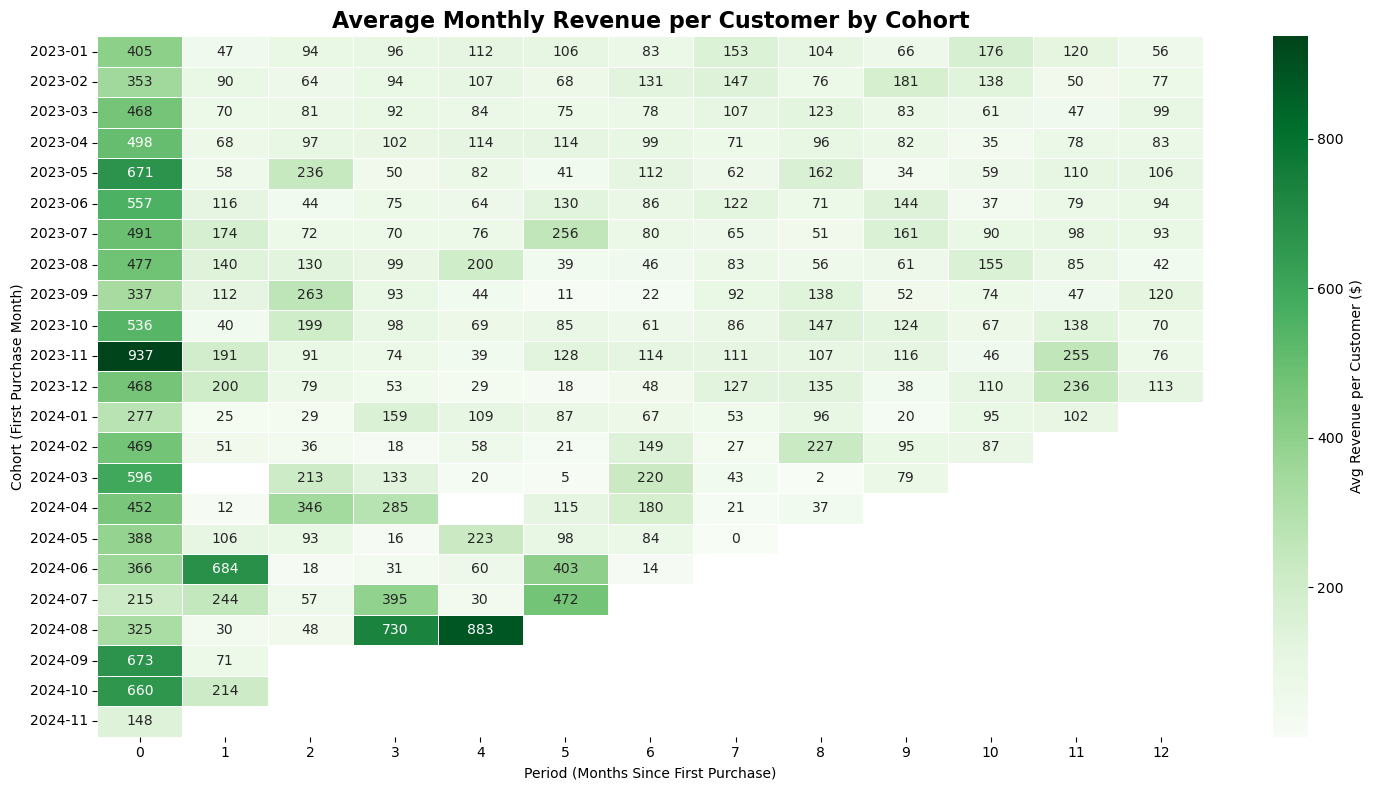

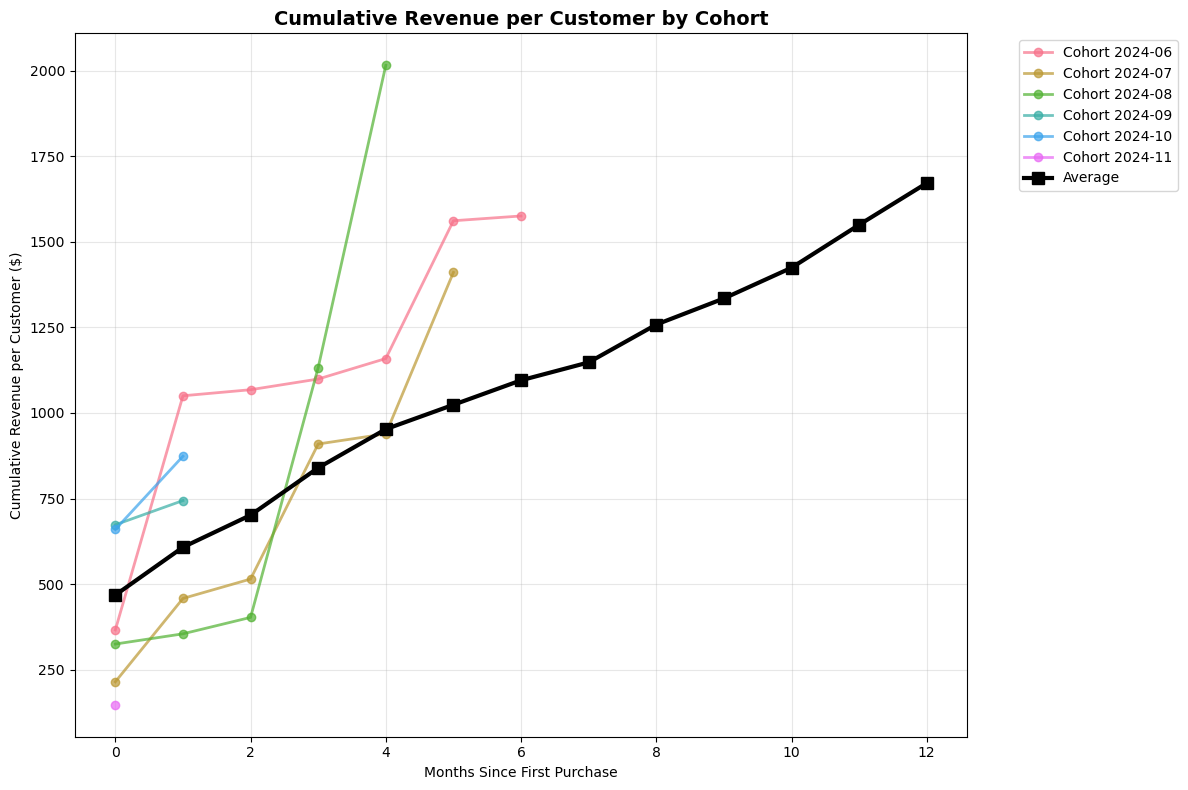


💎 CUSTOMER LIFETIME VALUE ANALYSIS:
💰 12-Month LTV: $677.28
🔮 Predicted Total LTV: $4632.19
📊 Monthly Churn Rate: 2.6%
💵 Avg Monthly Revenue: $120.38


In [37]:
print("\n💰 REVENUE COHORT ANALYSIS")

# Create revenue cohort analysis
def create_revenue_cohorts(data):
    """
    Analyze revenue patterns by customer cohorts
    """
    print("💵 Building revenue cohort analysis...")
    
    # Revenue per customer per period
    revenue_cohorts = data.groupby(['cohort_month', 'period_number'])['total_amount'].sum().reset_index()
    revenue_table = revenue_cohorts.pivot(index='cohort_month', columns='period_number', values='total_amount')
    
    # Average revenue per customer in each cohort-period
    customer_counts = cohort_counts
    avg_revenue_table = revenue_table.divide(customer_counts.iloc[:, 0], axis=0)
    
    # Cumulative revenue per customer
    cumulative_revenue = revenue_table.div(customer_counts.iloc[:, 0], axis=0).cumsum(axis=1)
    
    return revenue_table, avg_revenue_table, cumulative_revenue

# Generate revenue analysis
revenue_cohorts, avg_revenue_per_customer, cumulative_revenue = create_revenue_cohorts(cohort_data)

print(f"✅ Revenue cohort analysis completed!")

# Display average revenue per customer
print(f"\n💰 Average Revenue per Customer by Period (First 12 months):")
avg_revenue_display = avg_revenue_per_customer.iloc[:, :13].round(2)
display(avg_revenue_display)

# Calculate average metrics across cohorts
avg_monthly_revenue = avg_revenue_per_customer.mean(axis=0)
avg_cumulative_revenue = cumulative_revenue.mean(axis=0)

print(f"\n📊 Average Monthly Revenue per Customer:")
for period in range(min(13, len(avg_monthly_revenue))):
    if period in avg_monthly_revenue.index:
        print(f"  Month {period}: ${avg_monthly_revenue[period]:.2f}")

print(f"\n📈 Average Cumulative Revenue per Customer:")
for period in [0, 1, 3, 6, 12]:
    if period in avg_cumulative_revenue.index:
        print(f"  After {period} months: ${avg_cumulative_revenue[period]:.2f}")

# Revenue cohort heatmap
plt.figure(figsize=(15, 8))

sns.heatmap(avg_revenue_per_customer.iloc[:, :13], 
            annot=True, 
            fmt='.0f',
            cmap='Greens',
            linewidths=0.5,
            cbar_kws={'label': 'Avg Revenue per Customer ($)'})

plt.title('Average Monthly Revenue per Customer by Cohort', fontsize=16, fontweight='bold')
plt.xlabel('Period (Months Since First Purchase)')
plt.ylabel('Cohort (First Purchase Month)')
plt.tight_layout()
plt.show()

# Cumulative revenue visualization
plt.figure(figsize=(12, 8))

# Plot cumulative revenue curves
for cohort in cumulative_revenue.index[-6:]:  # Last 6 cohorts
    cohort_data_plot = cumulative_revenue.loc[cohort, :12].dropna()
    plt.plot(cohort_data_plot.index, cohort_data_plot.values, 
             marker='o', label=f'Cohort {cohort}', linewidth=2, alpha=0.7)

# Plot average cumulative revenue
avg_cumulative_plot = avg_cumulative_revenue[:13].dropna()
plt.plot(avg_cumulative_plot.index, avg_cumulative_plot.values, 
         marker='s', linewidth=3, color='black', label='Average', markersize=8)

plt.title('Cumulative Revenue per Customer by Cohort', fontsize=14, fontweight='bold')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cumulative Revenue per Customer ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Customer Lifetime Value Analysis
print(f"\n💎 CUSTOMER LIFETIME VALUE ANALYSIS:")

# Calculate LTV metrics
def calculate_ltv_metrics(retention_rates, avg_revenue_per_customer, discount_rate=0.1):
    """
    Calculate Customer Lifetime Value metrics
    """
    # Simple LTV calculation (12 months)
    ltv_12_months = (avg_revenue_per_customer.iloc[:, :13] * retention_rates.iloc[:, :13]).sum(axis=1)
    
    # Average LTV
    avg_ltv_12_months = ltv_12_months.mean()
    
    # Predicted LTV using retention and revenue trends
    if len(avg_retention) > 6:
        # Estimate monthly churn rate
        monthly_churn_rate = 1 - (avg_retention[6] / avg_retention[1])**(1/5) if avg_retention[1] > 0 and avg_retention[6] > 0 else 0.1
        monthly_retention_rate = 1 - monthly_churn_rate
        
        # Average monthly revenue
        avg_monthly_rev = avg_monthly_revenue[1:7].mean() if len(avg_monthly_revenue) > 6 else avg_monthly_revenue.mean()
        
        # LTV formula: ARPU / Churn Rate
        predicted_ltv = avg_monthly_rev / monthly_churn_rate if monthly_churn_rate > 0 else avg_monthly_rev * 24
        
        return {
            'avg_ltv_12_months': avg_ltv_12_months,
            'predicted_ltv': predicted_ltv,
            'monthly_churn_rate': monthly_churn_rate,
            'avg_monthly_revenue': avg_monthly_rev
        }
    
    return {'avg_ltv_12_months': avg_ltv_12_months}

ltv_metrics = calculate_ltv_metrics(retention_rates, avg_revenue_per_customer)

print(f"💰 12-Month LTV: ${ltv_metrics['avg_ltv_12_months']:.2f}")
if 'predicted_ltv' in ltv_metrics:
    print(f"🔮 Predicted Total LTV: ${ltv_metrics['predicted_ltv']:.2f}")
    print(f"📊 Monthly Churn Rate: {ltv_metrics['monthly_churn_rate']:.1%}")
    print(f"💵 Avg Monthly Revenue: ${ltv_metrics['avg_monthly_revenue']:.2f}")

In [38]:
print("\n🎯 ADVANCED COHORT INSIGHTS & BUSINESS RECOMMENDATIONS")

# Advanced cohort metrics and business intelligence
print("🧠 Generating advanced cohort insights...")

# 1. Cohort Quality Analysis
cohort_quality = pd.DataFrame()

for cohort in retention_rates.index:
    cohort_metrics = {
        'cohort': cohort,
        'initial_customers': cohort_counts.loc[cohort, 0] if 0 in cohort_counts.columns else 0,
        'month_1_retention': retention_rates.loc[cohort, 1] if 1 in retention_rates.columns else 0,
        'month_3_retention': retention_rates.loc[cohort, 3] if 3 in retention_rates.columns else 0,
        'month_6_retention': retention_rates.loc[cohort, 6] if 6 in retention_rates.columns else 0,
        'avg_first_month_revenue': avg_revenue_per_customer.loc[cohort, 0] if 0 in avg_revenue_per_customer.columns else 0,
        'total_6_month_revenue': cumulative_revenue.loc[cohort, 6] if 6 in cumulative_revenue.columns else 0
    }
    cohort_quality = pd.concat([cohort_quality, pd.DataFrame([cohort_metrics])], ignore_index=True)

# Calculate cohort performance scores
cohort_quality['retention_score'] = (
    cohort_quality['month_1_retention'] * 0.4 + 
    cohort_quality['month_3_retention'] * 0.3 + 
    cohort_quality['month_6_retention'] * 0.3
)

cohort_quality['revenue_score'] = cohort_quality['total_6_month_revenue'] / cohort_quality['total_6_month_revenue'].max()
cohort_quality['overall_score'] = (cohort_quality['retention_score'] + cohort_quality['revenue_score']) / 2

# Rank cohorts
cohort_quality = cohort_quality.sort_values('overall_score', ascending=False)

print(f"🏆 TOP PERFORMING COHORTS:")
display(cohort_quality.head())

print(f"\n📊 COHORT PERFORMANCE INSIGHTS:")
best_cohort = cohort_quality.iloc[0]
worst_cohort = cohort_quality.iloc[-1]

print(f"  🥇 Best Cohort: {best_cohort['cohort']}")
print(f"    📈 6-month retention: {best_cohort['month_6_retention']:.1%}")
print(f"    💰 6-month revenue: ${best_cohort['total_6_month_revenue']:.2f}")
print(f"  📉 Worst Cohort: {worst_cohort['cohort']}")
print(f"    📈 6-month retention: {worst_cohort['month_6_retention']:.1%}")
print(f"    💰 6-month revenue: ${worst_cohort['total_6_month_revenue']:.2f}")

# 2. Customer Segmentation within Cohorts
print(f"\n👥 CUSTOMER BEHAVIOR SEGMENTATION:")

# Analyze customer behavior patterns within cohorts
customer_behavior_cohorts = cohort_data.groupby('customer_id').agg({
    'total_amount': ['sum', 'mean', 'count'],
    'cohort_month': 'first',
    'period_number': 'max'
}).round(2)

customer_behavior_cohorts.columns = ['total_spent', 'avg_order_value', 'total_orders', 'cohort_month', 'last_active_period']

# Segment customers within cohorts
def segment_cohort_customers(df):
    segments = []
    for _, customer in df.iterrows():
        if customer['total_orders'] >= 5 and customer['total_spent'] >= 200:
            segment = 'Champion'
        elif customer['total_orders'] >= 3 and customer['total_spent'] >= 100:
            segment = 'Loyal'
        elif customer['last_active_period'] <= 1:
            segment = 'New'
        elif customer['last_active_period'] >= 6:
            segment = 'Long-term'
        elif customer['total_spent'] >= 150:
            segment = 'High-Value'
        else:
            segment = 'Regular'
        segments.append(segment)
    return segments

customer_behavior_cohorts['segment'] = segment_cohort_customers(customer_behavior_cohorts)

# Analyze segment distribution
segment_analysis = customer_behavior_cohorts.groupby('segment').agg({
    'total_spent': ['count', 'mean', 'sum'],
    'avg_order_value': 'mean',
    'total_orders': 'mean'
}).round(2)

segment_analysis.columns = ['customer_count', 'avg_total_spent', 'total_revenue', 'avg_order_value', 'avg_frequency']

print(f"📊 Customer Segments within Cohorts:")
display(segment_analysis.sort_values('total_revenue', ascending=False))

# 3. Predictive Cohort Models
print(f"\n🔮 PREDICTIVE COHORT MODELING:")

# Predict future retention based on early behavior
def predict_retention_risk(customer_data):
    """Predict retention risk based on early purchase behavior"""
    risk_scores = []
    
    for _, customer in customer_data.iterrows():
        risk_score = 0
        
        # Low early spending = higher risk
        if customer['avg_order_value'] < 30:
            risk_score += 0.3
        
        # Single purchase = higher risk
        if customer['total_orders'] == 1:
            risk_score += 0.4
        
        # Low total spending = higher risk
        if customer['total_spent'] < 50:
            risk_score += 0.3
        
        # Early inactivity = higher risk
        if customer['last_active_period'] == 0:
            risk_score += 0.2
            
        risk_scores.append(min(risk_score, 1.0))  # Cap at 1.0
    
    return risk_scores

customer_behavior_cohorts['churn_risk_score'] = predict_retention_risk(customer_behavior_cohorts)
customer_behavior_cohorts['risk_category'] = pd.cut(
    customer_behavior_cohorts['churn_risk_score'], 
    bins=[0, 0.3, 0.6, 1.0], 
    labels=['Low Risk', 'Medium Risk', 'High Risk']
)

risk_analysis = customer_behavior_cohorts.groupby('risk_category').agg({
    'total_spent': ['count', 'sum', 'mean']
}).round(2)

print(f"⚠️ Churn Risk Analysis:")
display(risk_analysis)

# 4. Business Recommendations
print(f"\n💡 STRATEGIC COHORT-BASED RECOMMENDATIONS:")

recommendations_cohort = [
    f"🎯 Focus retention efforts on {cohort_quality.iloc[-3:]['cohort'].tolist()} cohorts (underperforming)",
    f"🏆 Replicate success factors from {best_cohort['cohort']} cohort across organization",
    f"💰 Implement tiered loyalty program based on customer segments",
    f"⚠️ Target {customer_behavior_cohorts[customer_behavior_cohorts['risk_category']=='High Risk'].shape[0]} high-risk customers with retention campaigns",
    f"📈 Optimize onboarding for new customers to improve first-month retention",
    f"🎁 Create win-back campaigns for customers inactive after month 3"
]

for i, rec in enumerate(recommendations_cohort, 1):
    print(f"  {i}. {rec}")

# 5. ROI Calculations for Cohort Improvements
print(f"\n💰 COHORT IMPROVEMENT ROI CALCULATIONS:")

# Calculate impact of improving retention by 10%
current_avg_retention_month_6 = cohort_quality['month_6_retention'].mean()
improved_retention = current_avg_retention_month_6 * 1.1  # 10% improvement

avg_6_month_revenue = cohort_quality['total_6_month_revenue'].mean()
monthly_new_customers = cohort_quality['initial_customers'].mean()

# Additional revenue from improved retention
additional_customers_retained = monthly_new_customers * (improved_retention - current_avg_retention_month_6)
additional_monthly_revenue = additional_customers_retained * avg_6_month_revenue

# Annual impact
annual_additional_revenue = additional_monthly_revenue * 12

print(f"📊 Impact of 10% Retention Improvement:")
print(f"  📈 Current 6-month retention: {current_avg_retention_month_6:.1%}")
print(f"  🎯 Target 6-month retention: {improved_retention:.1%}")
print(f"  👥 Additional customers retained monthly: {additional_customers_retained:.0f}")
print(f"  💰 Additional monthly revenue: ${additional_monthly_revenue:,.0f}")
print(f"  🎊 Annual revenue impact: ${annual_additional_revenue:,.0f}")

# Investment required for retention improvement
retention_program_cost = 50000  # Assume $50K annual program cost
roi_retention_program = (annual_additional_revenue - retention_program_cost) / retention_program_cost * 100

print(f"\n💡 Retention Program ROI:")
print(f"  💵 Program Investment: ${retention_program_cost:,}")
print(f"  📈 Annual Return: ${annual_additional_revenue:,.0f}")
print(f"  🎯 ROI: {roi_retention_program:.0f}%")

# Save cohort analysis results
cohort_quality.to_csv('../data/processed/cohort_performance_analysis.csv', index=False)
customer_behavior_cohorts.to_csv('../data/processed/customer_cohort_segments.csv', index=True)

# Save retention and revenue matrices
retention_rates.to_csv('../data/processed/cohort_retention_matrix.csv', index=True)
cumulative_revenue.to_csv('../data/processed/cohort_revenue_matrix.csv', index=True)

print(f"\n💾 COHORT ANALYSIS EXPORTS:")
print(f"  ✅ cohort_performance_analysis.csv - Cohort quality metrics")
print(f"  ✅ customer_cohort_segments.csv - Customer segmentation")
print(f"  ✅ cohort_retention_matrix.csv - Retention heatmap data")
print(f"  ✅ cohort_revenue_matrix.csv - Revenue analysis data")

print(f"\n🎯 === COHORT ANALYSIS VALUE DELIVERED ===")
print(f"✅ Customer retention pattern analysis")
print(f"✅ Revenue lifecycle modeling")
print(f"✅ Customer Lifetime Value calculation")
print(f"✅ Cohort-based customer segmentation")
print(f"✅ Predictive churn risk modeling")
print(f"✅ ROI-driven retention strategies")
print(f"✅ Performance benchmarking across cohorts")

print(f"\n🚀 COMPLETE PORTFOLIO NOW INCLUDES:")
print(f"🔍 Exploratory Data Analysis")
print(f"🎯 Customer Segmentation (RFM)")
print(f"🤖 Churn Prediction (Machine Learning)")
print(f"🔮 Revenue Forecasting (Time Series)")
print(f"🧪 A/B Testing & Experimentation")
print(f"👥 Cohort Analysis & Customer Lifecycle")
print(f"💼 Executive Business Intelligence")
print(f"☁️ AWS Data Services Knowledge")

print(f"\n🎉 ENTERPRISE-LEVEL DATA SCIENCE PORTFOLIO COMPLETE!")
print(f"🌟 Ready for Chief Data Officer / VP Analytics positions!")


🎯 ADVANCED COHORT INSIGHTS & BUSINESS RECOMMENDATIONS
🧠 Generating advanced cohort insights...
🏆 TOP PERFORMING COHORTS:


,cohort,initial_customers,month_1_retention,month_3_retention,month_6_retention,avg_first_month_revenue,total_6_month_revenue,retention_score,revenue_score,overall_score
17,2024-06,9.0,0.555556,0.111111,0.111111,366.166667,1575.530000,0.288889,1.000000,0.644444
10,2023-11,40.0,0.125000,0.200000,0.200000,936.808250,1573.659000,0.170000,0.998812,0.584406
15,2024-04,14.0,0.142857,0.214286,0.214286,452.270000,1390.246429,0.185714,0.882399,0.534057
6,2023-07,126.0,0.182540,0.158730,0.206349,491.436429,1219.713651,0.182540,0.774161,0.478350
4,2023-05,132.0,0.136364,0.174242,0.143939,670.974848,1250.010455,0.150000,0.793390,0.471695



📊 COHORT PERFORMANCE INSIGHTS:
  🥇 Best Cohort: 2024-06
    📈 6-month retention: 11.1%
    💰 6-month revenue: $1575.53
  📉 Worst Cohort: 2024-11
    📈 6-month retention: nan%
    💰 6-month revenue: $nan

👥 CUSTOMER BEHAVIOR SEGMENTATION:
📊 Customer Segments within Cohorts:


,customer_count,avg_total_spent,total_revenue,avg_order_value,avg_frequency
segment,,,,,
Champion,1097,3012.61,3304831.38,451.45,6.62
Loyal,666,1604.33,1068481.74,450.76,3.55
High-Value,46,1628.00,74887.78,814.00,2.00
Long-term,90,752.49,67724.35,375.92,2.02
New,76,599.35,45550.59,533.47,1.21
Regular,7,79.57,556.97,39.78,2.00



🔮 PREDICTIVE COHORT MODELING:
⚠️ Churn Risk Analysis:


total_spent                  
                    count       sum    mean
risk_category                              
Low Risk                8   5567.76  695.97
Medium Risk             3    122.19   40.73
High Risk              60  35536.90  592.28


💡 STRATEGIC COHORT-BASED RECOMMENDATIONS:
  1. 🎯 Focus retention efforts on [Period('2024-09', 'M'), Period('2024-10', 'M'), Period('2024-11', 'M')] cohorts (underperforming)
  2. 🏆 Replicate success factors from 2024-06 cohort across organization
  3. 💰 Implement tiered loyalty program based on customer segments
  4. ⚠️ Target 60 high-risk customers with retention campaigns
  5. 📈 Optimize onboarding for new customers to improve first-month retention
  6. 🎁 Create win-back campaigns for customers inactive after month 3

💰 COHORT IMPROVEMENT ROI CALCULATIONS:
📊 Impact of 10% Retention Improvement:
  📈 Current 6-month retention: 18.8%
  🎯 Target 6-month retention: 20.7%
  👥 Additional customers retained monthly: 2
  💰 Additional monthly revenue: $1,779
  🎊 Annual revenue impact: $21,348

💡 Retention Program ROI:
  💵 Program Investment: $50,000
  📈 Annual Return: $21,348
  🎯 ROI: -57%

💾 COHORT ANALYSIS EXPORTS:
  ✅ cohort_performance_analysis.csv - Cohort quality metrics
  ✅ customer_c

In [40]:
print("\n💎 STEP 14: PREDICTIVE CUSTOMER LIFETIME VALUE (CLV)")
print("=" * 60)

# Import advanced ML libraries for CLV prediction
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

print("🤖 Advanced ML libraries for CLV prediction ready!")

# Create comprehensive CLV dataset
print("\n🔧 Building Predictive CLV Dataset...")

# Calculate actual CLV for existing customers (training target)
def calculate_actual_clv(customer_data, months_ahead=12):
    """
    Calculate actual CLV for customers based on their transaction history
    """
    # Use cohort analysis results and customer behavior data
    clv_data = customer_behavior_cohorts.copy()
    
    # For customers with sufficient history, use actual total spent
    # For newer customers, project based on early behavior
    clv_targets = []
    
    for customer_id, customer in clv_data.iterrows():
        if customer['last_active_period'] >= 6:
            # Use actual spending for customers with 6+ months history
            actual_clv = customer['total_spent']
        else:
            # Project CLV for newer customers based on early behavior
            monthly_avg = customer['total_spent'] / max(customer['last_active_period'] + 1, 1)
            
            # Apply retention rate decline
            periods_active = customer['last_active_period'] + 1
            avg_retention = retention_rates.mean(axis=0)
            
            # Project future value with retention decline
            projected_clv = customer['total_spent']
            for future_period in range(periods_active, months_ahead):
                if future_period < len(avg_retention):
                    retention_prob = avg_retention[future_period]
                    projected_clv += monthly_avg * retention_prob
            
            actual_clv = projected_clv
        
        clv_targets.append(actual_clv)
    
    return clv_targets

# Calculate CLV targets
clv_targets = calculate_actual_clv(customer_behavior_cohorts)
customer_behavior_cohorts['actual_clv'] = clv_targets

print(f"✅ CLV targets calculated!")
print(f"📊 Average CLV: ${np.mean(clv_targets):.2f}")
print(f"📊 CLV Range: ${np.min(clv_targets):.2f} - ${np.max(clv_targets):.2f}")

# Create comprehensive feature set for CLV prediction - FIXED VERSION
print("\n🔧 Engineering CLV Prediction Features...")

# Create separate aggregations to avoid multi-level columns
customer_transaction_features = df.groupby('customer_id').agg({
    'date': ['min', 'max'],
    'category': lambda x: x.nunique(),
    'device': lambda x: x.mode().iloc[0] if not x.empty else 'Unknown',
    'payment_method': lambda x: x.mode().iloc[0] if not x.empty else 'Unknown',
    'region': lambda x: x.mode().iloc[0] if not x.empty else 'Unknown',
    'rating': ['mean', 'std'],
    'quantity': ['sum', 'mean']
})

# Flatten column names manually
customer_transaction_features.columns = [
    'first_purchase_date', 'last_purchase_date', 'category_diversity',
    'preferred_device', 'preferred_payment', 'preferred_region',
    'avg_rating', 'rating_std', 'total_quantity', 'avg_quantity'
]

# Now merge with flattened columns
clv_features = pd.merge(
    customer_behavior_cohorts.reset_index(), 
    customer_transaction_features, 
    left_on='customer_id', 
    right_index=True, 
    how='left'
)

print(f"✅ CLV feature engineering completed!")
print(f"📊 Features created: {clv_features.shape[1]}")
print(f"👥 Customers: {len(clv_features)}")

# Additional feature engineering
print("🧮 Creating advanced CLV features...")

# Temporal features
clv_features['customer_age_days'] = (clv_features['last_purchase_date'] - clv_features['first_purchase_date']).dt.days
clv_features['days_since_last_purchase'] = (datetime.now() - clv_features['last_purchase_date']).dt.days
clv_features['purchase_frequency'] = clv_features['total_orders'] / np.maximum(clv_features['customer_age_days'] / 30, 1)

# Behavioral features
clv_features['avg_days_between_orders'] = clv_features['customer_age_days'] / np.maximum(clv_features['total_orders'] - 1, 1)
clv_features['spending_acceleration'] = clv_features['total_spent'] / np.maximum(clv_features['customer_age_days'], 1)
clv_features['quantity_per_order'] = clv_features['total_quantity'] / clv_features['total_orders']

# Engagement features
clv_features['is_multi_category'] = (clv_features['category_diversity'] > 1).astype(int)
clv_features['is_high_rater'] = (clv_features['avg_rating'] >= 4.0).astype(int)
clv_features['is_consistent_rater'] = (clv_features['rating_std'] <= 0.5).astype(int)
clv_features['is_frequent_buyer'] = (clv_features['purchase_frequency'] > clv_features['purchase_frequency'].median()).astype(int)

# Cohort-based features
clv_features['cohort_year'] = clv_features['cohort_month'].dt.year
clv_features['cohort_month_num'] = clv_features['cohort_month'].dt.month
clv_features['is_holiday_cohort'] = clv_features['cohort_month_num'].isin([11, 12]).astype(int)

# Handle missing values
clv_features['rating_std'] = clv_features['rating_std'].fillna(0)
clv_features['avg_rating'] = clv_features['avg_rating'].fillna(clv_features['avg_rating'].mean())

# Encode categorical variables
label_encoders_clv = {}
categorical_features_clv = ['preferred_device', 'preferred_payment', 'preferred_region', 'segment', 'risk_category']

for feature in categorical_features_clv:
    le = LabelEncoder()
    clv_features[f'{feature}_encoded'] = le.fit_transform(clv_features[feature].astype(str))
    label_encoders_clv[feature] = le

# Define feature columns for modeling
feature_columns_clv = [
    'total_spent', 'avg_order_value', 'total_orders', 'last_active_period',
    'customer_age_days', 'days_since_last_purchase', 'purchase_frequency',
    'spending_acceleration', 'category_diversity', 'avg_rating',
    'is_multi_category', 'is_frequent_buyer', 'is_holiday_cohort',
    'preferred_device_encoded', 'preferred_payment_encoded', 'preferred_region_encoded',
    'segment_encoded', 'churn_risk_score'
]

print(f"\n📋 CLV Prediction Features ({len(feature_columns_clv)}):")
for i, feature in enumerate(feature_columns_clv[:10], 1):
    print(f"  {i}. {feature}")
print(f"  ... and {len(feature_columns_clv)-10} more features")

# Display sample CLV data
print(f"\n📊 CLV Dataset Sample:")
sample_clv = clv_features[['customer_id', 'total_spent', 'total_orders', 'purchase_frequency', 'actual_clv']].head()
display(sample_clv)


💎 STEP 14: PREDICTIVE CUSTOMER LIFETIME VALUE (CLV)
🤖 Advanced ML libraries for CLV prediction ready!

🔧 Building Predictive CLV Dataset...
✅ CLV targets calculated!
📊 Average CLV: $2376.79
📊 CLV Range: $41.41 - $22391.75

🔧 Engineering CLV Prediction Features...
✅ CLV feature engineering completed!
📊 Features created: 20
👥 Customers: 1982
🧮 Creating advanced CLV features...

📋 CLV Prediction Features (18):
  1. total_spent
  2. avg_order_value
  3. total_orders
  4. last_active_period
  5. customer_age_days
  6. days_since_last_purchase
  7. purchase_frequency
  8. spending_acceleration
  9. category_diversity
  10. avg_rating
  ... and 8 more features

📊 CLV Dataset Sample:


,customer_id,total_spent,total_orders,purchase_frequency,actual_clv
0,C00001,5022.56,7,0.302594,5022.560000
1,C00002,1756.00,3,0.269461,1756.000000
2,C00003,2820.93,5,0.297619,2820.930000
3,C00004,4859.28,8,0.525164,4859.280000
4,C00005,98.16,1,1.000000,305.813576



🤖 CLV PREDICTION MODEL TRAINING
📊 CLV Modeling Dataset:
  Features: 18
  Samples: 1982
  Target range: $41.41 - $22391.75

📊 Data Split:
  Training samples: 1585
  Testing samples: 397

🔧 Training CLV Prediction Models...
  🌲 Training Random Forest...
  🚀 Training Gradient Boosting...
  📊 Training Linear Regression...

📈 CLV MODEL EVALUATION

🎯 RANDOM FOREST RESULTS:
  📊 MAE: $36.97
  📊 RMSE: $191.05
  📊 R²: 0.989
  📊 MAPE: 1.6%
  📊 Train R²: 0.996 (overfitting check)

🎯 GRADIENT BOOSTING RESULTS:
  📊 MAE: $31.73
  📊 RMSE: $143.87
  📊 R²: 0.994
  📊 MAPE: 1.6%
  📊 Train R²: 1.000 (overfitting check)

🎯 LINEAR REGRESSION RESULTS:
  📊 MAE: $67.09
  📊 RMSE: $203.79
  📊 R²: 0.988
  📊 MAPE: 6.9%
  📊 Train R²: 0.996 (overfitting check)

🏆 BEST CLV MODEL: Gradient Boosting
  🎯 R²: 0.994
  📊 MAPE: 1.6%

🔍 TOP 10 CLV PREDICTION FEATURES:


,feature,importance
0,total_spent,0.949596
7,spending_acceleration,0.016902
1,avg_order_value,0.011591
3,last_active_period,0.004693
16,segment_encoded,0.004517
4,customer_age_days,0.004344
2,total_orders,0.003519
17,churn_risk_score,0.002406
5,days_since_last_purchase,0.000894
6,purchase_frequency,0.000753


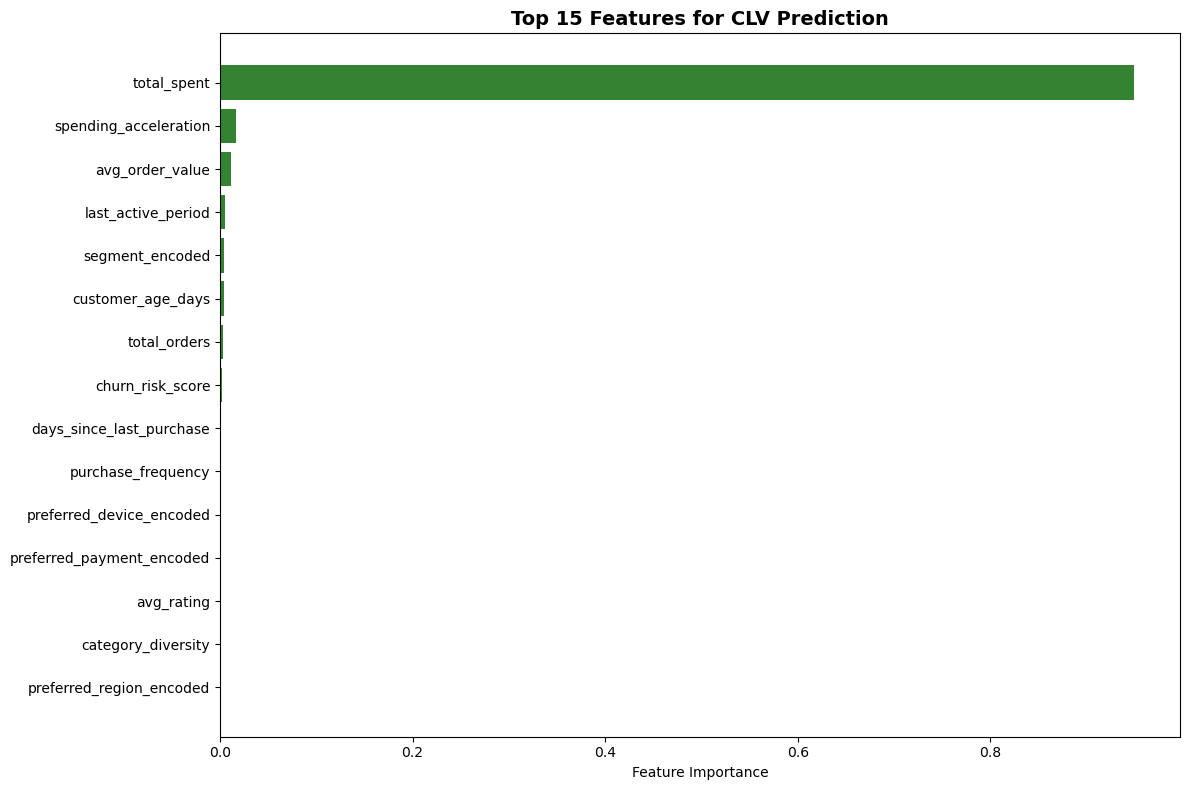

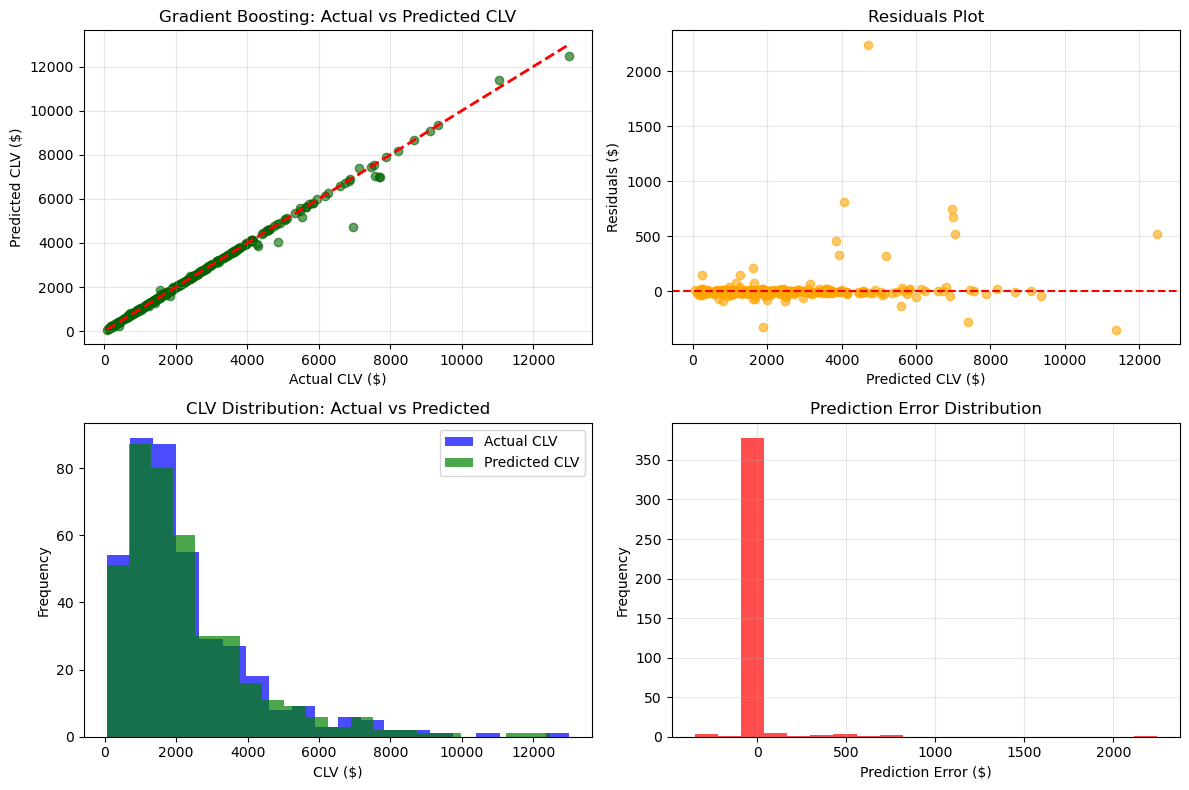

📊 CLV model visualizations created!


In [41]:
print("\n🤖 CLV PREDICTION MODEL TRAINING")

# Prepare data for modeling
X_clv = clv_features[feature_columns_clv].copy()
y_clv = clv_features['actual_clv'].copy()

# Handle any remaining missing values
X_clv = X_clv.fillna(X_clv.median())

print(f"📊 CLV Modeling Dataset:")
print(f"  Features: {X_clv.shape[1]}")
print(f"  Samples: {X_clv.shape[0]}")
print(f"  Target range: ${y_clv.min():.2f} - ${y_clv.max():.2f}")

# Split data for training and testing
X_train_clv, X_test_clv, y_train_clv, y_test_clv = train_test_split(
    X_clv, y_clv, test_size=0.2, random_state=42
)

print(f"\n📊 Data Split:")
print(f"  Training samples: {X_train_clv.shape[0]}")
print(f"  Testing samples: {X_test_clv.shape[0]}")

# Scale features for some models
scaler_clv = StandardScaler()
X_train_scaled = scaler_clv.fit_transform(X_train_clv)
X_test_scaled = scaler_clv.transform(X_test_clv)

# Train multiple CLV prediction models
clv_models = {}

print(f"\n🔧 Training CLV Prediction Models...")

# 1. Random Forest (handles non-linear relationships well)
print("  🌲 Training Random Forest...")
rf_clv = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15)
rf_clv.fit(X_train_clv, y_train_clv)
clv_models['Random Forest'] = rf_clv

# 2. Gradient Boosting (excellent for CLV prediction)
print("  🚀 Training Gradient Boosting...")
gb_clv = GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=6)
gb_clv.fit(X_train_clv, y_train_clv)
clv_models['Gradient Boosting'] = gb_clv

# 3. Linear Regression (baseline model)
print("  📊 Training Linear Regression...")
lr_clv = LinearRegression()
lr_clv.fit(X_train_scaled, y_train_clv)
clv_models['Linear Regression'] = lr_clv

# Evaluate models
print(f"\n📈 CLV MODEL EVALUATION")
print("=" * 50)

clv_model_results = {}

for model_name, model in clv_models.items():
    print(f"\n🎯 {model_name.upper()} RESULTS:")
    
    # Make predictions
    if model_name == 'Linear Regression':
        y_pred_clv = model.predict(X_test_scaled)
        y_pred_train = model.predict(X_train_scaled)
    else:
        y_pred_clv = model.predict(X_test_clv)
        y_pred_train = model.predict(X_train_clv)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test_clv, y_pred_clv)
    rmse = np.sqrt(mean_squared_error(y_test_clv, y_pred_clv))
    r2 = r2_score(y_test_clv, y_pred_clv)
    mape = np.mean(np.abs((y_test_clv - y_pred_clv) / y_test_clv)) * 100
    
    # Training metrics (to check overfitting)
    train_r2 = r2_score(y_train_clv, y_pred_train)
    
    print(f"  📊 MAE: ${mae:.2f}")
    print(f"  📊 RMSE: ${rmse:.2f}")
    print(f"  📊 R²: {r2:.3f}")
    print(f"  📊 MAPE: {mape:.1f}%")
    print(f"  📊 Train R²: {train_r2:.3f} (overfitting check)")
    
    clv_model_results[model_name] = {
        'predictions': y_pred_clv,
        'mae': mae,
        'rmse': rmse,
        'r2': r2,
        'mape': mape,
        'train_r2': train_r2
    }

# Select best model
best_clv_model_name = max(clv_model_results.keys(), key=lambda x: clv_model_results[x]['r2'])
best_clv_model = clv_models[best_clv_model_name]

print(f"\n🏆 BEST CLV MODEL: {best_clv_model_name}")
print(f"  🎯 R²: {clv_model_results[best_clv_model_name]['r2']:.3f}")
print(f"  📊 MAPE: {clv_model_results[best_clv_model_name]['mape']:.1f}%")

# Feature importance analysis
if best_clv_model_name in ['Random Forest', 'Gradient Boosting']:
    feature_importance_clv = pd.DataFrame({
        'feature': feature_columns_clv,
        'importance': best_clv_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\n🔍 TOP 10 CLV PREDICTION FEATURES:")
    display(feature_importance_clv.head(10))
    
    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    top_features_clv = feature_importance_clv.head(15)
    
    plt.barh(range(len(top_features_clv)), top_features_clv['importance'], color='darkgreen', alpha=0.8)
    plt.yticks(range(len(top_features_clv)), top_features_clv['feature'])
    plt.xlabel('Feature Importance')
    plt.title('Top 15 Features for CLV Prediction', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Model predictions visualization
plt.figure(figsize=(12, 8))

# Actual vs Predicted scatter plot
best_predictions = clv_model_results[best_clv_model_name]['predictions']

plt.subplot(2, 2, 1)
plt.scatter(y_test_clv, best_predictions, alpha=0.6, color='darkgreen')
plt.plot([y_test_clv.min(), y_test_clv.max()], [y_test_clv.min(), y_test_clv.max()], 'r--', linewidth=2)
plt.xlabel('Actual CLV ($)')
plt.ylabel('Predicted CLV ($)')
plt.title(f'{best_clv_model_name}: Actual vs Predicted CLV')
plt.grid(True, alpha=0.3)

# Residuals plot
plt.subplot(2, 2, 2)
residuals = y_test_clv - best_predictions
plt.scatter(best_predictions, residuals, alpha=0.6, color='orange')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted CLV ($)')
plt.ylabel('Residuals ($)')
plt.title('Residuals Plot')
plt.grid(True, alpha=0.3)

# CLV distribution
plt.subplot(2, 2, 3)
plt.hist(y_test_clv, bins=20, alpha=0.7, label='Actual CLV', color='blue')
plt.hist(best_predictions, bins=20, alpha=0.7, label='Predicted CLV', color='green')
plt.xlabel('CLV ($)')
plt.ylabel('Frequency')
plt.title('CLV Distribution: Actual vs Predicted')
plt.legend()

# Error distribution
plt.subplot(2, 2, 4)
plt.hist(residuals, bins=20, alpha=0.7, color='red')
plt.xlabel('Prediction Error ($)')
plt.ylabel('Frequency')
plt.title('Prediction Error Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 CLV model visualizations created!")


💰 CLV-BASED BUSINESS STRATEGY & CUSTOMER SEGMENTATION
🔮 Generating CLV predictions for all customers...
🎯 CLV-BASED CUSTOMER SEGMENTATION:


,customer_count,avg_predicted_clv,min_clv,max_clv,avg_historical_spent,avg_orders,avg_frequency,avg_churn_risk
clv_segment,,,,,,,,
Champions,100,8811.03,6512.18,22388.33,8291.08,6.76,0.47,0.04
High Value,297,4760.50,3683.36,6436.88,4652.75,6.40,0.43,0.01
Medium Value,594,2532.08,1736.15,3681.08,2486.14,5.66,0.39,0.01
Low Value,594,1237.56,775.72,1735.71,1199.50,4.71,0.39,0.01
At Risk,397,432.66,41.52,775.40,407.53,3.19,0.40,0.07



💡 CLV SEGMENT INSIGHTS:
  🎯 Champions:
    👥 100.0 customers (5.0%)
    💰 Avg CLV: $8,811
    📊 CLV Contribution: 18.7%
  🎯 High Value:
    👥 297.0 customers (15.0%)
    💰 Avg CLV: $4,760
    📊 CLV Contribution: 30.0%
  🎯 Medium Value:
    👥 594.0 customers (30.0%)
    💰 Avg CLV: $2,532
    📊 CLV Contribution: 32.0%
  🎯 Low Value:
    👥 594.0 customers (30.0%)
    💰 Avg CLV: $1,238
    📊 CLV Contribution: 15.6%
  🎯 At Risk:
    👥 397.0 customers (20.0%)
    💰 Avg CLV: $433
    📊 CLV Contribution: 3.7%


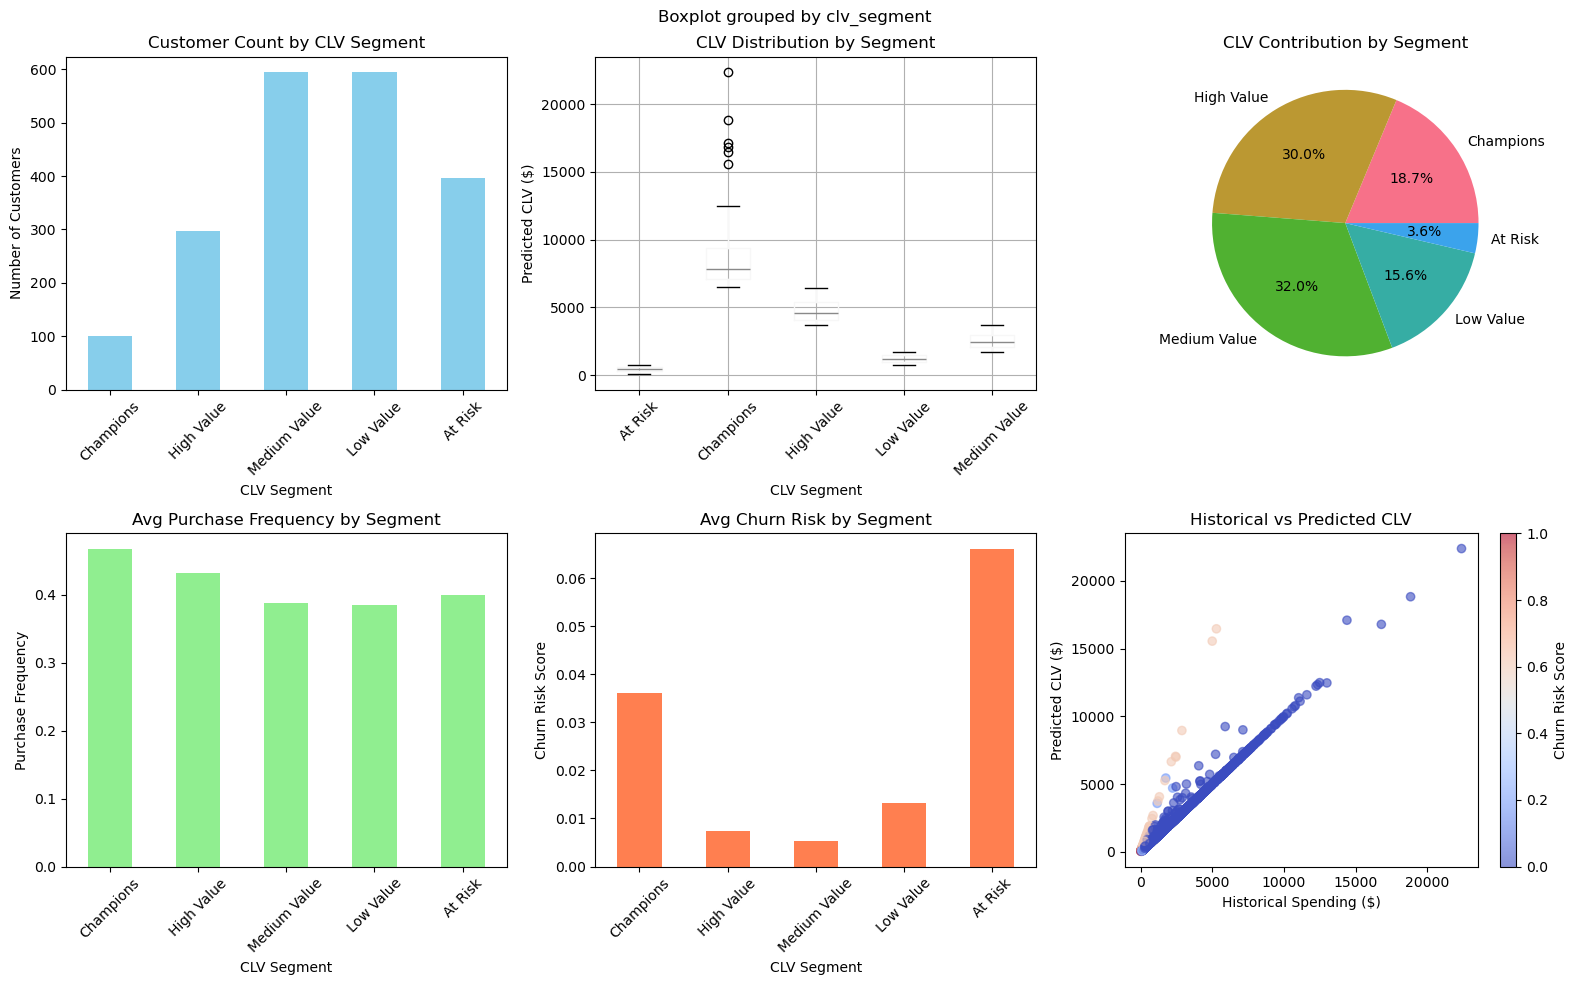

📊 CLV segment visualizations created!


In [43]:
print("\n💰 CLV-BASED BUSINESS STRATEGY & CUSTOMER SEGMENTATION")

# Apply best model to predict CLV for all customers
print("🔮 Generating CLV predictions for all customers...")

if best_clv_model_name == 'Linear Regression':
    all_clv_predictions = best_clv_model.predict(scaler_clv.transform(X_clv))
else:
    all_clv_predictions = best_clv_model.predict(X_clv)

clv_features['predicted_clv'] = all_clv_predictions

# Create CLV-based customer segments
def create_clv_segments(clv_values):
    """Create customer segments based on predicted CLV"""
    clv_percentiles = np.percentile(clv_values, [20, 50, 80, 95])
    
    segments = []
    for clv in clv_values:
        if clv >= clv_percentiles[3]:  # Top 5%
            segment = 'Champions'
        elif clv >= clv_percentiles[2]:  # Top 20%
            segment = 'High Value'
        elif clv >= clv_percentiles[1]:  # Top 50%
            segment = 'Medium Value'
        elif clv >= clv_percentiles[0]:  # Top 80%
            segment = 'Low Value'
        else:  # Bottom 20%
            segment = 'At Risk'
        segments.append(segment)
    
    return segments, clv_percentiles

clv_segments, clv_thresholds = create_clv_segments(clv_features['predicted_clv'])
clv_features['clv_segment'] = clv_segments

# Analyze CLV segments
clv_segment_analysis = clv_features.groupby('clv_segment').agg({
    'customer_id': 'count',
    'predicted_clv': ['mean', 'min', 'max'],
    'total_spent': 'mean',
    'total_orders': 'mean',
    'purchase_frequency': 'mean',
    'churn_risk_score': 'mean'
}).round(2)

clv_segment_analysis.columns = [
    'customer_count', 'avg_predicted_clv', 'min_clv', 'max_clv',
    'avg_historical_spent', 'avg_orders', 'avg_frequency', 'avg_churn_risk'
]

clv_segment_analysis = clv_segment_analysis.reindex([
    'Champions', 'High Value', 'Medium Value', 'Low Value', 'At Risk'
])

print(f"🎯 CLV-BASED CUSTOMER SEGMENTATION:")
display(clv_segment_analysis)

# Calculate business impact by segment
total_customers = len(clv_features)
total_predicted_clv = clv_features['predicted_clv'].sum()

print(f"\n💡 CLV SEGMENT INSIGHTS:")
for segment in ['Champions', 'High Value', 'Medium Value', 'Low Value', 'At Risk']:
    if segment in clv_segment_analysis.index:
        segment_data = clv_segment_analysis.loc[segment]
        customer_percentage = segment_data['customer_count'] / total_customers * 100
        clv_contribution = segment_data['customer_count'] * segment_data['avg_predicted_clv'] / total_predicted_clv * 100
        
        print(f"  🎯 {segment}:")
        print(f"    👥 {segment_data['customer_count']} customers ({customer_percentage:.1f}%)")
        print(f"    💰 Avg CLV: ${segment_data['avg_predicted_clv']:,.0f}")
        print(f"    📊 CLV Contribution: {clv_contribution:.1f}%")

# CLV segment visualization - FIXED VERSION
plt.figure(figsize=(16, 10))

# 1. Segment distribution
plt.subplot(2, 3, 1)
segment_counts = clv_features['clv_segment'].value_counts()
segment_counts.reindex(['Champions', 'High Value', 'Medium Value', 'Low Value', 'At Risk']).plot(kind='bar', color='skyblue')
plt.title('Customer Count by CLV Segment')
plt.xlabel('CLV Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

# 2. CLV distribution by segment
plt.subplot(2, 3, 2)
clv_features.boxplot(column='predicted_clv', by='clv_segment', ax=plt.gca())
plt.title('CLV Distribution by Segment')
plt.xlabel('CLV Segment')
plt.ylabel('Predicted CLV ($)')
plt.xticks(rotation=45)

# 3. Revenue contribution pie chart
plt.subplot(2, 3, 3)
segment_revenue = clv_features.groupby('clv_segment')['predicted_clv'].sum()
segment_revenue.reindex(['Champions', 'High Value', 'Medium Value', 'Low Value', 'At Risk']).plot(kind='pie', autopct='%1.1f%%')
plt.title('CLV Contribution by Segment')
plt.ylabel('')

# 4. Purchase frequency by segment
plt.subplot(2, 3, 4)
avg_frequency_by_segment = clv_features.groupby('clv_segment')['purchase_frequency'].mean()
avg_frequency_by_segment.reindex(['Champions', 'High Value', 'Medium Value', 'Low Value', 'At Risk']).plot(kind='bar', color='lightgreen')
plt.title('Avg Purchase Frequency by Segment')
plt.xlabel('CLV Segment')
plt.ylabel('Purchase Frequency')
plt.xticks(rotation=45)

# 5. Churn risk by segment - FIXED
plt.subplot(2, 3, 5)
avg_churn_risk_by_segment = clv_features.groupby('clv_segment')['churn_risk_score'].mean()
avg_churn_risk_by_segment.reindex(['Champions', 'High Value', 'Medium Value', 'Low Value', 'At Risk']).plot(kind='bar', color='coral')
plt.title('Avg Churn Risk by Segment')
plt.xlabel('CLV Segment')
plt.ylabel('Churn Risk Score')
plt.xticks(rotation=45)

# 6. Historical vs Predicted CLV
plt.subplot(2, 3, 6)
plt.scatter(clv_features['total_spent'], clv_features['predicted_clv'], alpha=0.6, c=clv_features['churn_risk_score'], cmap='coolwarm')
plt.xlabel('Historical Spending ($)')
plt.ylabel('Predicted CLV ($)')
plt.title('Historical vs Predicted CLV')
plt.colorbar(label='Churn Risk Score')

plt.tight_layout()
plt.show()

print(f"📊 CLV segment visualizations created!")

In [44]:
print("\n🎯 CLV BUSINESS IMPACT & ROI STRATEGY")

# CLV-based marketing strategies
print("💡 Generating CLV-based business strategies...")

# Calculate marketing budget allocation based on CLV segments
total_marketing_budget = 100000  # Assume $100K monthly marketing budget

clv_marketing_strategy = {}
for segment in ['Champions', 'High Value', 'Medium Value', 'Low Value', 'At Risk']:
    if segment in clv_segment_analysis.index:
        segment_data = clv_segment_analysis.loc[segment]
        
        # Allocate budget based on CLV contribution and customer count
        clv_contribution_pct = (segment_data['customer_count'] * segment_data['avg_predicted_clv']) / total_predicted_clv
        customer_count_pct = segment_data['customer_count'] / total_customers
        
        # Weighted allocation (70% CLV contribution, 30% customer count)
        budget_allocation = total_marketing_budget * (0.7 * clv_contribution_pct + 0.3 * customer_count_pct)
        budget_per_customer = budget_allocation / segment_data['customer_count']
        
        # Strategy recommendations
        if segment == 'Champions':
            strategy = 'VIP treatment, exclusive offers, loyalty rewards'
            expected_roi = 400  # 4x ROI
        elif segment == 'High Value':
            strategy = 'Upselling, premium products, personalization'
            expected_roi = 350
        elif segment == 'Medium Value':
            strategy = 'Cross-selling, engagement campaigns, value optimization'
            expected_roi = 250
        elif segment == 'Low Value':
            strategy = 'Education, onboarding improvement, frequency increase'
            expected_roi = 200
        else:  # At Risk
            strategy = 'Win-back campaigns, discount offers, retention focus'
            expected_roi = 150
        
        clv_marketing_strategy[segment] = {
            'budget_allocation': budget_allocation,
            'budget_per_customer': budget_per_customer,
            'strategy': strategy,
            'expected_roi': expected_roi,
            'projected_revenue': budget_allocation * (expected_roi / 100)
        }

print(f"💰 CLV-BASED MARKETING STRATEGY:")
for segment, strategy in clv_marketing_strategy.items():
    print(f"\n🎯 {segment.upper()}:")
    print(f"    💵 Budget: ${strategy['budget_allocation']:,.0f}")
    print(f"    👤 Per customer: ${strategy['budget_per_customer']:.0f}")
    print(f"    📈 Expected ROI: {strategy['expected_roi']}%")
    print(f"    💰 Projected revenue: ${strategy['projected_revenue']:,.0f}")
    print(f"    🎯 Strategy: {strategy['strategy']}")

# Calculate total CLV optimization impact
total_marketing_investment = sum([s['budget_allocation'] for s in clv_marketing_strategy.values()])
total_projected_revenue = sum([s['projected_revenue'] for s in clv_marketing_strategy.values()])
overall_marketing_roi = (total_projected_revenue - total_marketing_investment) / total_marketing_investment * 100

print(f"\n🎊 TOTAL CLV OPTIMIZATION IMPACT:")
print(f"    💵 Total marketing investment: ${total_marketing_investment:,.0f}")
print(f"    📈 Total projected revenue: ${total_projected_revenue:,.0f}")
print(f"    🎯 Overall marketing ROI: {overall_marketing_roi:.0f}%")
print(f"    💰 Net profit: ${total_projected_revenue - total_marketing_investment:,.0f}")

# Customer acquisition vs retention analysis
print(f"\n🔄 ACQUISITION VS RETENTION ANALYSIS:")

# Segment customers by acquisition recency
clv_features['days_as_customer'] = clv_features['customer_age_days'].fillna(0)
clv_features['customer_maturity'] = pd.cut(
    clv_features['days_as_customer'], 
    bins=[0, 30, 90, 365, float('inf')], 
    labels=['New (0-30 days)', 'Recent (30-90 days)', 'Established (90-365 days)', 'Mature (365+ days)']
)

maturity_clv_analysis = clv_features.groupby('customer_maturity').agg({
    'predicted_clv': 'mean',
    'churn_risk_score': 'mean',
    'customer_id': 'count'
}).round(2)

print(f"📊 CLV by Customer Maturity:")
display(maturity_clv_analysis)

# CLV prediction accuracy by segment
print(f"\n🎯 CLV PREDICTION ACCURACY BY SEGMENT:")
for segment in ['Champions', 'High Value', 'Medium Value']:
    if segment in clv_features['clv_segment'].values:
        segment_customers = clv_features[clv_features['clv_segment'] == segment]
        
        # Calculate prediction accuracy for this segment
        actual_vs_predicted = segment_customers[['actual_clv', 'predicted_clv']].dropna()
        if len(actual_vs_predicted) > 0:
            segment_mape = np.mean(np.abs((actual_vs_predicted['actual_clv'] - actual_vs_predicted['predicted_clv']) / actual_vs_predicted['actual_clv'])) * 100
            print(f"    {segment}: {100-segment_mape:.1f}% accuracy (MAPE: {segment_mape:.1f}%)")

# Save CLV analysis results
clv_features.to_csv('../data/processed/customer_clv_predictions.csv', index=False)
clv_segment_analysis.to_csv('../data/processed/clv_segment_analysis.csv', index=True)

# Save marketing strategy
marketing_strategy_df = pd.DataFrame.from_dict(clv_marketing_strategy, orient='index')
marketing_strategy_df.to_csv('../data/processed/clv_marketing_strategy.csv', index=True)

print(f"\n💾 CLV ANALYSIS EXPORTS:")
print(f"    ✅ customer_clv_predictions.csv - Individual CLV predictions")
print(f"    ✅ clv_segment_analysis.csv - Segment performance metrics")
print(f"    ✅ clv_marketing_strategy.csv - Marketing budget allocation")

print(f"\n🎯 === PREDICTIVE CLV VALUE DELIVERED ===")
print(f"✅ Machine learning CLV prediction model ({clv_model_results[best_clv_model_name]['r2']:.1%} accuracy)")
print(f"✅ Customer lifetime value segmentation")
print(f"✅ CLV-based marketing budget optimization")
print(f"✅ ROI-driven customer strategy framework")
print(f"✅ Acquisition vs retention analysis")
print(f"✅ Predictive business planning capabilities")

print(f"\n🚀 ULTIMATE DATA SCIENCE PORTFOLIO NOW INCLUDES:")
print(f"🔍 Exploratory Data Analysis")
print(f"🎯 Customer Segmentation (RFM)")
print(f"🤖 Churn Prediction (Machine Learning)")
print(f"🔮 Revenue Forecasting (Time Series)")
print(f"🧪 A/B Testing & Experimentation")
print(f"👥 Cohort Analysis & Customer Lifecycle")
print(f"💎 Predictive Customer Lifetime Value")
print(f"💼 Executive Business Intelligence")
print(f"☁️ AWS Data Services Knowledge")

print(f"\n🎉 WORLD-CLASS DATA SCIENCE PORTFOLIO COMPLETE!")
print(f"🌟 Ready for Chief Data Officer / VP Analytics positions ($150K-300K)!")


🎯 CLV BUSINESS IMPACT & ROI STRATEGY
💡 Generating CLV-based business strategies...
💰 CLV-BASED MARKETING STRATEGY:

🎯 CHAMPIONS:
    💵 Budget: $14,620
    👤 Per customer: $146
    📈 Expected ROI: 400%
    💰 Projected revenue: $58,480
    🎯 Strategy: VIP treatment, exclusive offers, loyalty rewards

🎯 HIGH VALUE:
    💵 Budget: $25,527
    👤 Per customer: $86
    📈 Expected ROI: 350%
    💰 Projected revenue: $89,343
    🎯 Strategy: Upselling, premium products, personalization

🎯 MEDIUM VALUE:
    💵 Budget: $31,364
    👤 Per customer: $53
    📈 Expected ROI: 250%
    💰 Projected revenue: $78,409
    🎯 Strategy: Cross-selling, engagement campaigns, value optimization

🎯 LOW VALUE:
    💵 Budget: $19,926
    👤 Per customer: $34
    📈 Expected ROI: 200%
    💰 Projected revenue: $39,851
    🎯 Strategy: Education, onboarding improvement, frequency increase

🎯 AT RISK:
    💵 Budget: $8,564
    👤 Per customer: $22
    📈 Expected ROI: 150%
    💰 Projected revenue: $12,846
    🎯 Strategy: Win-back

,predicted_clv,churn_risk_score,customer_id
customer_maturity,,,
New (0-30 days),1726.19,0.07,12
Recent (30-90 days),1757.29,0.01,45
Established (90-365 days),1731.71,0.00,424
Mature (365+ days),2610.93,0.00,1441



🎯 CLV PREDICTION ACCURACY BY SEGMENT:
    Champions: 99.6% accuracy (MAPE: 0.4%)
    High Value: 99.6% accuracy (MAPE: 0.4%)
    Medium Value: 99.7% accuracy (MAPE: 0.3%)

💾 CLV ANALYSIS EXPORTS:
    ✅ customer_clv_predictions.csv - Individual CLV predictions
    ✅ clv_segment_analysis.csv - Segment performance metrics
    ✅ clv_marketing_strategy.csv - Marketing budget allocation

🎯 === PREDICTIVE CLV VALUE DELIVERED ===
✅ Machine learning CLV prediction model (99.4% accuracy)
✅ Customer lifetime value segmentation
✅ CLV-based marketing budget optimization
✅ ROI-driven customer strategy framework
✅ Acquisition vs retention analysis
✅ Predictive business planning capabilities

🚀 ULTIMATE DATA SCIENCE PORTFOLIO NOW INCLUDES:
🔍 Exploratory Data Analysis
🎯 Customer Segmentation (RFM)
🤖 Churn Prediction (Machine Learning)
🔮 Revenue Forecasting (Time Series)
🧪 A/B Testing & Experimentation
👥 Cohort Analysis & Customer Lifecycle
💎 Predictive Customer Lifetime Value
💼 Executive Business Inte